# **ENHANCING SERVICE QUALITY THROUGH TELECOMMUNICATIONS DATA ANALYSIS**

## **Business Overview**

Within the dynamic telecommunications industry, constant evolution is imperative to meet consumer demands. Technological advancements and shifting user behaviors present ongoing challenges for telecom operators, influencing their business trajectory. To remain competitive and responsive to customer needs, diligent data analysis is paramount.

In this project, my objective is to delve into telecom data to uncover pertinent challenges encountered by operators. Through an in-depth exploratory data analysis (EDA) of extensive telecom datasets, I aim to extract valuable insights encompassing user behavior, network efficacy, customer demographics, and beyond. By discerning patterns and anomalies, I endeavor to pinpoint areas ripe for enhancement, such as bolstering customer satisfaction, optimizing network functionality, and driving revenue growth via targeted marketing initiatives.

The findings derived from this endeavor hold the potential to empower telecom operators in shaping informed business strategies. By aligning with customer expectations and market demands, operators can fortify their competitive stance and elevate service provision standards.


![image.jpg](https://www.computersciencedegreehub.com/wp-content/uploads/2020/06/Is-Telecommunications-a-Growing-Field-768x512.jpg)

**Image Source**: om [Computer Science Degree Hub](https://www.computersciencedegreehub.com/faq/telecommunications-growing-field/).

## **Package Requirements**

Avoid installing the libraries in the next cell if you have previously run the requirements.txt file:

``` python
    pip install -r requirements.txt
```


After installing the packages, please restart the runtime if required.

I've added some lines to ensure that this notebook can run both on Google Colab and locally on my machine.

## **Important Libraries**


In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Configuring display options for improved data viewing with large datasets
pd.set_option('display.max_columns', 200)  # Set maximum displayed columns to 200
pd.set_option('display.max_rows', 300)     # Set maximum displayed rows to 300


In [4]:
# Setting NumPy print options to display entire arrays regardless of size
np.set_printoptions(threshold=sys.maxsize)


In [5]:
# Works if I'm working on Google Colab, else it passes on anaconda.
try:
    # Attempting to import the drive module from google.colab
    from google.colab import drive

    # Mounting Google Drive
    drive.mount('/content/drive')
    print("Google Drive mounted successfully!")
except Exception as e:
    # Handling the case when the import fails, likely due to working outside of Google Colab environment
    print("Error occurred while mounting Google Drive:", e)
    pass


Error occurred while mounting Google Drive: No module named 'google.colab'


## **Data Exploration**


In [6]:
# Reading data from a CSV file
try:
    # Reading data from a CSV file on local machine
    df = pd.read_csv('../data/raw/telecom_data.csv')
    print("CSV file read successfully from local machine!")
except FileNotFoundError:
    try:
        # Reading data from a CSV file hosted on AWS S3
        df = pd.read_csv('https://s3.amazonaws.com/projex.dezyre.com/telecom-data-analysis-project/materials/raw_telecom_data.csv')
        print("CSV file read successfully from AWS S3!")
    except Exception as e:
        print("An error occurred while reading the CSV file:", e)


CSV file read successfully from local machine!


In [7]:
# Displaying the top 5 rows of the DataFrame for exploration
df.head(5)


,Customer ID,Month of Joining,Month,zip_code,Gender,Age,Married,Dependents,Number of Dependents,Location ID,Service ID,state,county,timezone,area_codes,country,latitude,longitude,arpu,roam_ic,roam_og,loc_og_t2t,loc_og_t2m,loc_og_t2f,loc_og_t2c,std_og_t2t,std_og_t2m,std_og_t2f,std_og_t2c,isd_og,spl_og,og_others,loc_ic_t2t,loc_ic_t2m,loc_ic_t2f,std_ic_t2t,std_ic_t2m,std_ic_t2f,std_ic_t2o,spl_ic,isd_ic,ic_others,total_rech_amt,total_rech_data,vol_4g,vol_5g,arpu_5g,arpu_4g,night_pck_user,fb_user,aug_vbc_5g,Churn Value,Referred a Friend,Number of Referrals,Phone Service,Multiple Lines,Internet Service,Internet Type,Streaming Data Consumption,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Payment Method,Status ID,Satisfaction Score,Churn Category,Churn Reason,Customer Status,offer
0,hthjctifkiudi0,1,1,71638,Female,36,No,No,0,jeavwsrtakgq0,bfbrnsqreveeuafgps0,AR,Chicot County,America/Chicago,870.0,US,33.52,-91.43,273.07,18.88,78.59,280.32,30.97,5.71,1.79,25.71,175.56,0.47,0.0,5.11,0.65,13.99,121.51,168.40,67.61,115.69,52.22,18.71,0.0,0.26,11.53,46.42,18,NaN,38.30,219.25,NaN,NaN,NaN,NaN,214.99,1,Yes,9.0,Yes,Yes,Yes,DSL,27,No,No,Yes,Yes,No,Yes,Yes,Yes,Credit Card,vvhwtmkbxtvsppd52013,3,Competitor,Competitor offered higher download speeds,Churned,A
1,uqdtniwvxqzeu1,6,6,72566,Male,1,No,No,0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870.0,US,36.22,-92.08,-329.96,69.46,72.08,255.73,148.80,30.00,7.61,308.29,265.20,10.82,0.0,1.23,905.51,1.69,212.93,155.19,29.04,9.15,38.89,0.84,0.0,0.05,32.51,25.53,1183,0,0.00,0.00,0.00,0.00,0.0,1.0,0.00,0,No,0.0,Yes,Yes,No,NaN,14,No,Yes,No,No,Yes,No,No,No,Bank Withdrawal,jucxaluihiluj82863,4,NaN,NaN,Stayed,F
2,uqdtniwvxqzeu1,6,7,72566,Male,1,No,No,0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870.0,US,36.22,-92.08,101.22,1012.60,115.26,52.95,NaN,103.28,15.71,244.20,15.19,NaN,NaN,13.14,455.15,115.63,121.80,699.39,44.49,83.59,914.70,13.25,0.0,0.06,13.05,5.62,295,7,14.83,967.95,-9.40,106.30,1.0,1.0,85.87,0,Yes,6.0,Yes,No,Yes,Cable,82,No,No,Yes,No,Yes,No,No,Yes,Credit Card,vjskkxphumfai57182,3,NaN,NaN,Stayed,NaN
3,uqdtniwvxqzeu1,6,8,72566,Male,1,No,No,0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870.0,US,36.22,-92.08,215.48,84.18,99.85,140.51,4006.99,280.86,6.33,346.14,103.15,183.53,0.0,33.88,495.60,14.01,658.96,195.02,144.11,50.18,2.35,623.94,0.0,0.07,69.13,10.62,354,1,264.90,268.11,-5.15,77.53,0.0,1.0,268.38,0,Yes,10.0,Yes,No,Yes,Fiber Optic,57,No,No,Yes,No,Yes,No,No,Yes,Wallet Balance,cdwbcrvylqca53109,4,NaN,NaN,Stayed,J
4,uqdtniwvxqzeu1,6,9,72566,Male,1,No,No,0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870.0,US,36.22,-92.08,636.55,0.00,0.00,0.00,0.00,45.00,0.00,0.00,0.00,45.00,0.0,0.00,0.00,8787978.00,138.85,201.92,19.89,15.91,23.78,16.01,0.0,0.03,64.35,36.18,0,NaN,52.78,370.59,NaN,NaN,NaN,NaN,399.84,0,Yes,1.0,No,No,Yes,Fiber Optic,38,No,No,No,No,No,Yes,No,Yes,Credit Card,whqrmeulitfj98550,1,NaN,NaN,Stayed,NaN


In [8]:
# Getting the shape of the dataset
df.shape


(653753, 74)

**Observation**:

I notice that the dataset consists of 653,753 rows and 74 columns. This suggests that there are a total of 653,753 records or observations in the dataset, each having 74 features or variables.

In [9]:
# Displaying the column names of the dataset
df.columns


Index(['Customer ID', 'Month of Joining', 'Month', 'zip_code', 'Gender', 'Age',
       'Married', 'Dependents', 'Number of Dependents', 'Location ID',
       'Service ID', 'state', 'county', 'timezone', 'area_codes', 'country',
       'latitude', 'longitude', 'arpu', 'roam_ic', 'roam_og', 'loc_og_t2t',
       'loc_og_t2m', 'loc_og_t2f', 'loc_og_t2c', 'std_og_t2t', 'std_og_t2m',
       'std_og_t2f', 'std_og_t2c', 'isd_og', 'spl_og', 'og_others',
       'loc_ic_t2t', 'loc_ic_t2m', 'loc_ic_t2f', 'std_ic_t2t', 'std_ic_t2m',
       'std_ic_t2f', 'std_ic_t2o', 'spl_ic', 'isd_ic', 'ic_others',
       'total_rech_amt', 'total_rech_data', 'vol_4g', 'vol_5g', 'arpu_5g',
       'arpu_4g', 'night_pck_user', 'fb_user', 'aug_vbc_5g', 'Churn Value',
       'Referred a Friend', 'Number of Referrals', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Streaming Data Consumption', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Suppo

## **Data Dictionary**

In order to conduct EDA effectively, I require a comprehensive understanding of the variables present in our dataset. A data dictionary serves as a valuable resource in achieving this objective.

| Column name	 | Description|
| ----- | ----- |
| Customer ID	 | Unique identifier for each customer |
| Month | Calendar Month- 1:12 |
| Month of Joining |	Calender Month -1:14, Month for which the data is captured|
| zip_code |	Zip Code|
|Gender |	Gender|
| Age |	Age(Years)|
| Married |	Marital Status |
|Dependents | Dependents - Binary |
| Number of Dependents |	Number of Dependents|
|Location ID |	Location ID|
|Service ID	 |Service ID|
|state|	State|
|county	|County|
|timezone	|Timezone|
|area_codes|	Area Code|
|country	|Country|
|latitude|	Latitude|
|longitude	|Longitude|
|arpu|	Average revenue per user|
|roam_ic	|Roaming incoming calls in minutes|
|roam_og	|Roaming outgoing calls in minutes|
|loc_og_t2t|	Local outgoing calls within same network in minutes|
|loc_og_t2m	|Local outgoing calls outside network in minutes(outside same + partner network)|
|loc_og_t2f|	Local outgoing calls with Partner network in minutes|
|loc_og_t2c	|Local outgoing calls with Call Center in minutes|
|std_og_t2t|	STD outgoing calls within same network in minutes|
|std_og_t2m|	STD outgoing calls outside network in minutes(outside same + partner network)|
|std_og_t2f|	STD outgoing calls with Partner network in minutes|
|std_og_t2c	|STD outgoing calls with Call Center in minutes|
|isd_og|	ISD Outgoing calls|
|spl_og	|Special Outgoing calls|
|og_others|	Other Outgoing Calls|
|loc_ic_t2t|	Local incoming calls within same network in minutes|
|loc_ic_t2m|	Local incoming calls outside network in minutes(outside same + partner network)|
|loc_ic_t2f	|Local incoming calls with Partner network in minutes|
|std_ic_t2t	|STD incoming calls within same network in minutes|
|std_ic_t2m	|STD incoming calls outside network in minutes(outside same + partner network)|
|std_ic_t2f|	STD incoming calls with Partner network in minutes|
|std_ic_t2o|	STD incoming calls operators other networks in minutes|
|spl_ic|	Special Incoming calls in minutes|
|isd_ic|	ISD Incoming calls in minutes|
|ic_others|	Other Incoming Calls|
|total_rech_amt|	Total Recharge Amount in Local Currency|
|total_rech_data|	Total Recharge Amount for Data in Local Currency
|vol_4g|	4G Internet Used in GB|
|vol_5g|	5G Internet used in GB|
|arpu_5g|	Average revenue per user over 5G network|
|arpu_4g|	Average revenue per user over 4G network|
|night_pck_user|	Is Night Pack User(Specific Scheme)|
|fb_user|	Social Networking scheme|
|aug_vbc_5g|	Volume Based cost for 5G network (outside the scheme paid based on extra usage)|
|offer|	Offer Given to User|
|Referred a Friend|	Referred a Friend : Binary|
|Number of Referrals|	Number of Referrals|
|Phone Service|	Phone Service: Binary|
|Multiple Lines|	Multiple Lines for phone service: Binary|
|Internet Service|	Internet Service: Binary|
|Internet Type|	Internet Type|
|Streaming Data Consumption|	Streaming Data Consumption|
|Online Security|	Online Security|
|Online Backup|	Online Backup|
|Device Protection Plan|	Device Protection Plan|
|Premium Tech Support|	Premium Tech Support|
|Streaming TV|	Streaming TV|
|Streaming Movies|	Streaming Movies|
|Streaming Music|	Streaming Music|
|Unlimited Data|	Unlimited Data|
|Payment Method|	Payment Method|
|Status ID|	Status ID|
|Satisfaction Score|	Satisfaction Score|
|Churn Category|	Churn Category|
|Churn Reason|	Churn Reason|
|Customer Status|	Customer Status|
|Churn Value|	Binary Churn Value



## **Hypothesis-Driven EDA**


Engaging in hypothesis-driven exploratory data analysis (EDA) entails formulating hypotheses regarding the relationships between variables within a dataset and employing data exploration techniques to validate these hypotheses. The primary aim of this approach is to discern patterns or trends in the data that either corroborate or refute the initial hypotheses.

This method holds significance as it provides structure to the data exploration process and fosters the discovery of more meaningful insights compared to random exploratory data analysis.

The process of conducting hypothesis-driven EDA typically involves the following steps:

* **Formulating a hypothesis**: Generating hypotheses involves making educated conjectures about various factors influencing the business problem addressed by machine learning. This entails pinpointing a question or issue requiring resolution and crafting a specific hypothesis or assumption about the relationship between the dataset's variables.

* **Selecting appropriate visualization techniques**: After formulating the hypothesis, the next step is to select suitable visualization techniques to delve into the data and assess whether the observed patterns align with the formulated hypotheses.

* **Data exploration and analysis**: I then conduct in-depth analysis, to examine the data to identify any patterns or relationships that support or reject the hypothesis.

* **Exploring and analyzing the data:** Subsequently, an in-depth analysis is conducted to scrutinize the data and uncover any discernible patterns or relationships that support or challenge the hypotheses.

* **Evaluating and refining hypotheses:** The outcomes of the analysis are evaluated, and hypotheses are refined or new ones are generated based on the insights gleaned from the data.

* **Communicating results:** Finally, the findings of the analysis and the insights derived from testing the hypotheses are communicated to stakeholders.



### **Assumptions and Hypothesis:**

After executing `df.head(5)`, `df.shape`, `df.columns`, and reviewing the data dictionary, I formulated several key assumptions and hypotheses based on the initial analysis of the dataset:

* I assume that the demographic data denotes the customer's location, with the assumption that no customers have relocated during the observed period.

* I hypothesize that customers may return to the telecom service even after churning.

* It appears that the customer ID serves as a unique identifier representing the customer's journey over multiple months. However, lacking granular data, it is unclear which quarter the data pertains to.

* The relationship between location ID and service ID appears to be closely intertwined.

* I posit that customers with higher Average Revenue Per User (ARPU) are less likely to churn, as their departure would adversely affect the company's revenue.

* The offers extended to customers are presumably aimed at mitigating churn, enhancing satisfaction, or increasing engagement. However, specific details regarding the offers provided to individual customers are unavailable.

* I assume that the satisfaction score and offer were assessed within the same month.

* There is a lack of information regarding the rationale behind the offers extended to customers.

* The dataset does not provide insights into which customers have been beneficial or detrimental to the organization.

* While it is evident that customers have churned, there is no information available regarding the precursors or indicators signaling potential churn, which warrants further investigation.

From this point forward, I will delve into the data to identify the issues I aim to address. Beginning with the `customer ID`, which serves as the primary column, I will initiate the exploration process.

## **Univariate Data Analysis**

### **Exploring `Customer ID` Column**

To begin, I'll gain an understanding of the number of customers across the dataset and the duration of their engagement.


In [10]:
# Calculate the number of unique customers in the dataset
unique_customers = len(df["Customer ID"].unique())
unique_customers


98230

In [11]:
# Calculate the number of unique months in the dataset
unique_months = len(df["Month"].unique())
unique_months


14

I have discovered that there are 98,230 unique customers in the dataset, and the data spans across 14 months. With this knowledge, I can now proceed with a more comprehensive analysis.

In [12]:
# Displaying basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653753 entries, 0 to 653752
Data columns (total 74 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Customer ID                 653753 non-null  object 
 1   Month of Joining            653753 non-null  int64  
 2   Month                       653753 non-null  int64  
 3   zip_code                    653753 non-null  int64  
 4   Gender                      643729 non-null  object 
 5   Age                         653753 non-null  int64  
 6   Married                     639377 non-null  object 
 7   Dependents                  629129 non-null  object 
 8   Number of Dependents        653753 non-null  int64  
 9   Location ID                 653753 non-null  object 
 10  Service ID                  653753 non-null  object 
 11  state                       653753 non-null  object 
 12  county                      652835 non-null  object 
 13  timezone      

**Observation:**

There are no null values in the columns: `Customer ID`, `Month of Joining`, or `Month`.

Let us plot how many customers are joining in each month

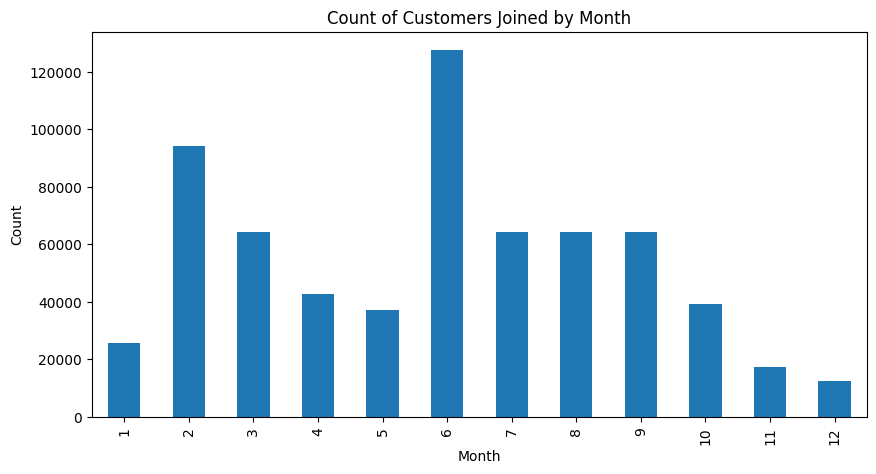

In [13]:
# To generate a bar plot of the count of customers who joined the telecom service in each month, sorted by month
df['Month of Joining'].astype(int).value_counts().sort_index().plot.bar(figsize=(10,5))
plt.title('Count of Customers Joined by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


**Observation**:  A large number of customers joined in June.It could be due to a seasonal promotion or marketing campaign that was particularly effective, or it could be due to external factors such as changes in the market or industry. Further analysis and context would be needed to make a more informed hypothesis.

#### **Visualizing Monthly Customer Acquisition**

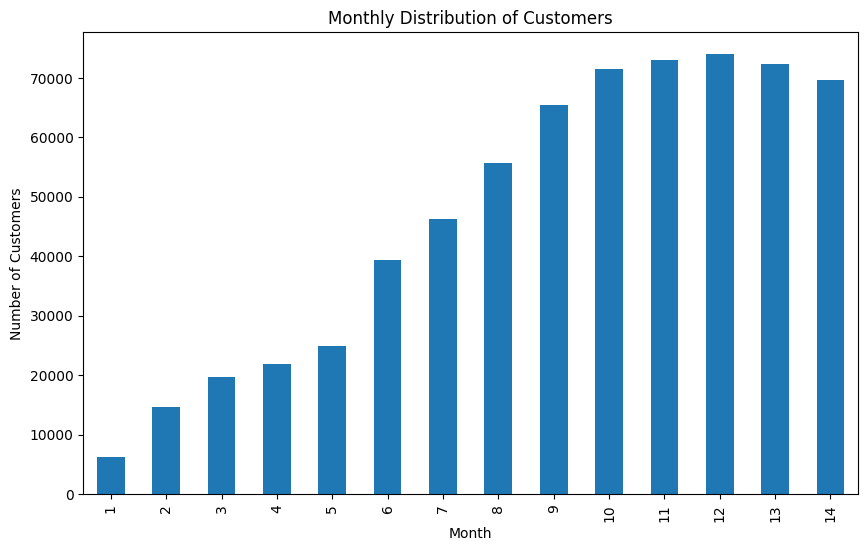

In [14]:
# Distribution of customers across months
customers_per_month = df.groupby("Month")["Customer ID"].nunique()

# Plotting the distribution of customers across months
customers_per_month.plot(kind="bar", figsize=(10, 6))
plt.title("Monthly Distribution of Customers")
plt.xlabel("Month")
plt.ylabel("Number of Customers")
plt.show()


**Observation**:


The graph illustrates a steady increase in the number of customers from January to May, followed by a significant surge in June continuing until December, and subsequent fluctuations in January and February. This pattern implies potential changes in the company's services or marketing strategies during that period.

**Let's examine customer journeys!**





In [15]:
# Filtering the dataset for a specific customer with the ID 'uqdtniwvxqzeu1'
df[df["Customer ID"] == 'uqdtniwvxqzeu1']


,Customer ID,Month of Joining,Month,zip_code,Gender,Age,Married,Dependents,Number of Dependents,Location ID,Service ID,state,county,timezone,area_codes,country,latitude,longitude,arpu,roam_ic,roam_og,loc_og_t2t,loc_og_t2m,loc_og_t2f,loc_og_t2c,std_og_t2t,std_og_t2m,std_og_t2f,std_og_t2c,isd_og,spl_og,og_others,loc_ic_t2t,loc_ic_t2m,loc_ic_t2f,std_ic_t2t,std_ic_t2m,std_ic_t2f,std_ic_t2o,spl_ic,isd_ic,ic_others,total_rech_amt,total_rech_data,vol_4g,vol_5g,arpu_5g,arpu_4g,night_pck_user,fb_user,aug_vbc_5g,Churn Value,Referred a Friend,Number of Referrals,Phone Service,Multiple Lines,Internet Service,Internet Type,Streaming Data Consumption,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Payment Method,Status ID,Satisfaction Score,Churn Category,Churn Reason,Customer Status,offer
1,uqdtniwvxqzeu1,6,6,72566,Male,1,No,No,0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870.0,US,36.22,-92.08,-329.96,69.46,72.08,255.73,148.80,30.00,7.61,308.29,265.20,10.82,0.0,1.23,905.51,1.69,212.93,155.19,29.04,9.15,38.89,0.84,0.0,0.05,32.51,25.53,1183,0,0.00,0.00,0.00,0.00,0.0,1.0,0.00,0,No,0.0,Yes,Yes,No,NaN,14,No,Yes,No,No,Yes,No,No,No,Bank Withdrawal,jucxaluihiluj82863,4,NaN,NaN,Stayed,F
2,uqdtniwvxqzeu1,6,7,72566,Male,1,No,No,0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870.0,US,36.22,-92.08,101.22,1012.60,115.26,52.95,NaN,103.28,15.71,244.20,15.19,NaN,NaN,13.14,455.15,115.63,121.80,699.39,44.49,83.59,914.70,13.25,0.0,0.06,13.05,5.62,295,7,14.83,967.95,-9.40,106.30,1.0,1.0,85.87,0,Yes,6.0,Yes,No,Yes,Cable,82,No,No,Yes,No,Yes,No,No,Yes,Credit Card,vjskkxphumfai57182,3,NaN,NaN,Stayed,NaN
3,uqdtniwvxqzeu1,6,8,72566,Male,1,No,No,0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870.0,US,36.22,-92.08,215.48,84.18,99.85,140.51,4006.99,280.86,6.33,346.14,103.15,183.53,0.0,33.88,495.60,14.01,658.96,195.02,144.11,50.18,2.35,623.94,0.0,0.07,69.13,10.62,354,1,264.90,268.11,-5.15,77.53,0.0,1.0,268.38,0,Yes,10.0,Yes,No,Yes,Fiber Optic,57,No,No,Yes,No,Yes,No,No,Yes,Wallet Balance,cdwbcrvylqca53109,4,NaN,NaN,Stayed,J
4,uqdtniwvxqzeu1,6,9,72566,Male,1,No,No,0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870.0,US,36.22,-92.08,636.55,0.00,0.00,0.00,0.00,45.00,0.00,0.00,0.00,45.00,0.0,0.00,0.00,8787978.00,138.85,201.92,19.89,15.91,23.78,16.01,0.0,0.03,64.35,36.18,0,NaN,52.78,370.59,NaN,NaN,NaN,NaN,399.84,0,Yes,1.0,No,No,Yes,Fiber Optic,38,No,No,No,No,No,Yes,No,Yes,Credit Card,whqrmeulitfj98550,1,NaN,NaN,Stayed,NaN
5,uqdtniwvxqzeu1,6,10,72566,Male,1,No,No,0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870.0,US,36.22,-92.08,771.79,775.76,81.54,67.47,78.41,6.75,6.97,193.49,215.74,0.18,0.0,12.88,33.07,11.55,156.69,128.45,73.36,6.84,16.09,25.74,0.0,0.08,61.54,63.21,700,0,0.00,0.00,789.00,0.00,0.0,1.0,0.00,0,Yes,10.0,Yes,Yes,No,NaN,21,No,No,No,Yes,Yes,Yes,Yes,NaN,Bank Withdrawal,adzabvpghmbju72072,4,NaN,NaN,Stayed,NaN
6,uqdtniwvxqzeu1,6,11,72566,Male,1,No,No,0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870.0,US,36.22,-92.08,565.53,61.23,75.63,281.94,1691.32,48.84,6.50,304.78,186.81,171.10,0.0,38.18,23.13,13.57,50.28,23.20,11.44,14.58,60.26,20.67,0.0,0.04,40.03,65.16,153,1.6,0.00,0.00,0.00,0.00,NaN,NaN,0.00,0,No,0.0,Yes,NaN,No,NaN,62,No,No,Yes,No,Yes,No,No,No,Bank Withdrawal,xjnuhhfmfgtd73026,4,NaN,NaN,Stayed,NaN
7,uqdtniwvxqzeu1,6,12,72566,Male,1,No,No,0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870.0,US,36.22,-92.08,403.33,73.91,90.44,98.25,209.47,4.10,13.52,456.56,146.11,2.47,0.0,2.18,2.82,1.94,19.77,88.70,20.37,58.37,65.31,20.39,0.0,2.21,45.58,9.45,171,8,190.62,175.35,224.56,176.23,0.0,1.0,8052.18,0,Yes,0.0,Yes,No,Yes,DSL,23,No,No,Yes,Yes,Yes,No,No,Yes,Bank Withdrawal,igrkenxzyvdw27549,3,NaN,NaN,Stayed,NaN
8,uqdtniwvxqzeu1,6,13,72566,Male,1,No,No,0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870.0,US,36.22,-92.08

**Observation**:

This customer joined the company in the sixth month and remained active until the fourteenth month of observation.

In [16]:
# Filtering the dataset for a specific customer with the ID 'aabakestdecft46766'
df[df["Customer ID"] == 'aabakestdecft46766']


,Customer ID,Month of Joining,Month,zip_code,Gender,Age,Married,Dependents,Number of Dependents,Location ID,Service ID,state,county,timezone,area_codes,country,latitude,longitude,arpu,roam_ic,roam_og,loc_og_t2t,loc_og_t2m,loc_og_t2f,loc_og_t2c,std_og_t2t,std_og_t2m,std_og_t2f,std_og_t2c,isd_og,spl_og,og_others,loc_ic_t2t,loc_ic_t2m,loc_ic_t2f,std_ic_t2t,std_ic_t2m,std_ic_t2f,std_ic_t2o,spl_ic,isd_ic,ic_others,total_rech_amt,total_rech_data,vol_4g,vol_5g,arpu_5g,arpu_4g,night_pck_user,fb_user,aug_vbc_5g,Churn Value,Referred a Friend,Number of Referrals,Phone Service,Multiple Lines,Internet Service,Internet Type,Streaming Data Consumption,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Payment Method,Status ID,Satisfaction Score,Churn Category,Churn Reason,Customer Status,offer
186597,aabakestdecft46766,3,3,93290,Not Specified,31,Yes,Not Specified,0,wwgmolpjnnym46766,qijdupdvrwhnvxnddn46766,CA,Tulare County,America/Los_Angeles,559.0,US,36.33,-119.29,6103.72,828.16,25.9,272.01,2563.6,0.98,NaN,NaN,4543.7,148.09,0.0,641.84,37.4,584.31,165.9,1238.24,597.5,91.28,78.14,334.35,NaN,NaN,55.75,1158.26,5561,12,368.59,9186.19,538.87,486.06,0.0,1.0,302.21,1,Yes,7.0,Yes,No,Yes,NaN,0,No,Yes,No,No,No,No,No,Yes,Credit Card,wmackuncncobz10712,3,NaN,NaN,Churned,E


**Observation**:

This consumer joined in the third month and left in the same month.

In [17]:
# Compute basic statistics of count of rows per customer
df.groupby(['Customer ID']).size().describe()


count    98230.000000
mean         6.655329
std          3.377418
min          1.000000
25%          4.000000
50%          6.000000
75%          9.000000
max         14.000000
dtype: float64

**Observation**:

Based on the basic statistics of the count of rows per customer, the average duration of a customer's subscription is approximately 6.7 months. This prompts several hypotheses:

1. The company should enhance its customer retention strategies to prolong the average subscription duration.

2. Evaluating the pricing strategies could aid in retaining customers for a longer period.

3. Improving service quality may enhance customer loyalty and extend their subscription duration.

Further analysis of other variables is required to validate or refute these hypotheses and gain deeper insights into the underlying issues.

In [18]:
# Count the frequency of customers based on the number of rows associated with each customer ID.
df.groupby(['Customer ID']).size().value_counts()

9     13086
6     11896
5      9761
7      9647
8      8368
3      8061
1      7284
4      7176
13     5603
2      5069
12     4441
10     3631
11     3441
14      766
Name: count, dtype: int64

**Observation**:

The frequency distribution indicates that the majority of customers fall within the 5 to 9-month duration bracket, with the highest count observed at 9 months. Based on this, I can hypothesize that:

1. Customers tend to stay with the telecom service provider for an extended period, typically between 5 to 9 months.

2. There might be a higher churn rate after the 9-month mark, suggesting potential issues or dissatisfaction with the service beyond this duration.

### **`Zip Code` Analysis**

Some possible hypotheses I've considered include:

* The distribution of customers across zip codes follows a normal distribution.

* Certain zip codes may have significantly more customers compared to others.

* The distribution of customers across zip codes may be skewed to the right, indicating that most zip codes have fewer customers.

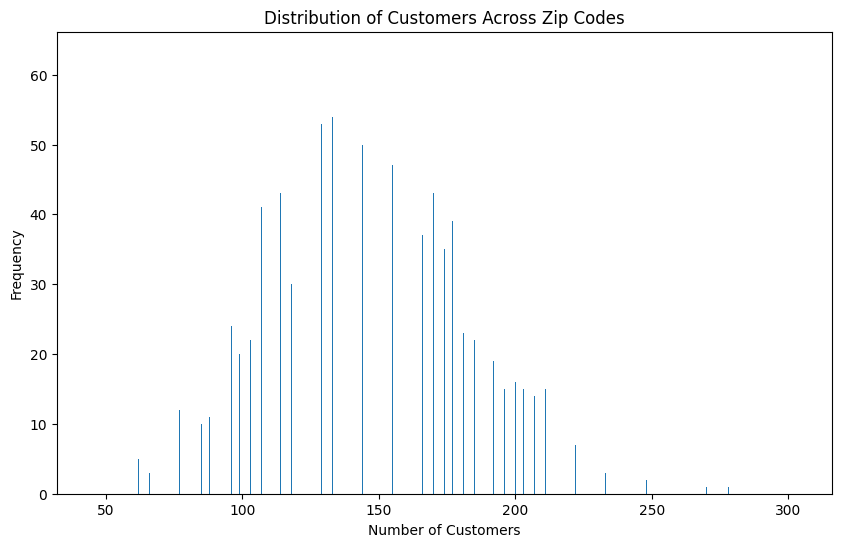

count    4528.000000
mean      144.380080
std        35.154312
min        45.000000
25%       120.000000
50%       143.000000
75%       167.000000
max       303.000000
Name: count, dtype: float64

In [19]:
# Number of unique zip codes in the dataset
num_unique_zips = df['zip_code'].nunique()

# Number of customers in each zip code
cust_per_zip = df['zip_code'].value_counts()

# Plotting the distribution of customers across zip codes
cust_per_zip.plot(kind='hist', bins=num_unique_zips, figsize=(10,6))
plt.title('Distribution of Customers Across Zip Codes')
plt.xlabel('Number of Customers')
plt.ylabel('Frequency')
plt.show()

# Summary statistics of the number of customers per zip code
cust_per_zip.describe()


**Observation**:

The distribution of customers across zip codes appears to follow a normal distribution, confirming the hypothesis above.

The histogram shows that the distribution of customers across zip codes does not exhibit significant skewness. This suggests that the customer base is relatively evenly distributed across zip codes, with no clear pockets of customers in particular areas standing out as significantly more popular than others. This broad distribution indicates a healthy customer base, not overly concentrated in specific geographic regions.

### **Exploring `Gender` Column**

In [20]:
# Count the number of customers in each gender category
gender_counts = df['Gender'].value_counts()

# Display the gender counts
gender_counts


Gender
Female           278668
Male             276917
Not Specified     48938
Other             39206
Name: count, dtype: int64

In [21]:
# Count the number of unique customers whose gender is missing
print('Customers whose gender is missing:', df[df['Gender'].isna()]['Customer ID'].nunique())


Customers whose gender is missing: 1487


**Observation**:

A total of 1487 consumers are missing gender information. It's advisable to impute these values with "Not specified" to maintain data completeness.

In [22]:
# Filling missing values in the Gender column with 'Not Specified'
df['Gender'] = df['Gender'].fillna('Not Specified')

# Counting the number of customers for each gender, including those with missing values
gender_counts = df['Gender'].value_counts(dropna=False)
print(gender_counts)


Gender
Female           278668
Male             276917
Not Specified     58962
Other             39206
Name: count, dtype: int64


### **Exploring `Age` Column**

Potential hypotheses for the "Age" column include:

* A majority of customers are likely to belong to the age range of 20 to 40 years.

* Outliers may exist in the age column due to the possibility of customers entering invalid age values.

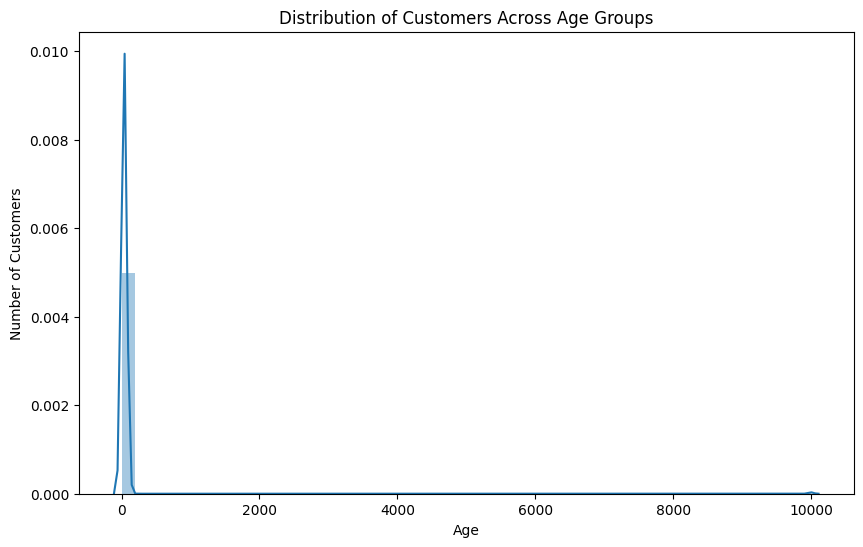

count    653753.000000
mean         65.357427
std         538.575025
min           1.000000
25%          27.000000
50%          33.000000
75%          43.000000
max        9999.000000
Name: Age, dtype: float64

In [23]:
# Plotting the distribution of customers across age groups
plt.figure(figsize=(10, 6))
sns.distplot(df['Age'])
plt.title('Distribution of Customers Across Age Groups')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

# Descriptive statistics of the age column
df['Age'].describe()


**Observation**:

From the distribution plot, it's evident that there are outliers in the age column, as indicated by the maximum age value aboveof 9999. This confirms our hypothesis that some customers might have entered invalid ages, leading to outliers in the dataset.

In [24]:
# Displaying the age values sorted in ascending order
df['Age'].sort_values()


222187       1
413353       1
413352       1
413351       1
413350       1
          ... 
34536     9999
34535     9999
110719    9999
380795    9999
142984    9999
Name: Age, Length: 653753, dtype: int64

In [25]:
# Calculating the specified quantiles for the Age column
df['Age'].quantile([0.8, 0.9, 0.95, 0.99])


0.80    47.0
0.90    55.0
0.95    62.0
0.99    75.0
Name: Age, dtype: float64

In [26]:
# Calculating specific quantiles for the Age column to handle outliers
df['Age'].quantile([0.99, 0.999, 0.99991, 0.999999])


0.990000      75.0
0.999000    9999.0
0.999910    9999.0
0.999999    9999.0
Name: Age, dtype: float64

In [27]:
# Counting the occurrences of each age value in the Age column
df['Age'].value_counts()


Age
25      27994
30      27815
29      27361
27      27233
26      27023
28      26872
33      26315
31      26259
34      25718
32      25396
35      24516
39      16825
40      16761
38      16703
41      16313
20      15981
36      15706
37      15053
21      14817
22      13789
23      12230
24      12014
50      11173
47      10973
49      10754
48      10637
42      10159
43       9406
45       8367
46       8320
44       8305
1        8299
19       7714
53       6933
55       6709
54       6463
52       5081
61       4978
60       4957
51       4872
64       4625
59       4542
62       4482
63       4386
56       4256
58       3985
57       3928
65       3640
9999     1915
69       1265
70       1213
79       1177
74       1161
75       1120
72       1106
68       1099
73       1078
76       1053
77       1001
71        990
78        988
67        835
66        714
80        400
Name: count, dtype: int64

**Observations:**


1. The age values in the dataset range from 1 to 9999. However, the value 9999 appears to be an outlier as it is significantly higher than the rest of the values.


2. Calculating specific quantiles for the Age column reveals that 80% of the customers are below the age of 47, 90% are below 55, 95% are below 62, and 99% are below 75. This suggests that there might be outliers present in the higher age range.


3. Further investigation into extreme quantiles (99th percentile and above) indicates that the values at the 99th percentile and beyond are all recorded as 9999. This reinforces the presence of outliers in the dataset.


4. Analyzing the occurrences of each age value shows that the majority of customers fall within the age range of 20 to 50. However, there is a considerable number of occurrences with the age value of 9999, indicating the presence of invalid or missing age entries. These entries need to be addressed to ensure the accuracy of the data analysis.


**Justification for Age Data Cleaning:**

To address the outliers and missing or invalid age entries, I'll replace all values greater than 75 (which includes the outlier value 9999) and with NaN (Not a Number). Additionally, replace Age values equal to 1 with NaN. This step is crucial for ensuring that the data used for analysis is accurate and reliable, as extreme values and missing data can skew the results and lead to erroneous conclusions.





In [28]:
# Replace values greater than 75 (including the outlier value 9999) with NaN (Not a Number)
# Additionally, replace Age values equal to 1 with NaN
df['Age'].replace([9999, 1], np.NaN, inplace=True)


In [29]:
# Confirming extreme quantiles for the Age column
df['Age'].quantile([0.99, 0.999, 0.99991, 0.999999])


0.990000    74.0
0.999000    79.0
0.999910    80.0
0.999999    80.0
Name: Age, dtype: float64

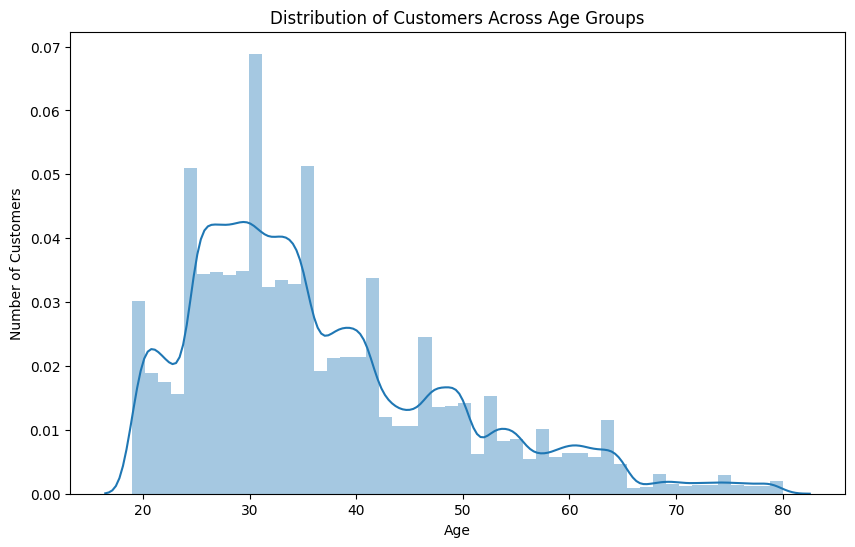

In [30]:
# Plotting the distribution of customers across age groups
plt.figure(figsize=(10, 6))
sns.distplot(df['Age'])
plt.title('Distribution of Customers Across Age Groups')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()


**Observation**:

The distribution of customers across age groups appears to be more reasonable after removing outliers and invalid entries. As expected, the majority of customers fall within the age range of 20 to 40 years, confirming our initial hypothesis.

### **Exploring `Married` Feature**

In [31]:
# Counting the occurrences of each unique value in the 'Married' column, including NaN values
df['Married'].value_counts(dropna=False)


Married
Yes              279124
No               276240
Not Specified     84013
NaN               14376
Name: count, dtype: int64

In [32]:
# Counting the number of unique customer IDs where the 'Married' column is NaN
df[df['Married'].isna()]['Customer ID'].nunique()


2179

In [33]:
# Filling NaN values in the 'Married' column with 'Not Specified'
df['Married'] = df['Married'].fillna('Not Specified')


In [34]:
# Count of each unique value in the 'Married' column after filling NaN values with 'Not Specified'
df['Married'].value_counts(dropna=False)


Married
Yes              279124
No               276240
Not Specified     98389
Name: count, dtype: int64

**Observation:**

Upon analyzing the `Married` column, I discovered 14,376 missing values (NaN) across the dataset, corresponding to 2,179 unique customer IDs.

To handle this, I opted to fill the missing values with `Not Specified`. This adjustment resulted in 98,389 records now categorized as `Not Specified` in the `Married` column. Consequently, the distribution of marital status comprises `Yes`, `No`, and `Not Specified` categories, with `Yes` occurring 279,124 times and `No` occurring 276,240 times.

### **Exploring `Dependents` Feature**

In [35]:
# Count the number of unique values in "Dependents" column
df['Dependents'].value_counts(dropna=False)


Dependents
No               320931
Yes              169579
Not Specified    138619
NaN               24624
Name: count, dtype: int64

**Observation:**

The `Dependents` column indicates whether a customer has dependents or not, with categories including `Yes`, `No`, and `Not Specified`. Additionally, there are some missing values marked as NaN. I'll replace these missing values with `Not Specified` for now, and further address both the **Dependents** and **Number of Dependents** columns together in the subsequent analysis.

In [36]:
# Fill missing values in the "Dependents" column with "Not Specified"
df['Dependents'] = df['Dependents'].fillna('Not Specified')


In [37]:
# Counts the number of unique values in the "Dependents" column after imputation
df['Dependents'].value_counts(dropna=False)


Dependents
No               320931
Yes              169579
Not Specified    163243
Name: count, dtype: int64

In [38]:
# Calculate the percentage of customers with dependents
percent_with_dependents = (df["Dependents"].value_counts(normalize=True) * 100).loc["Yes"]
print(f"Percentage of customers with dependents: {percent_with_dependents:.2f}%")


Percentage of customers with dependents: 25.94%


**Observation**:

The percentage of customers with dependents provides valuable insight into the family structure of the customer base. This understanding can inform decisions regarding the types of services that are sought after by families, as well as identify potential opportunities for introducing family-oriented plans and promotions.

### **Exploring `Number of Dependents` Feature**

In [39]:
# Counting the occurrences of each unique value in the "Number of Dependents" column
df['Number of Dependents'].value_counts(dropna=False)


Number of Dependents
0      435554
1       79167
4       39647
2       21156
3       16031
7       15468
6       15137
8       13625
9       13023
699      4945
Name: count, dtype: int64

**Observation**:

The `Number of Dependents` column does not contain any null values.

However, an unusual occurrence is noted with 699 dependents. These outliers will be replaced with NaN values and addressed during the imputation process





**Problem**:

* **Enhancing Customer Satisfaction:** A significant portion of our customer base consists of individuals with zero dependents. Targeting this segment effectively could enhance customer satisfaction by providing tailored products and services aligned with their needs. Customers with dependents typically exhibit higher Average Revenue Per User (ARPU) and are less prone to churn, indicating their deeper engagement. However, devising a distinct strategy is imperative to ensure their long-term loyalty.

In [40]:
# Replace 699 with NaN in the 'Number of Dependents' column
df['Number of Dependents'] = np.where(df['Number of Dependents'] == 699, np.nan, df['Number of Dependents'])


In [41]:
# Count the frequency of unique values in the 'Dependents' and 'Number of Dependents' columns
df[['Dependents', 'Number of Dependents']].value_counts(dropna=False)


Dependents     Number of Dependents
No             0.0                     254060
Not Specified  0.0                     108943
Yes            0.0                      72551
No             1.0                      45190
Not Specified  1.0                      19096
No             4.0                      18002
Yes            2.0                      15926
               1.0                      14881
               3.0                      11908
               4.0                      11696
               7.0                      11532
               6.0                      11186
               8.0                      10295
Not Specified  4.0                       9949
Yes            9.0                       9604
Not Specified  2.0                       5230
               3.0                       4123
               6.0                       3951
               7.0                       3936
No             NaN                       3679
Not Specified  9.0                       341

**Observation**:


* Some rows contain NaN values in the 'Dependents' column, while the corresponding `Number of Dependents` column has a value of 0.

* This inconsistency suggests ambiguity; the 'Dependents' column implies that the customer has dependents, yet the `Number of Dependents` is recorded as 0.

* It's advisable to consult with the business team to clarify this discrepancy. However, addressing this issue is not within the scope of the current notebook.


### **Exploring `Location ID` and `Service ID` Columns**

In [42]:
# Counting the number of unique Location IDs
df['Location ID'].nunique()


98230

In [43]:
# Counting the number of unique Service IDs
df['Service ID'].nunique()


98230

**Observation**:

Customer ID is associated with a unique combination of Location ID and Service ID, suggesting a close relationship between these variables.







In [44]:
# Counting the frequency of unique combinations of Location ID and Service ID
df[['Location ID','Service ID']].value_counts(dropna=False)


Location ID         Service ID              
hlrjtcmwztmd130753  enaqvnivkxydixfyqm130753    14
jscprjytujws25932   bfryykgvokxkyfznot25932     14
llgnltpyyoun38767   jsggccqjebwceilwmz38767     14
legwdrxdiaro61600   ntahpedsuygrdtopia61600     14
uvucxidcaizg61475   amgakuqbjlubbntjls61475     14
                                                ..
wsuvsaqtrotn58881   yzcskeospoebdbpzxu58881      1
wswcpmvctflk25234   lpulhrynhoujhifter25234      1
jikgwoxcifwl86729   stdluukccrzawlvstx86729      1
jijxolpufjvz18051   vtcqteigmpqmukrium18051      1
zzzzvucoqifl133665  kcvdllqcwoedvhxtdr133665     1
Name: count, Length: 98230, dtype: int64

**Observation**:

The counts of unique values for Location ID and Service ID columns are almost identical, indicating a strong correlation between location ID and service ID. This supports our assumption that location ID and service ID are closely related.





### **Exploring `State` Feature**

In [45]:
# Count the unique values of the State column
df['state'].value_counts(dropna=False)


state
CA    383500
WA    105313
AR    103551
NM     61389
Name: count, dtype: int64

**Observation**:

There are no null values in the state column.

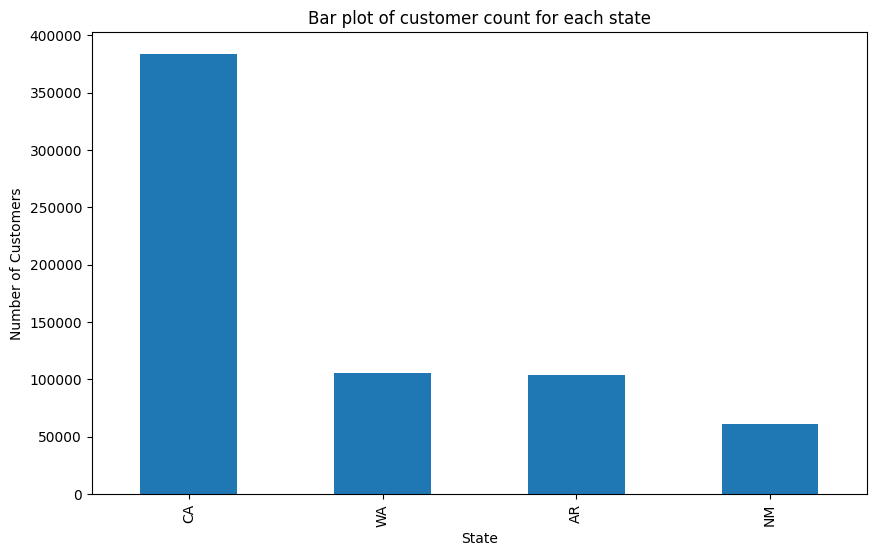

In [46]:
# Bar plot of customer count for each state
plt.figure(figsize=(10,6))
df['state'].value_counts(dropna=False).plot(kind='bar')
plt.title('Bar plot of customer count for each state')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.show()


In [47]:
# Grouping by state and calculating unique customer count
df.groupby(['state'],as_index=False).agg(Number_of_customers=('Customer ID','nunique'))


,state,Number_of_customers
0,AR,15521
1,CA,57665
2,NM,9209
3,WA,15835


**Observation:**

The analysis reveals that California has the highest number of unique customers, totaling 57,665. This dominance in customer count suggests a significant presence of customers from California compared to other states. Additionally, considering the uniform distribution of zip codes across states, it is reasonable to hypothesize that California may have a larger number of zip codes compared to other states, contributing to its higher customer count.


**Hypothesis**:

* It is possible that the state of California has a large number of zip codes among other states. This could potentially explain the higher customer count observed in California compared to other states.


In [48]:
# Count the number of unique zip codes per state
df.groupby('state')['zip_code'].nunique()


state
AR     712
CA    2655
NM     428
WA     733
Name: zip_code, dtype: int64

**Observation:**


Yes! California has maximum zip codes.

**Hypotheses and Problems**


**Hypotheses:**


* The telecom service provider has a strong presence in California, leading to a higher customer base.

* Customers from California have higher mobile phone usage compared to other states, leading to more subscriptions with the telecom service provider.


**Problems:**

* Location-based marketing strategy: The insight that the majority of customers are from California could be used to develop a location-based marketing strategy that targets customers in this state with customized offers, campaigns, and promotions.

* Improve customer distribution: Analyze and bring in more customers from other states to even out the customer distribution and ensure the company is not overly reliant on a particular area.

### **Exploring `County` Feature**

In [49]:
# Group by county and calculate the number of unique customers in each county, then sort the result by the number of customers
df.groupby(['county'], as_index=False).agg(Number_of_customers=('Customer ID', 'nunique')).sort_values(by=['Number_of_customers'])


,county,Number_of_customers
51,Garfield County,17
99,Mckinley County,28
89,Los Alamos County,37
38,De Baca County,58
91,Luna County,61
19,Chicot County,63
58,Harding County,67
6,Asotin County,73
182,Wahkiakum County,77
2,Alpine County,79


In [50]:
# Count the number of missing values in county column
df['county'].isna().sum()


918

**Observations**:

* The county with the highest number of customers is Los Angeles, while Garfield County has the lowest number of customers.
*
There are 918 missing values in the county column.

**Hypotheses**:

* Customers residing in densely populated areas, such as Los Angeles, might exhibit different preferences and behaviors compared to those in less populated areas, like Garfield County.


Analyzing customer preferences and behaviors across various locations can facilitate the company in tailoring its marketing and promotional strategies more effectively.

In [51]:
# Retrieving the values of state, latitude, and longitude where county information is missing
df[df['county'].isna()][['state','latitude','longitude']].value_counts()


state  latitude  longitude
WA     47.42     -122.25      198
AR     34.75     -92.27       191
NM     35.82     -106.20      179
WA     47.85     -122.22      131
NM     32.99     -106.97      112
CA     37.95     -121.29      107
Name: count, dtype: int64

In [52]:
# Retrieving the county for specific latitude and longitude coordinates
df[(df.latitude==32.99) & (df.longitude==-106.97)]['county'].value_counts(dropna=False)

county
NaN    112
Name: count, dtype: int64

In [53]:
# Finding the county for specific latitude and longitude values
df[(df['latitude'] == 34.75) & (df['longitude'] == -92.27)]['county'].value_counts(dropna=False)


county
NaN    191
Name: count, dtype: int64

In [54]:
# Finding the county for specific latitude and longitude values
df[(df['latitude'] == 35.82) & (df['longitude'] == -106.20)]['county'].value_counts(dropna=False)


county
NaN    179
Name: count, dtype: int64

In [55]:
# Finding the county for specific latitude and longitude values
df[(df['latitude'] == 47.85) & (df['longitude'] == -122.22)]['county'].value_counts(dropna=False)


county
NaN    131
Name: count, dtype: int64

In [56]:
# Finding the county for specific latitude and longitude values
df[(df['latitude'] == 37.95) & (df['longitude'] == -121.29)]['state'].value_counts(dropna=False)


state
CA    107
Name: count, dtype: int64

In [57]:
# Replacing missing values in county with 'Unknown'
df['county'] = df['county'].fillna('Unknown')
df['county']


0         Chicot County
1          Izard County
2          Izard County
3          Izard County
4          Izard County
              ...      
653748    Yakima County
653749    Yakima County
653750    Yakima County
653751    Yakima County
653752    Yakima County
Name: county, Length: 653753, dtype: object

**Observation**:



In the dataset, certain latitude and longitude coordinates are associated with missing county information (NaN). To address thiIcan determdine the county corresponding to each latitude and longitude pair. However, for the sake of simplicity in this analys I we've opted to replace these missing county values with 'Unknown





### **Exploring `Timezone` Column**

In [58]:
# Counting the number of customers in each timezone, including NaN values:
df['timezone'].value_counts(dropna=False)


timezone
America/Los_Angeles    488813
America/Chicago        103404
America/Denver          61389
NaN                       147
Name: count, dtype: int64

In [59]:
# Identifying the customers with missing timezone along with their state and county information:
df[df['timezone'].isna()][['state','county']].value_counts(dropna=False)


state  county          
AR     Craighead County    147
Name: count, dtype: int64

In [60]:
# Checking the unique timezone values for customers in Craighead County
df[df.county == 'Craighead County'].timezone.unique()


array([nan, 'America/Chicago'], dtype=object)

In [61]:
# Fill the missing timezone values with "America/Chicago"
df['timezone'] = df['timezone'].fillna('America/Chicago')


**Observation:**

Among the 147 missing timezone values, all are associated with Craighead County. Given that the timezone for this county is typically "America/Chicago", I opted to fill these missing values with that timezone.

**Hypothesis**:

* Variations in timezones among customers may impact calling behavior and usage patterns, potentially influencing company revenue and service quality. Further analysis is required to explore this hypothesis.





### **Exploring `Area Codes` Feature**

In [62]:
# Count the occurrences of each unique value in the 'area_codes' column, including NaN values
df['area_codes'].value_counts(dropna=False)


area_codes
8.700000e+02    58440
5.050000e+02    42415
NaN             39657
5.090000e+02    38585
5.300000e+02    32844
3.600000e+02    31031
5.590000e+02    22731
7.070000e+02    22095
2.090000e+02    21601
9.160000e+02    19833
5.010000e+02    19443
4.790000e+02    18577
5.750000e+02    17872
7.600000e+02    16975
8.050000e+02    16441
6.190000e+02    14822
2.130000e+02    14727
4.150000e+02    11374
6.610000e+02    10954
2.530000e+02    10852
6.260000e+02    10382
5.100000e+02    10001
4.080000e+02     9844
7.140000e+02     9372
9.090000e+02     8873
5.620000e+02     7832
2.060000e+02     7236
9.510000e+02     7165
4.250000e+02     6667
6.500000e+02     6590
8.310000e+02     6385
3.100000e+02     5600
8.180000e+02     5428
9.250000e+02     4984
9.490000e+02     4228
3.230000e+02     4038
6.577140e+05     2973
4.427600e+05     2823
3.104240e+05     2706
9.099510e+05     2320
6.198580e+05     1942
3.236260e+05     1661
7.478180e+05     1651
5.309160e+05     1618
7.149490e+05     1482

**There are some missing values. I'll explore deeper.**

In [63]:
# Count the values of state and county for missing values of area codes
df[df['area_codes'].isna()][['state','county']].value_counts(dropna=False)


state  county                
CA     San Bernardino County     4339
       Los Angeles County        2837
WA     Pierce County             1944
CA     El Dorado County          1921
       Placer County             1709
       Kern County               1572
AR     Independence County       1540
CA     Marin County              1389
WA     King County               1375
CA     Trinity County            1366
       Contra Costa County       1241
       San Diego County          1228
WA     Kitsap County             1102
CA     Riverside County          1087
       Monterey County           1065
       Yolo County                962
WA     Snohomish County           839
CA     San Mateo County           831
       Humboldt County            821
AR     Jackson County             785
CA     San Luis Obispo County     682
       Santa Barbara County       620
AR     Jefferson County           587
       Cleburne County            526
CA     Orange County              489
       Sacramento Co

**I'll see if any county has only one area codes value.**

In [64]:
# Count the values of County and area codes
df[['county','area_codes']].value_counts(dropna=False)

county                 area_codes
Sacramento County      916.0         18145
San Diego County       619.0         14822
Los Angeles County     213.0         14727
Fresno County          559.0         14412
Los Angeles County     626.0         10382
                                     ...  
                       760661.0         83
San Diego County       619760.0         79
El Dorado County       530209.0         74
Mono County            530.0            73
San Bernardino County  661760.0         64
Name: count, Length: 507, dtype: int64

**Observation**:

The data reveals that San Diego County exhibits at least two distinct area codes. This implies that no two counties share the same area code, suggesting a unique association between counties and area codes. To ensure the accuracy of this finding, verification with the company is recommended.

**For now, I'll proceed by replacing the missing values with "Unknown".**

In [65]:
# Filling the missing value with Unknown
df['area_codes'] = df['area_codes'].fillna('Unknown')


### **Exploring `Latitude` and `Longitude` Features**

In [66]:
# Check the number of nulls in latitude
df['latitude'].isna().sum()


0

In [67]:
# Check the number of nulls in longitude
df['longitude'].isna().sum()


0

In [68]:
# Count the unique values of latitude and longitude
df[['latitude','longitude']].value_counts()


latitude  longitude
38.58     -121.49      6584
35.11     -106.62      3382
47.61     -122.33      2177
34.72     -92.35       2012
38.55     -121.49      1886
                       ... 
47.62     -122.02        52
47.65     -122.55        49
32.87     -114.72        49
35.34     -115.43        46
36.03     -93.92         45
Name: count, Length: 4108, dtype: int64

**Are these customers from California, given that there are a significant number of maximum consumers from that state?**

In [69]:
# Checking if the latitude and longitude values correspond to California
df[df['latitude'] == 38.58][['latitude', 'longitude', 'state']].value_counts()


latitude  longitude  state
38.58     -121.49    CA       6584
          -121.37    CA        154
          -121.30    CA        100
Name: count, dtype: int64

**Yes!**

**Observation**:

There are no null values in the latitude and longitude columns. The most frequent coordinates are approximately 38.58 latitude and -121.49 longitude.

### **Exploring `Average Revenue per User (ARPU)`**

Some hypotheses for univariate analysis are:

* I don't know which customers have been good or bad to our organization.

* The distribution of ARPU values might be skewed. The median ARPU might be a better measure of central tendency than the mean ARPU.

* There might be some outliers in ARPU values

In [70]:
# Count the null values in ARPU
df['arpu'].isna().sum()


0

**There are no null values in arpu.**

<Figure size 1000x600 with 0 Axes>

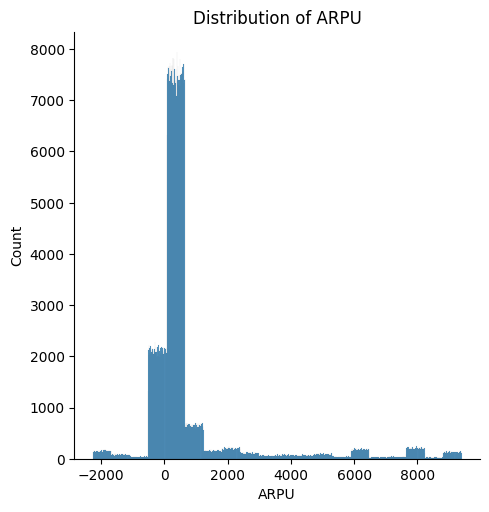

In [71]:
# Distribution plot of ARPU
plt.figure(figsize=(10,6))
sns.displot(df['arpu'])
plt.title('Distribution of ARPU')
plt.xlabel('ARPU')
plt.ylabel('Count')
plt.show()


**Observation**:

* The distribution of ARPU values appears to be right-skewed, with most values concentrated below 500. This suggests that there are very high ARPU values for a few customers, supporting our hypotheses.

*
Additionally, there are some negative ARPU values, which may be attributed to refunds. Negative ARPU indicates that the company is losing money on a per-user basis rather than making a profit. It's not uncommon for telecom companies to experience negative ARPU due to the high costs associated with acquiring and servicing customers.


In [72]:
# Investigating negative ARPU values
df.arpu.describe()


count    653753.000000
mean        781.196280
std        1807.269437
min       -2258.680000
25%         118.940000
50%         348.540000
75%         580.650000
max        9394.500000
Name: arpu, dtype: float64

In [73]:
# Investigating the number of customers with negative ARPU
df[df['arpu'] < 0].shape


(115942, 74)

In [74]:
# Calculate the percentage of customers with negative ARPU
negative_arpu_percentage = (115942 / df.shape[0]) * 100
negative_arpu_percentage


17.734832574382068

**Observation**:

- The discovery that 17.7% of customers have negative ARPU indicates a substantial portion of the customer base isn't generating revenue for the telecom company.
-
This could stem from various factors like inactive accounts, delinquencies, or outstanding balances.

- To delve deeper into this, I can explore related variables such as churn status. Additionally, analyzing the distribution of negative ARPU across demographics like age, gender, and location might reveal patterns or trends.

- Further investigation can also uncover correlations between negative ARPU and usage patterns, service subscriptions, and customer satisfaction scores.

- This comprehensive analysis is crucial for understanding the implications of negative ARPU on the telecom company's operations.


### **Exploring Average revenue per user over 4G  and 5G network (ARPU 4G & ARPU 5G)**

In [75]:
# Checking for Null Values
df['arpu_4g'].isna().sum()


212319

In [76]:
# Checking for Null Values
df['arpu_5g'].isna().sum()


210855

**There are more than 210K null values in arpu_4g and arpu_5g.**

In [77]:
# Analyzing Three Variables Together
(df['arpu_5g'] + df['arpu_4g'] == df['arpu']).value_counts(dropna=False)


False    653749
True          4
Name: count, dtype: int64

**Observation**:

The sum of ARPU for 4G and 5G does not match the overall ARPU.



**Hypothesis**:

- `Overall ARPU = arpu_4g + arpu_5g + other_arpu_components`

  __where:__ `other_arpu_components` represent the revenue generated from other sources such as voice calls, messaging, and data usage on 2G and 3G networks.

**I'll explore how to handle null values in these columns.**

In [78]:
# Frequency count of different values in the 'total_rech_data' column for users who did not have any data
# recharge and also have missing values in both 'arpu_4g' and 'arpu_5g' columns
df[(df['arpu_4g'].isna()) & (df['arpu_5g'].isna())]['total_rech_data'].value_counts(dropna=False)


total_rech_data
NaN    195182
13        802
30        744
26        725
27        711
12        656
16        583
29        458
25        386
31        370
19        332
15        317
32        159
18        152
24         97
20         41
Name: count, dtype: int64

**Observation**:

The majority of entries with missing values in both `arpu_4g` and `arpu_5g` columns correspond to customers who haven't recharged for internet service (`total_rech_data` is NaN). This suggests that the null values in `arpu_4g` and `arpu_5g` likely indicate customers who have not used or recharged for internet services. Further analysis of the `total_rech_data` variable will help us impute these values appropriately.

### **Exploring `Night Pack User` Feature**

In [79]:
# Check the value counts
df['night_pck_user'].value_counts(dropna=False, normalize=True)


night_pck_user
NaN    0.570709
0.0    0.335861
1.0    0.093430
Name: proportion, dtype: float64

**Observation:**

With over 50% of the values missing in the `night_pck_user` column, attempting to impute these missing values could introduce bias into our analysis.

Therefore, it's prudent to retain the NaNs and proceed with analyzing the available data.





### **Exploring Facebook User - Social Networking Scheme**

In [80]:
# Check the counts of unique values in fb user column
df['fb_user'].value_counts(dropna=False, normalize=True)


fb_user
NaN    0.627751
1.0    0.296234
0.0    0.076015
Name: proportion, dtype: float64

**Observation**:

- Since more than 50% of the `fb_user` column contains null values, drawing conclusions based on this variable is not feasible.

- Analyzing or visualizing this variable may not yield meaningful insights due to the high proportion of missing data.

- Including `fb_user` in our analysis would require dropping a substantial portion of the dataset, potentially leading to biased or inaccurate results.

- Consequently, it might be advisable to exclude this variable entirely from our analysis.


### **Volume Based cost for 5G network (outside the scheme paid based on extra usage)**

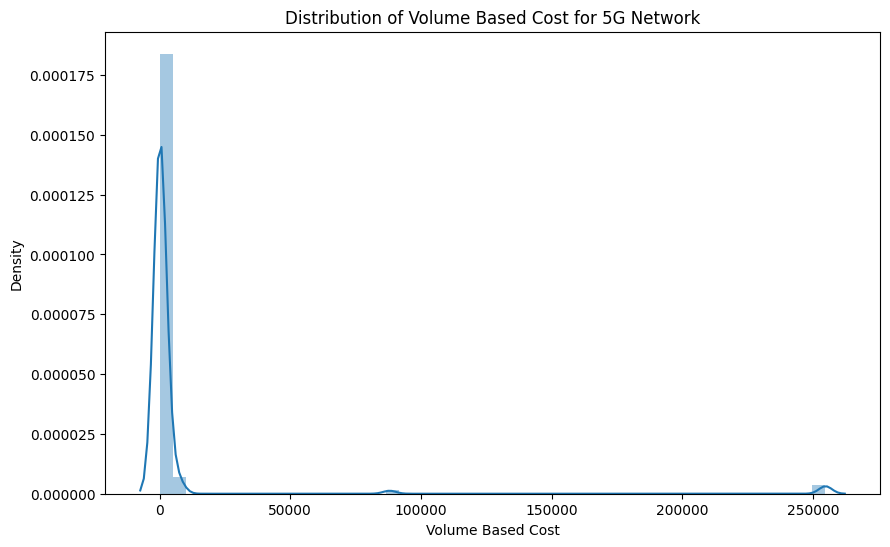

In [81]:
# Plot distribution of aug_vbc_5g
plt.figure(figsize=(10,6))
sns.distplot(df['aug_vbc_5g'])

# Add title and labels to the plot
plt.title('Distribution of Volume Based Cost for 5G Network')
plt.xlabel('Volume Based Cost')
plt.ylabel('Density')
plt.show()


In [82]:
# statistics for aug_vbc_5g
df['aug_vbc_5g'].describe()


count    653753.000000
mean       6145.362554
std       35849.567900
min           0.000000
25%           0.000000
50%         118.030000
75%         322.920000
max      254687.000000
Name: aug_vbc_5g, dtype: float64

**Hypotheses**:

* The distribution of `aug_vbc_5g` appears to have outliers, as indicated by the long right tail in the distribution plot.
*
The maximum value of 254687 fo`r aug_vbc_`5g seems unusually high and may be erroneous. It's worth investigating further to determine if it's a correct value or an outlier.

In [83]:
# Maximum values of aug_vbc_5g at different quantiles
df['aug_vbc_5g'].quantile([0.8, 0.9, 0.95, 0.99])


0.80       363.630
0.90      1845.418
0.95      6470.342
0.99    254687.000
Name: aug_vbc_5g, dtype: float64

In [84]:
# Problems observed in the 99th percentile of aug_vbc_5g
df['aug_vbc_5g'].quantile([0.99, 0.999, 0.9999])


0.9900    254687.0
0.9990    254687.0
0.9999    254687.0
Name: aug_vbc_5g, dtype: float64

**254687 seems incorrect and seems highly unlikely and may be an error or an outlier. I'll replace it with `Nan`**

In [85]:
# Replace incorrect max value with NaN
df['aug_vbc_5g'].replace(254687.0, np.NaN, inplace=True)


In [86]:
# Investigate max value of aug_vbc_5g
df['aug_vbc_5g'].quantile([0.99, 0.999, 0.9999])


0.9900     8028.1574
0.9990    87978.0000
0.9999    87978.0000
Name: aug_vbc_5g, dtype: float64

**Replacing the incorrect maximum value of 87978 with NaN is justified for the same reason as before. This value appears to be unusually high and could be an error or an outlier.**

In [87]:
# Replacing the incorrect maximum value with NaN
df['aug_vbc_5g'].replace(87978, np.NaN, inplace=True)


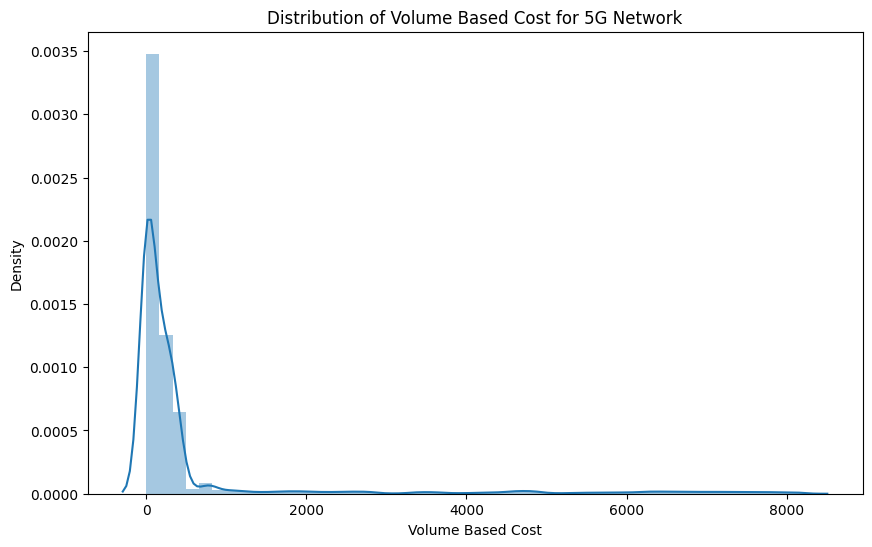

In [88]:
# Plotting the distribution of aug_vbc_5g again
plt.figure(figsize=(10,6))
sns.distplot(df['aug_vbc_5g'])

# Adding title and labels to the plot
plt.title('Distribution of Volume Based Cost for 5G Network')
plt.xlabel('Volume Based Cost')
plt.ylabel('Density')
plt.show()


In [89]:
# Printing updated quantiles for aug_vbc_5g
df['aug_vbc_5g'].quantile([0.8, 0.9, 0.99])


0.80     345.920
0.90     789.000
0.99    7387.188
Name: aug_vbc_5g, dtype: float64

In [90]:
# Filtering values greater than 5000 for aug_vbc_5g
df[df['aug_vbc_5g'] > 5000]


,Customer ID,Month of Joining,Month,zip_code,Gender,Age,Married,Dependents,Number of Dependents,Location ID,Service ID,state,county,timezone,area_codes,country,latitude,longitude,arpu,roam_ic,roam_og,loc_og_t2t,loc_og_t2m,loc_og_t2f,loc_og_t2c,std_og_t2t,std_og_t2m,std_og_t2f,std_og_t2c,isd_og,spl_og,og_others,loc_ic_t2t,loc_ic_t2m,loc_ic_t2f,std_ic_t2t,std_ic_t2m,std_ic_t2f,std_ic_t2o,spl_ic,isd_ic,ic_others,total_rech_amt,total_rech_data,vol_4g,vol_5g,arpu_5g,arpu_4g,night_pck_user,fb_user,aug_vbc_5g,Churn Value,Referred a Friend,Number of Referrals,Phone Service,Multiple Lines,Internet Service,Internet Type,Streaming Data Consumption,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Payment Method,Status ID,Satisfaction Score,Churn Category,Churn Reason,Customer Status,offer
7,uqdtniwvxqzeu1,6,12,72566,Male,NaN,No,No,0.0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870.0,US,36.22,-92.08,403.33,73.91,90.44,98.25,209.47,4.10,13.52,456.56,146.11,2.47,0.0,2.18,2.82,1.94,19.77,88.70,20.37,58.37,65.31,20.39,0.0,2.21,45.58,9.45,171,8,190.62,175.35,224.56,176.23,0.0,1.0,8052.18,0,Yes,0.0,Yes,No,Yes,DSL,23,No,No,Yes,Yes,Yes,No,No,Yes,Bank Withdrawal,igrkenxzyvdw27549,3,NaN,NaN,Stayed,NaN
22,zcpjiqpcepwze6,9,12,99014,Male,20.0,Not Specified,Yes,0.0,ccpwvpbotmxq6,mgziclzziovvirmftr6,WA,Spokane County,America/Los_Angeles,509.0,US,47.56,-117.59,2360.29,1497.93,66.02,2544.26,684.87,51.38,NaN,1495.45,NaN,121.48,NaN,NaN,NaN,343.21,574.08,1257.37,73.00,1662.67,NaN,276.82,NaN,0.80,NaN,NaN,789,NaN,184.77,929.94,NaN,NaN,NaN,NaN,5892.92,0,Yes,1.0,Yes,No,Yes,Fiber Optic,12,No,No,Yes,No,Yes,Yes,Yes,Yes,Wallet Balance,becunlaikrfd16544,3,NaN,NaN,Stayed,NaN
44,nynydvvsfybbx10,7,12,94102,Female,39.0,Not Specified,Not Specified,2.0,xogtkrpguqxx10,enxzfoylgshzjshzsr10,CA,San Francisco County,America/Los_Angeles,415510.0,US,37.78,-122.42,-280.74,64.73,556.58,285.83,NaN,2.37,NaN,3810.45,109.61,44.07,0.0,10.74,37.35,5.22,157.51,145.37,93.53,38.51,54.30,24.76,0.0,2.10,73.65,45.54,423,NaN,86.92,197.43,NaN,NaN,NaN,NaN,6093.57,1,Yes,2.0,Yes,Yes,Yes,Cable,0,No,No,Yes,No,No,No,No,Yes,Credit Card,ykrfiwcotkpz41587,3,Support,Poor expertise of phone support,Churned,F
45,gxvosfxjewyla11,10,10,94502,Female,49.0,Not Specified,Not Specified,0.0,ivytmikaadrw11,hmgaoqynzbjnpixtlm11,CA,Alameda County,America/Los_Angeles,510.0,US,37.73,-122.24,560.12,0.86,2801.95,222.99,93.80,0.95,9.63,87.46,159.32,150.04,0.0,32.13,34.65,29.61,103.89,332.92,5.16,43.71,633.09,33.16,0.0,0.00,16.06,33.26,163,NaN,109.29,35.27,NaN,NaN,NaN,NaN,6403.02,0,Yes,2.0,Yes,Yes,Yes,Fiber Optic,0,No,No,Yes,No,No,Yes,Yes,Yes,Credit Card,alpwalpripiuo74869,4,NaN,NaN,Stayed,NaN
54,lkbosigyuaztq12,10,14,93714,Female,22.0,Yes,No,0.0,tsutjfwdogsz12,xfgudnbwrnolvixjdm12,CA,Fresno County,America/Los_Angeles,559.0,US,36.73,-119.78,532.87,37.42,87.24,175.42,3835.39,6.83,6.70,1674.82,134.67,NaN,0.0,17.20,7.81,19.36,1249.52,731.01,967.28,52.48,897.87,227.80,0.0,0.11,80.93,6.37,787,NaN,179.84,674.20,NaN,NaN,NaN,NaN,6622.14,0,No,0.0,Yes,No,Yes,NaN,3,No,No,Yes,No,Yes,No,No,Yes,Bank Withdrawal,cyrxqovchtmah17847,3,NaN,NaN,Stayed,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653576,bayydffxltnbq162939,2,12,72410,Not Specified,60.0,Yes,Yes,0.0,djjvyomwxpzr162939,dzmfowmtkavchyyoqs162939,AR,Lawrence County,America/Chicago,870.0,US,35.89,-91.08,319.31,26.82,1403.08,124.81,135.86,8.04,13.02,422.04,68.71,6.93,0.0,32.77,3.17,576.20,4058.74,378.44,1097.04,42.92,17.86,37.34,0.0,1.07,38.12,48.13,9619,3,191.18,9634.98,1377.52,924.94,0.0,1.0,7945.63,0,No,0.0,Yes,No,Yes,Fiber Optic,74,No,Yes,No,No,Yes,Yes,Yes,Yes,Credit Card,bcbrqydvczcr26650,4,NaN,NaN,Stayed,NaN
653582,kifr

**Observations**:

* The maximum value of 254,687 was replaced with NaN due to it being an incorrect value.

* An additional incorrect value of 87,978 was also replaced with NaN.

* After replacing the incorrect values, the 99th percentile value changed to 7,387.188.

* Values greater than 5,000 were found to be valid values that may require transformations or normalization later.

### **Exploring `Churn Value` Feature**

In [91]:
# Count the values of churned customers
df['Churn Value'].value_counts(dropna=False)


Churn Value
0    623888
1     29865
Name: count, dtype: int64

**There are no null values in the column `Churn Value`.**

In [92]:
# Normalizing value counts
df['Churn Value'].value_counts(normalize=True)


Churn Value
0    0.954318
1    0.045682
Name: proportion, dtype: float64

**Observation**:

Only 0.04% of the rows have a churn value of 0. To further understand this, I'll explore the number of distinct customers.





In [93]:
# Unique customer IDs and their churn values
cust_churn = df[['Customer ID', 'Churn Value']].drop_duplicates()

# Calculate the percentage of customers who churned out
churn_percent = round((cust_churn['Churn Value'].value_counts()[1] / len(cust_churn)) * 100, 2)

print("Percentage of customers who churned out:", churn_percent, "%")


Percentage of customers who churned out: 24.72 %


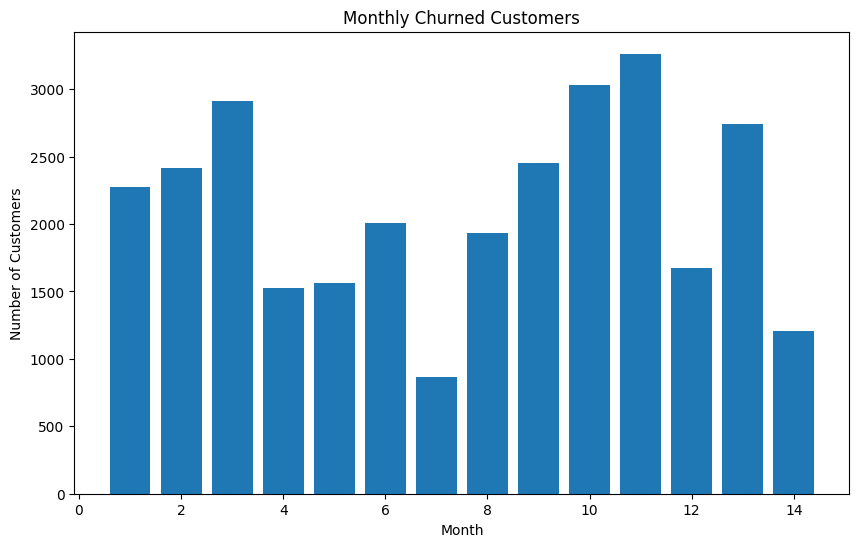

In [94]:
# Convert Month column to integer and filter Churn Value = 1
churn_monthly = df[df['Churn Value'] == 1]['Month'].astype(int).value_counts().sort_index()

# Plotting bar chart
plt.figure(figsize=(10,6))
plt.bar(churn_monthly.index, churn_monthly.values)
plt.title('Monthly Churned Customers')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.show()


**Observation**:

* The plot shows a gradual increase in the number of churned customers from month 7 to month 11.
*
Month 11 exhibits the highest number of churned customers, suggesting potential issues with the services provided during that period, prompting customers to leave the network. Further analysis is required to understand the underlying reasons behind this tren






### **Exploring `Offer` Feature**

In [95]:
# Counting the unique values in the Offer column
df['offer'].value_counts(dropna=False)


offer
NaN    494644
D       16162
C       16153
A       15915
J       15893
B       15871
I       15860
H       15855
E       15833
F       15789
G       15778
Name: count, dtype: int64

**Observation**:

The `offer` column contains a significant number of null values, indicating that many customers do not have any offer associated with their account.

**Hypotheses**:

* Null values in the `offer` column may indicate that customers are not eligible for any offers.
*
Alternatively, these null values could be a result of data recording errors or missed entries during offer distribution.
*
Further analysis can be conducted to explore if there are any discernible patterns in offer types based on customer demographics or behavior.






In [96]:
# Filling Nulls with 'No Offer'
df['offer'] = df['offer'].fillna('No Offer')


In [97]:
# Check the value counts again for churned customers
df[df['Churn Value'] == 1]['offer'].value_counts()


offer
No Offer    15292
D            1484
J            1483
H            1477
C            1470
I            1468
A            1464
F            1459
B            1441
E            1418
G            1409
Name: count, dtype: int64

**Observation**:

* The distribution of offers among churned customers suggests that the company may not have targeted specific customer segments with special offers.

* This implies that the company might prioritize providing equal benefits to all customers rather than targeting specific segments.

* Exploring the relationship between offers and customer demographics, such as age, gender, location, and usage patterns, could reveal valuable insights into customer preferences and behavior.

* Analyzing the impact of offers on customer churn could aid in optimizing future promotional campaigns and marketing strategies.


### **Exploring `Referred a Friend` and `Number of Referrals`**

In [98]:
# Count the values if a customer referred the company's services to a friend
df['Referred a Friend'].value_counts(dropna=False)


Referred a Friend
Yes    525449
No     128304
Name: count, dtype: int64

In [99]:
# Here are the number of referrals
df['Number of Referrals'].value_counts(dropna=False)


Number of Referrals
0.0     167747
1.0      60907
4.0      50033
11.0     48778
7.0      48707
8.0      48136
6.0      46975
3.0      44500
10.0     40923
5.0      36908
2.0      33749
9.0      26003
NaN        387
Name: count, dtype: int64

**Observation**:

* In the `Referred a Friend` column, there are 525449 instances where customers have referred the company's services to a friend, and 128304 instances where they haven't.

* Regarding the `Number of Referrals` column, the majority of customers (167747) haven't made any referrals, followed by 60907 customers who made one referral, and 50033 customers who made four referrals.

* There are 387 null values in the `Number of Referrals` column, which I can handle later.

* It will be insightful to analyze both columns together to understand the relationship between customers referring friends and the number of referrals made.

In [100]:
# Count the values of Referred a Friend and Number of Referrals
df[['Referred a Friend', 'Number of Referrals']].value_counts(dropna=False)


Referred a Friend  Number of Referrals
No                 0.0                    111753
Yes                0.0                     55994
                   1.0                     51002
                   4.0                     50033
                   11.0                    48778
                   7.0                     48707
                   8.0                     48136
                   6.0                     46975
                   3.0                     41996
                   10.0                    40923
                   5.0                     36908
                   2.0                     29607
                   9.0                     26003
No                 1.0                      9905
                   2.0                      4142
                   3.0                      2504
Yes                NaN                       387
Name: count, dtype: int64

**Observations**:

* The majority of customers have responded "no" to the question "Referred a Friend" and have not made any referrals.

* A small percentage of customers who responded "no" to the question "Referred a Friend" have still made referrals.

* Among the customers who responded "yes" to the question "Referred a Friend," there is a wide variation in the number of referrals made. Some customers have made only one or two referrals, while others have made 10-11 referrals.

* Further investigation into the small percentage of customers who made referrals despite answering "no" to the question "Referred a Friend" could involve analyzing the source of these referrals.

* To encourage more referrals and boost customer acquisition, the company might consider offering referral bonuses or other incentives to customers who successfully refer new customers.

* Analyzing the characteristics and behavior of customers more likely to make referrals could help improve the effectiveness of marketing campaigns.


### **Exploring `Phone Service` Feature**

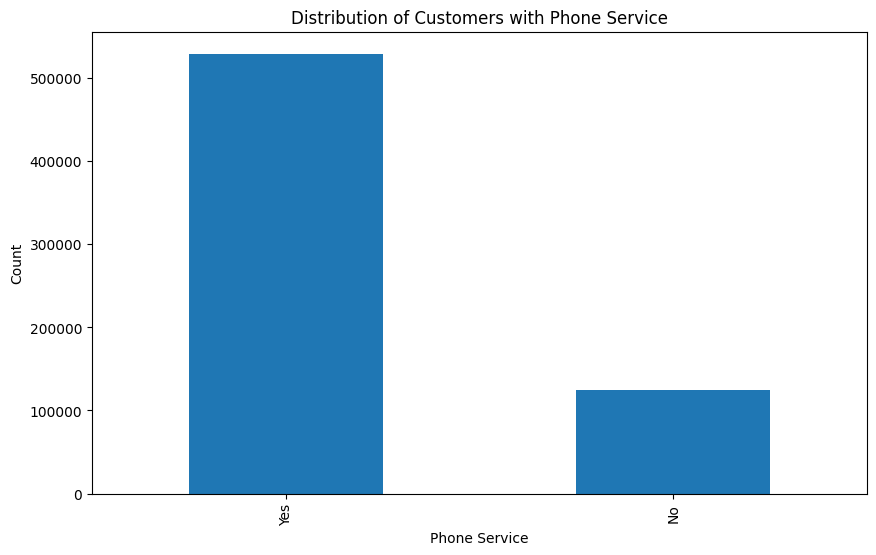

In [101]:
# Count the value of customers with and without phone service
plt.figure(figsize=(10,6))
df['Phone Service'].value_counts(dropna=False).plot.bar()
plt.title("Distribution of Customers with Phone Service")
plt.ylabel("Count")
plt.show()


**Observation**:

* The majority of customers, totaling over 500,000, have opted for Phone Service, indicating its widespread popularity among consumers. This underscores its significance as a core service provided by the company.

* Analyzing the demographics and usage behaviors of customers who have subscribed to Phone Service compared to those who haven't could provide valuable insights for the company to tailor its offerings more effectively.

* Understanding the preferences and requirements of different customer segments can assist the company in enhancing its service offerings and optimizing its marketing strategies to better meet customer needs.

### **Exploring `Internet Service` and `Internet Type`**

In [102]:
# Count the values of the customers with and without Internet Service
df['Internet Service'].value_counts(dropna=False)


Internet Service
Yes    398863
No     254890
Name: count, dtype: int64

**Observation**:

* The data shows that there are approximately 398,863 instances where customers have opted for internet service over the 14-month period.

* Conversely, there are approximately 254,890 instances where customers have not subscribed to internet service during this time frame.

* Analyzing this distribution can provide insights into the company's market penetration for internet services and help tailor marketing strategies to target potential customers who have not yet subscribed.

In [103]:
# Count the Internet Type values
df['Internet Type'].value_counts(dropna=False)


Internet Type
NaN            325250
Fiber Optic    134991
Cable          112100
DSL             81412
Name: count, dtype: int64

**Observation**:

* Among the available Internet types, including `Fiber Optic`, `Cable`, and `DSL`, there are also instances where the Internet type is not specified (NaN values).

* Fiber Optic and Cable are the most popular Internet types among customers, with a significant number of subscriptions.

* It's worth noting the inconsistency where some entries indicate "No" for Internet service but specify an Internet type, which doesn't align logically. This anomaly could be due to data entry errors or other factors requiring further investigation.

In [104]:
# Count the values of internet service and type together
df[['Internet Service','Internet Type']].value_counts(dropna=False)


Internet Service  Internet Type
No                NaN              236152
Yes               Fiber Optic      125590
                  Cable            108372
                  NaN               89098
                  DSL               75803
No                Fiber Optic        9401
                  DSL                5609
                  Cable              3728
Name: count, dtype: int64

**Observation**:

* Since these counts represent monthly data for each customer, they may not be unique values. Further analysis is needed to determine the actual internet service status for each customer during specific months.

* There are instances where customers have indicated "Yes" to having internet service, but their internet type is unspecified or labeled as "None."

* This discrepancy could imply various scenarios: the customer may not have utilized the internet during that month, data may be missing, or the customer may be using an unrecognized type of internet service.

* To address this, I can cross-reference with available usage data for each customer during the respective months. If usage data exists, I can infer internet service usage and impute the most common internet type for that customer. However, if no usage data is available, I may retain the "None" label. Further investigation is necessary to resolve these inconsistencies effectively.

### **Exploring `Multiple Lines` Feature**

In [105]:
# Count the values of the Multiple lines column
df['Multiple Lines'].value_counts(dropna=False)


Multiple Lines
No     322824
Yes    284849
NaN     46080
Name: count, dtype: int64

**Observation**:

* The analysis of the 'Multiple Lines' column reveals that a significant portion of customers, totaling 322,824, opt for a single line, while 284,849 customers choose multiple lines. Additionally, there are 46,080 instances where this information is missing.

### **Exploring `Unlimited Data` Feature**

In [106]:
# Count the values of the Unlimited Data column
df['Unlimited Data'].value_counts(dropna=False)


Unlimited Data
Yes    352341
No     290309
NaN     11103
Name: count, dtype: int64

**Observation**:

* The majority of customers, over the 14-month period, have subscribed to the Unlimited Data plan.

### **Exploring `Streaming Movies` Feature**

In [107]:
# Count the values of the streaming movies column
df['Streaming Movies'].value_counts(dropna=False)


Streaming Movies
No     334570
Yes    319183
Name: count, dtype: int64

**Observation**:

* The distribution of customers who opt for streaming movies versus those who do not is relatively consistent across the 14-month period.





### **Exploring `Streaming TV` Feature**

In [108]:
# Count the values of the streaming TV column
df['Streaming TV'].value_counts(dropna=False)


Streaming TV
No     331747
Yes    322006
Name: count, dtype: int64

**Observation**:

* The distribution of values for the `Streaming TV` column is almost balanced, with a similar number of customers subscribing and not subscribing to Streaming TV services over the 14-month period.


### **Exploring `Streaming Music` Feature**

In [109]:
# Count the values of the streaming movies column
df['Streaming Music'].value_counts(dropna=False)


Streaming Music
No     357691
Yes    296062
Name: count, dtype: int64

**Observation**:

* The majority of customers did not subscribe to a music streaming service over the 14-month period.

### **Exploring `Streaming Data Consumption` Feature**

In [110]:
# Check statistics
df['Streaming Data Consumption'].describe()


count    653753.000000
mean         27.574284
std          26.349552
min           0.000000
25%           2.000000
50%          20.000000
75%          49.000000
max          85.000000
Name: Streaming Data Consumption, dtype: float64

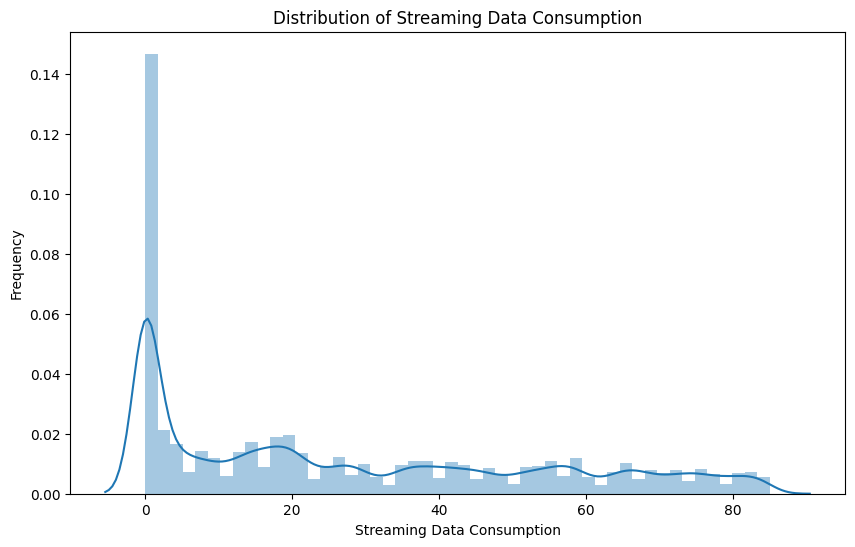

In [111]:
# Plot
plt.figure(figsize=(10,6))
sns.distplot(df['Streaming Data Consumption'])
plt.xlabel('Streaming Data Consumption')
plt.ylabel('Frequency')
plt.title('Distribution of Streaming Data Consumption')
plt.show()


In [112]:
# check null values
df['Streaming Data Consumption'].isna().sum()


0

**Observation**:

* I notice that the minimum value is 0 GB, indicating that I didn't consume any streaming data during the month, while the maximum value is 85 GB.

* Looking at the highly right-skewed distribution of streaming consumption data, I see that a small proportion of customers are consuming a disproportionately large amount of streaming data.

* From my business perspective, I could use this information to tailor marketing and pricing strategies to target heavy streaming users like myself, offering them plans that meet their needs.

* I think it would be beneficial to further explore how my streaming data consumption relates to other factors like "Streaming Movies" or "Streaming TV" to gain additional insights into my behavior and preferences, especially concerning churn value and satisfaction score.

* I'm pleased to see that there are no null values in the column.

### **Exploring `Online Security` Feature**

In [113]:
# Check the counts of Online Security column
df['Online Security'].value_counts(dropna=False)


Online Security
No     564647
Yes     89106
Name: count, dtype: int64

**Observation**:

* The majority of customers did not have online security throughout the months.

### **Exploring `Online Backup` Feature**

In [114]:
# Check the counts of Online Backup Column
df['Online Backup'].value_counts(dropna = False)


Online Backup
No     437242
Yes    216511
Name: count, dtype: int64

**Observation**:

* The majority of customers did not have Online Backup throughout the months.

### **Exploring `Device Protection Plan` Feature**

In [115]:
# Count the number of unique values in the column
df['Device Protection Plan'].value_counts(dropna=False)


Device Protection Plan
No     327748
Yes    326005
Name: count, dtype: int64

**Observation**:

* The distribution remains consistent across the months.

### **Exploring `Premium Tech Support`**

In [116]:
# Count the unique values of Premium Tech Support
df['Premium Tech Support'].value_counts(dropna=False)


Premium Tech Support
No     485906
Yes    167847
Name: count, dtype: int64

**Observation**:

* The majority of customers, totaling 485,906, did not have Premium Tech Support throughout the observed months.

### **Exploring `Payment Method`**

In [117]:
# Count the unique values of payment method
df['Payment Method'].value_counts(dropna=False)


Payment Method
Bank Withdrawal    374219
Credit Card        231050
Wallet Balance      48484
Name: count, dtype: int64

**Observation**:

* I see that customers prefer using bank withdrawal as my payment method.
*
There's quite a gap between the number of customers using bank withdrawal compared to credit card or wallet balance





### **Exploring `Status ID`**

In [118]:
# Total number of null values in the "Status ID" column
df['Status ID'].isna().sum()


0

In [119]:
# Number of Unique Status IDs in the dataset
df['Status ID'].nunique()


653753

**Each payment made by a consumer has a unique status Id.**

### **Exploring Customer `Satisfaction Score`**

In [120]:
# Count the values of each satisfaction score
df['Satisfaction Score'].value_counts(dropna=False)


Satisfaction Score
3    258752
4    133473
5    106567
1    105539
2     49422
Name: count, dtype: int64

**Observations**:

* The majority of customers, totaling 258,752, have rated their satisfaction with a score of 3, indicating a moderate level of satisfaction.

* Following that, 133,473 customers rated their satisfaction with a score of 4, while 106,567 customers gave a score of 5, representing higher levels of satisfaction.

* A significant number of customers, 105,539, provided a low satisfaction score of 1, indicating dissatisfaction with the service.

* Additionally, 49,422 customers rated their satisfaction with a score of 2, further highlighting areas where improvements may be needed.

* The satisfaction score distribution serves as a crucial indicator for gauging customer sentiment and guiding strategic initiatives for enhancing customer experience and satisfaction.


### **Exploring `Churn Category`**

In [121]:
# Count the values of different churn categories
df['Churn Category'].value_counts(dropna=False)


Churn Category
NaN                624017
Support              7538
Dissatisfaction      6001
Competitor           5974
Price                4381
Other                4356
bcvjhdjcb            1190
Attitude              296
Name: count, dtype: int64

**Observations:**

* The `Churn Category` column shows a substantial number of missing values, primarily represented by NaN.
*
It's crucial to investigate the nature of these missing values and understand whether they represent actual absences of churn categories or if they indicate data recording issues





In [122]:
# Display churn value counts for observations where churn category is null
df[df['Churn Category'].isna()]['Churn Value'].value_counts(dropna=False)


Churn Value
0    622748
1      1269
Name: count, dtype: int64

**Hence, for observations where the churn category is null, the majority of customers have not churned (Churn Value = 0). I can consider these cases as not applicable, while the remaining cases where churn value is 1 can be marked as unknown.**

In [123]:
# Filling null values of churn category as not applicable where customers did not churn
df.loc[(df['Churn Category'].isna())&(df['Churn Value']==0),'Churn Category']='Not Applicable'


In [124]:
# Filling the churn category as Unknown where churn value was 1
df.loc[(df['Churn Category'].isna())&(df['Churn Value']==1),'Churn Category']='Unknown'


In [125]:
# Check the counts again
df['Churn Category'].value_counts(dropna=False)


Churn Category
Not Applicable     622748
Support              7538
Dissatisfaction      6001
Competitor           5974
Price                4381
Other                4356
Unknown              1269
bcvjhdjcb            1190
Attitude              296
Name: count, dtype: int64

### **Exploring `Churn Reason`**

In [126]:
# Count the values of different churn reasons
df['Churn Reason'].value_counts(dropna=False)


Churn Reason
NaN                                          623986
43tgeh                                         1796
Service dissatisfaction                        1555
Lack of self-service on Website                1547
Attitude of support person                     1535
Moved                                          1482
Competitor offered more data                   1481
Competitor had better devices                  1458
Poor expertise of online support               1445
Product dissatisfaction                        1417
Attitude of service provider                   1410
Long distance charges                          1389
Lack of affordable download/upload speed       1381
Competitor made better offer                   1358
Price too high                                 1358
Competitor offered higher download speeds      1352
Poor expertise of phone support                1330
Network reliability                            1311
Extra data charges                             1310

**Observations:**

* The `Churn Reason` column contains various reasons why customers churned, with some reasons being more prevalent than others.

* There are a considerable number of missing values in the `Churn Reason` column, which I need to explore further.

In [127]:
# Count of null churn reasons and their churn value
df[(df['Churn Reason'].isna())]['Churn Value'].value_counts(dropna=False)


Churn Value
0    622169
1      1817
Name: count, dtype: int64

**Understood. If a customer is not churned, it can be marked as "Not Applicable," and for other cases, it can be marked as "Unknown."**

In [128]:
# Fill the churn reason as "Not Applicable" where churn value is 0
df.loc[(df['Churn Reason'].isna()) & (df['Churn Value'] == 0), 'Churn Reason'] = 'Not Applicable'


In [129]:
# Fill the churn reason as "Unknown" where churn value is 1
df.loc[(df['Churn Reason'].isna()) & (df['Churn Value'] == 1), 'Churn Reason'] = 'Unknown'


In [130]:
# Check the value counts in the Churn Reason again
df['Churn Reason'].value_counts(dropna=False)


Churn Reason
Not Applicable                               622169
Unknown                                        1817
43tgeh                                         1796
Service dissatisfaction                        1555
Lack of self-service on Website                1547
Attitude of support person                     1535
Moved                                          1482
Competitor offered more data                   1481
Competitor had better devices                  1458
Poor expertise of online support               1445
Product dissatisfaction                        1417
Attitude of service provider                   1410
Long distance charges                          1389
Lack of affordable download/upload speed       1381
Competitor made better offer                   1358
Price too high                                 1358
Competitor offered higher download speeds      1352
Poor expertise of phone support                1330
Network reliability                            1311

### **Exploring `Customer Status`**

In [131]:
# Check the unique values
df['Customer Status'].unique()


array(['Churned', 'Stayed'], dtype=object)

In [132]:
# Check customer status and churn values together
df[['Customer Status','Churn Value']].value_counts(dropna=False)


Customer Status  Churn Value
Stayed           0              623888
Churned          1               29865
Name: count, dtype: int64

**Everything seems good here!**

### **Customer Call Usage Analysis**

In [133]:
# Displaying all columns
df.columns


Index(['Customer ID', 'Month of Joining', 'Month', 'zip_code', 'Gender', 'Age',
       'Married', 'Dependents', 'Number of Dependents', 'Location ID',
       'Service ID', 'state', 'county', 'timezone', 'area_codes', 'country',
       'latitude', 'longitude', 'arpu', 'roam_ic', 'roam_og', 'loc_og_t2t',
       'loc_og_t2m', 'loc_og_t2f', 'loc_og_t2c', 'std_og_t2t', 'std_og_t2m',
       'std_og_t2f', 'std_og_t2c', 'isd_og', 'spl_og', 'og_others',
       'loc_ic_t2t', 'loc_ic_t2m', 'loc_ic_t2f', 'std_ic_t2t', 'std_ic_t2m',
       'std_ic_t2f', 'std_ic_t2o', 'spl_ic', 'isd_ic', 'ic_others',
       'total_rech_amt', 'total_rech_data', 'vol_4g', 'vol_5g', 'arpu_5g',
       'arpu_4g', 'night_pck_user', 'fb_user', 'aug_vbc_5g', 'Churn Value',
       'Referred a Friend', 'Number of Referrals', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Streaming Data Consumption', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Suppo

In [134]:
# Setting customer id and month as index
df = df.set_index(['Customer ID','Month'])


In [135]:
# Selecting specific columns to check the customer call usage
df_call_usage = df[['Month of Joining', 'roam_ic', 'roam_og', 'loc_og_t2t',
       'loc_og_t2m', 'loc_og_t2f', 'loc_og_t2c', 'std_og_t2t', 'std_og_t2m',
       'std_og_t2f', 'std_og_t2c', 'isd_og', 'spl_og', 'og_others',
       'loc_ic_t2t', 'loc_ic_t2m', 'loc_ic_t2f', 'std_ic_t2t', 'std_ic_t2m',
       'std_ic_t2f', 'std_ic_t2o', 'spl_ic', 'isd_ic', 'ic_others',
       'total_rech_amt', 'Phone Service']]


In [136]:
# Top three rows
df_call_usage.head(3)


Month of Joining  roam_ic  roam_og  loc_og_t2t   
Customer ID    Month                                                   
hthjctifkiudi0 1                     1    18.88    78.59      280.32  \
uqdtniwvxqzeu1 6                     6    69.46    72.08      255.73   
               7                     6  1012.60   115.26       52.95   

                      loc_og_t2m  loc_og_t2f  loc_og_t2c  std_og_t2t   
Customer ID    Month                                                   
hthjctifkiudi0 1           30.97        5.71        1.79       25.71  \
uqdtniwvxqzeu1 6          148.80       30.00        7.61      308.29   
               7             NaN      103.28       15.71      244.20   

                      std_og_t2m  std_og_t2f  std_og_t2c  isd_og  spl_og   
Customer ID    Month                                                       
hthjctifkiudi0 1          175.56        0.47         0.0    5.11    0.65  \
uqdtniwvxqzeu1 6          265.20       10.82         0.0    1.23  905.51   
               7           15.19         NaN         NaN   13.14  455.15   

                      og_others  loc_ic_t2t  loc_ic_t2m  loc_ic_t2f   
Customer ID    Month                                                  
hthjctifkiudi0 1          13.99      121.51      168.40       67.61  \
uqdtniwvxqzeu1 6           1.69      212.93      155.19       29.04   
               7         115.63      121.80      699.39       44.49   

                      std_ic_t2t  std_ic_t2m  std_ic_t2f  std_ic_t2o  spl_ic   
Customer ID    Month                                                           
hthjctifkiudi0 1          115.69       52.22       18.71         0.0    0.26  \
uqdtniwvxqzeu1 6            9.15       38.89        0.84         0.0    0.05   
               7           83.59      914.70       13.25         0.0    0.06   

                      isd_ic  ic_others total_rech_amt Phone Service  
Customer ID    Month                                                  
hthjctifkiudi0 1       11.53      46.42             18           Yes  
uqdtniwvxqzeu1 6       32.51      25.53           1183           Yes  
               7       13.05       5.62            295           Yes

In [137]:
# There are a lot of null values
df_call_usage.describe()


,Month of Joining,roam_ic,roam_og,loc_og_t2t,loc_og_t2m,loc_og_t2f,loc_og_t2c,std_og_t2t,std_og_t2m,std_og_t2f,std_og_t2c,isd_og,spl_og,og_others,loc_ic_t2t,loc_ic_t2m,loc_ic_t2f,std_ic_t2t,std_ic_t2m,std_ic_t2f,std_ic_t2o,spl_ic,isd_ic,ic_others
count,653753.000000,6.249240e+05,6.334710e+05,6.260620e+05,6.257440e+05,5.864870e+05,6.305460e+05,6.165360e+05,6.077260e+05,6.263330e+05,5.427680e+05,6.122130e+05,5.596970e+05,6.322620e+05,618673.000000,626915.000000,629922.000000,596420.000000,627547.000000,635174.000000,570165.0,620476.000000,570988.000000,613198.000000
mean,5.823574,3.695572e+04,3.629550e+04,3.545171e+04,3.659867e+04,3.730951e+04,3.423369e+04,3.562221e+04,3.644849e+04,3.465084e+04,4.203332e+04,3.542208e+04,3.930345e+04,3.584864e+04,791.399134,672.287159,315.452390,314.727407,290.950402,120.796443,0.0,0.233584,170.837105,127.687898
std,2.855148,5.633568e+05,5.579342e+05,5.472752e+05,5.573928e+05,5.673674e+05,5.435927e+05,5.510383e+05,5.588584e+05,5.468664e+05,6.024441e+05,5.526578e+05,5.822548e+05,5.557578e+05,1212.105552,994.667177,483.716646,611.683476,438.097905,185.391565,0.0,0.438172,384.665897,289.060700
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,3.000000,1.249000e+01,1.989000e+01,4.239000e+01,3.428000e+01,1.540000e+00,2.110000e+00,4.159000e+01,3.027000e+01,1.570000e+00,0.000000e+00,3.980000e+00,4.320000e+00,4.590000e+00,80.970000,80.750000,34.890000,38.750000,30.900000,12.090000,0.0,0.040000,23.640000,19.100000
50%,6.000000,4.929000e+01,7.475000e+01,1.670200e+02,1.319800e+02,7.230000e+00,8.440000e+00,1.662000e+02,1.251500e+02,6.490000e+00,0.000000e+00,1.704000e+01,2.203000e+01,1.857000e+01,162.470000,161.520000,69.495000,77.290000,62.110000,24.260000,0.0,0.080000,47.030000,38.070000
75%,8.000000,1.118400e+02,1.336800e+02,2.993900e+02,4.701500e+02,1.290000e+01,1.478000e+01,2.999400e+02,2.272800e+02,3.525000e+01,0.000000e+00,3.014000e+01,3.981000e+01,9.343000e+01,1039.430000,866.780000,408.410000,115.550000,380.180000,165.410000,0.0,0.140000,70.610000,57.190000
max,12.000000,8.787978e+06,8.787978e+06,8.787978e+06,8.787978e+06,8.787978e+06,8.787978e+06,8.787978e+06,8.787978e+06,8.787978e+06,8.787978e+06,8.787978e+06,8.787978e+06,8.787978e+06,4363.950000,3783.530000,1872.340000,2527.070000,1619.680000,663.930000,0.0,2.330000,1624.530000,1344.130000


**Observations**:

* Several columns, including `roam_ic`, `roam_og`, `loc_og_t2t`, `loc_og_t2m`, `loc_og_t2f`, `loc_og_t2c`, `std_og_t2t`, `std_og_t2m`, `std_og_t2f`, `std_og_t2c`, `isd_og`, `spl_og`, and `og_others`, have exceptionally high maximum values (8.787978e+06), which may indicate outliers or data entry errors.

* Some columns appear to have missing values.

* Notably, the columns `total_rech_amt` and `Phone Service` are not included in this table.

In [138]:
# Check the number of null values where calling plan is available
df_call_usage[df_call_usage['Phone Service'] == 'Yes'].isna().sum()


Month of Joining         0
roam_ic              28829
roam_og              20282
loc_og_t2t           27691
loc_og_t2m           28009
loc_og_t2f           67266
loc_og_t2c           23207
std_og_t2t           37217
std_og_t2m           46027
std_og_t2f           27420
std_og_t2c          110985
isd_og               41540
spl_og               94056
og_others            21491
loc_ic_t2t           28366
loc_ic_t2m           21701
loc_ic_t2f           19300
std_ic_t2t           46343
std_ic_t2m           21173
std_ic_t2f           14969
std_ic_t2o           67623
spl_ic               26873
isd_ic               66986
ic_others            32766
total_rech_amt           0
Phone Service            0
dtype: int64

In [139]:
# Check the percentage of missing values where calling plan is available
df_call_usage[df_call_usage['Phone Service'] == 'Yes'].isna().sum() / df_call_usage.shape[0]


Month of Joining    0.000000
roam_ic             0.044098
roam_og             0.031024
loc_og_t2t          0.042357
loc_og_t2m          0.042843
loc_og_t2f          0.102892
loc_og_t2c          0.035498
std_og_t2t          0.056928
std_og_t2m          0.070404
std_og_t2f          0.041942
std_og_t2c          0.169766
isd_og              0.063541
spl_og              0.143871
og_others           0.032873
loc_ic_t2t          0.043389
loc_ic_t2m          0.033194
loc_ic_t2f          0.029522
std_ic_t2t          0.070888
std_ic_t2m          0.032387
std_ic_t2f          0.022897
std_ic_t2o          0.103438
spl_ic              0.041106
isd_ic              0.102464
ic_others           0.050120
total_rech_amt      0.000000
Phone Service       0.000000
dtype: float64

In [140]:
# Check the number of null values where calling plan is not available
df_call_usage[df_call_usage['Phone Service'] == 'No'].isna().sum()


Month of Joining        0
roam_ic                 0
roam_og                 0
loc_og_t2t              0
loc_og_t2m              0
loc_og_t2f              0
loc_og_t2c              0
std_og_t2t              0
std_og_t2m              0
std_og_t2f              0
std_og_t2c              0
isd_og                  0
spl_og                  0
og_others               0
loc_ic_t2t           6714
loc_ic_t2m           5137
loc_ic_t2f           4531
std_ic_t2t          10990
std_ic_t2m           5033
std_ic_t2f           3610
std_ic_t2o          15965
spl_ic               6404
isd_ic              15779
ic_others            7789
total_rech_amt          0
Phone Service           0
dtype: int64

In [141]:
# Lets check how many % values are missing
df_call_usage[df_call_usage['Phone Service']=='No'].isna().sum()/df_call_usage.shape[0]


Month of Joining    0.000000
roam_ic             0.000000
roam_og             0.000000
loc_og_t2t          0.000000
loc_og_t2m          0.000000
loc_og_t2f          0.000000
loc_og_t2c          0.000000
std_og_t2t          0.000000
std_og_t2m          0.000000
std_og_t2f          0.000000
std_og_t2c          0.000000
isd_og              0.000000
spl_og              0.000000
og_others           0.000000
loc_ic_t2t          0.010270
loc_ic_t2m          0.007858
loc_ic_t2f          0.006931
std_ic_t2t          0.016811
std_ic_t2m          0.007699
std_ic_t2f          0.005522
std_ic_t2o          0.024421
spl_ic              0.009796
isd_ic              0.024136
ic_others           0.011914
total_rech_amt      0.000000
Phone Service       0.000000
dtype: float64

**I will impute all these values later!**

In [142]:
# Check the data types of all the columns
df_call_usage.dtypes


Month of Joining      int64
roam_ic             float64
roam_og             float64
loc_og_t2t          float64
loc_og_t2m          float64
loc_og_t2f          float64
loc_og_t2c          float64
std_og_t2t          float64
std_og_t2m          float64
std_og_t2f          float64
std_og_t2c          float64
isd_og              float64
spl_og              float64
og_others           float64
loc_ic_t2t          float64
loc_ic_t2m          float64
loc_ic_t2f          float64
std_ic_t2t          float64
std_ic_t2m          float64
std_ic_t2f          float64
std_ic_t2o          float64
spl_ic              float64
isd_ic              float64
ic_others           float64
total_rech_amt       object
Phone Service        object
dtype: object

**Observation:**

It appears that the `total_rech_amt` column is currently classified as an object data type, but according to the data dictionary, it should be of type float. This discrepancy needs to be addressed to ensure the accurate representation of numerical values in the dataset.

In [143]:
# Count the number of rows containing no calling plan
df_call_usage['Phone Service'].value_counts()[0]


529183

In [144]:
# Counts of unique values in total rech amount
df_call_usage['total_rech_amt'].value_counts()


total_rech_amt
0        106254
989        7432
98769      6245
e01        2507
0.1        2485
          ...  
8047          1
4616          1
7822          1
7747          1
8120          1
Name: count, Length: 11899, dtype: int64

In [145]:
# Replace the invalid value
df_call_usage.loc[df['total_rech_amt'] == 'e01','total_rech_amt'] = 10


**I will now change the column to a numeric datatype.**

In [146]:
# Changing the column back to numeric data type
df_call_usage['total_rech_amt'] = pd.to_numeric(df_call_usage['total_rech_amt'], errors='coerce')


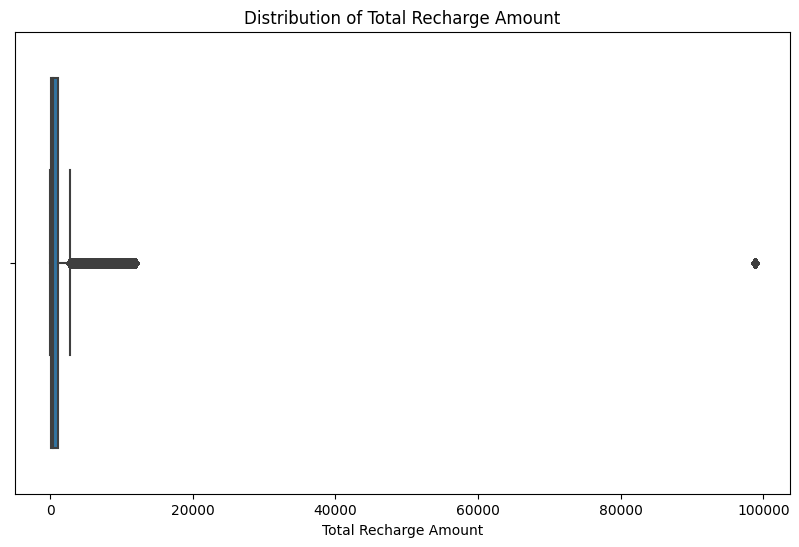

In [147]:
# Plotting the distribution using a box plot
plt.figure(figsize=(10,6))
sns.boxplot(x=df_call_usage['total_rech_amt'])
plt.title("Distribution of Total Recharge Amount")
plt.xlabel("Total Recharge Amount")
plt.show()


**It's notable that there are some customers with a total recharge amount around 100,000. Let's determine the count of such customers.**

In [148]:
# Check the quantiles
df_call_usage['total_rech_amt'].quantile([0.1, 0.5, 0.75, 0.9, 0.97, 0.99, 0.999])


0.100        0.0
0.500      400.0
0.750     1158.0
0.900     7377.0
0.970    10939.0
0.990    11875.0
0.999    98769.0
Name: total_rech_amt, dtype: float64

**For the 0.990 percentile, the total recharge amount exceeds 11875. I'll investigate how many customers have a recharge amount greater than this threshold.**

In [149]:
# Filter the dataframe
df_call_usage[df_call_usage['total_rech_amt'] > 11875.0]


,,Month of Joining,roam_ic,roam_og,loc_og_t2t,loc_og_t2m,loc_og_t2f,loc_og_t2c,std_og_t2t,std_og_t2m,std_og_t2f,std_og_t2c,isd_og,spl_og,og_others,loc_ic_t2t,loc_ic_t2m,loc_ic_t2f,std_ic_t2t,std_ic_t2m,std_ic_t2f,std_ic_t2o,spl_ic,isd_ic,ic_others,total_rech_amt,Phone Service
Customer ID,Month,,,,,,,,,,,,,,,,,,,,,,,,,,
lkbosigyuaztq12,10,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46254.0,0.0,0.0,0.0,0.0,192.19,120.79,68.37,57.01,22.29,28.05,0.0,0.10,56.95,1.77,98769.0,No
nfhyvxuubmklt23,7,6,68.0,0.0,0.0,68.0,45.0,0.0,0.0,0.0,46254.0,0.0,0.0,0.0,45.0,1166.10,43.26,64.48,107.55,72.08,25.65,0.0,0.05,73.34,32.82,98769.0,No
kzxgwhhdwzqop26,8,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,204.77,164.94,40.57,20.74,56.17,28.37,0.0,0.11,73.75,19.31,98769.0,No
mzhzpzzpqoqab40,6,6,0.0,0.0,0.0,0.0,0.0,68.0,8787978.0,0.0,0.0,0.0,0.0,0.0,0.0,2060.25,33.00,28.18,36.61,21.09,32.55,0.0,0.11,48.86,14.85,98769.0,No
hlknupiesduin44,14,5,8787978.0,0.0,0.0,46254.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46254.0,0.0,127.40,36.26,44.32,102.66,46.65,15.00,0.0,0.01,51.17,66.28,98769.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zgcwbliyezhkm162866,12,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46254.0,0.0,0.0,68.0,0.0,68.0,80.51,101.25,85.81,90.85,51.33,25.42,0.0,0.04,46.84,18.81,98769.0,No
ajdfxlgnictni162880,8,6,0.0,0.0,0.0,0.0,45.0,0.0,46254.0,0.0,0.0,0.0,0.0,0.0,0.0,2693.88,593.01,197.94,NaN,398.90,17.14,NaN,0.63,NaN,1280.61,98769.0,No
atxwtntayutuh162961,6,2,8787978.0,0.0,0.0,0.0,0.0,8787978.0,0.0,0.0,0.0,0.0,0.0,45.0,0.0,1201.62,3009.67,1554.65,2419.37,362.27,214.50,NaN,0.46,1109.17,670.71,98769.0,No


**I notice that the majority of these values are present when phone service is not selected; let's see if all of the values follow the same pattern or not.**

In [150]:
# Check the value counts where phone service is no
df_call_usage[df_call_usage['Phone Service'] == 'No']['total_rech_amt'].value_counts()


total_rech_amt
0.0        105992
989.0        7341
98769.0      6245
10.0         2507
0.1          2485
Name: count, dtype: int64

**Observations**:

* The values 98769 and 0.1 in the distribution appear to be outliers or random entries that warrant further investigation.

* It is advisable to replace the value 98769 with 0 as it appears to be an erroneous data entry.

* The value 0.1 may also be an incorrect data entry or an outlier, necessitating further examination.

* It is plausible that the values 989 and 10 in the distribution represent actual recharge amounts.

* There's a possibility that for these values, customers have opted for Phone Service but there might have been a data entry mistake. Further investigation is required to validate this assumption.

In [151]:
# Filter the customers who have phone service and outlier values as well
df_call_usage[(df_call_usage['Phone Service'] == 'Yes') & (df_call_usage['total_rech_amt'].isin([0.1, 98769]))]


,,Month of Joining,roam_ic,roam_og,loc_og_t2t,loc_og_t2m,loc_og_t2f,loc_og_t2c,std_og_t2t,std_og_t2m,std_og_t2f,std_og_t2c,isd_og,spl_og,og_others,loc_ic_t2t,loc_ic_t2m,loc_ic_t2f,std_ic_t2t,std_ic_t2m,std_ic_t2f,std_ic_t2o,spl_ic,isd_ic,ic_others,total_rech_amt,Phone Service
Customer ID,Month,,,,,,,,,,,,,,,,,,,,,,,,,,


**I didn't find any customers who recharged with 0.1 or 98769 and chose phone service.  Now, I'll replace those values with 0**.


In [152]:
# I replaced the values 0.1 and 98769 with 0 in the 'total_rech_amt' column.
df_call_usage['total_rech_amt'] = df_call_usage['total_rech_amt'].replace([0.1, 98769], 0)


In [153]:
# I will check the counts again for 'total_rech_amt' where 'Phone Service' is 'No'.
df_call_usage[df_call_usage['Phone Service'] == 'No']['total_rech_amt'].value_counts()


total_rech_amt
0.0      114722
989.0      7341
10.0       2507
Name: count, dtype: int64

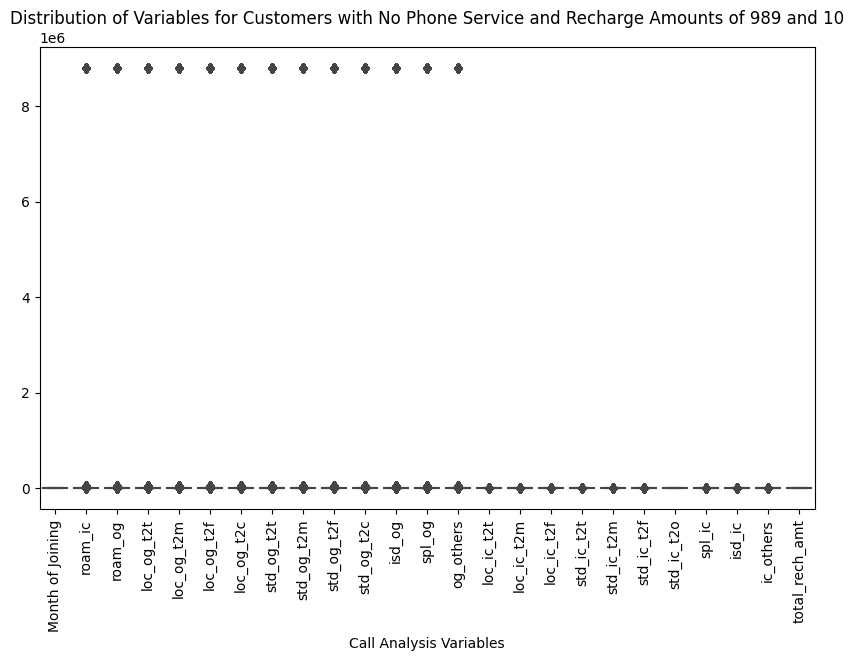

In [154]:
# Plot a boxplot for customers with no phone service and total recharge amounts of 989 and 10
plt.figure(figsize=(10,6))
sns.boxplot(data=df_call_usage[(df_call_usage['Phone Service']=='No')&(df_call_usage['total_rech_amt'].isin([989,10]))])
plt.title("Distribution of Variables for Customers with No Phone Service and Recharge Amounts of 989 and 10")
plt.xlabel("Call Analysis Variables")
plt.xticks(rotation=90)
plt.show()


**Observations:**

* Most of the columns appear to have values clustered around 0, with a few outliers reaching up to 8^E6.

* This distribution suggests that the majority of customers with no phone service and specific recharge amounts have minimal utilization of outgoing calls, while a small number exhibit significantly higher usage.

* Further analysis is needed to understand the nature of these outliers and their impact on the overall distribution of call analysis variables.


In [155]:
# Define the outgoing call columns
outgoing_call_col = [
    'roam_og', 'loc_og_t2t', 'loc_og_t2m', 'loc_og_t2f',
    'loc_og_t2c', 'std_og_t2t', 'std_og_t2m', 'std_og_t2f',
    'std_og_t2c', 'isd_og', 'spl_og', 'og_others'
]


In [156]:
# Extract unique values for outgoing call columns for customers with no phone service and high recharge amount
df_call_usage[(df_call_usage['Phone Service']=='No')&(df_call_usage['total_rech_amt'].isin([989,10]))][outgoing_call_col].apply(lambda col: col.unique())


,roam_og,loc_og_t2t,loc_og_t2m,loc_og_t2f,loc_og_t2c,std_og_t2t,std_og_t2m,std_og_t2f,std_og_t2c,isd_og,spl_og,og_others
0,0.0,0.0,45.0,0.0,0.0,0.0,0.0,0.0,45.0,0.0,0.0,0.0
1,45.0,46254.0,0.0,46254.0,45.0,46254.0,45.0,46254.0,0.0,45.0,45.0,45.0
2,46254.0,45.0,68.0,45.0,68.0,68.0,46254.0,68.0,46254.0,46254.0,46254.0,46254.0
3,8787978.0,8787978.0,8787978.0,8787978.0,8787978.0,45.0,68.0,45.0,8787978.0,68.0,8787978.0,8787978.0
4,68.0,68.0,46254.0,68.0,46254.0,8787978.0,8787978.0,8787978.0,68.0,8787978.0,68.0,68.0


**Observations**:

* The data shows limited options for the values in columns such as `roam_og`, `loc_og_t2t`, `loc_og_t2m`, `loc_og_t2f`, `loc_og_t2c`, `std_og_t2t`, `std_og_t2m`, `std_og_t2f`, `std_og_t2c`, `isd_og`, `spl_og`, and `og_others`, including 0, 45, 46254, 8787978, and 68.

* These values seem to correspond to different usage patterns but appear to be unlikely to represent actual data due to their unusual nature.

* While in a real-world scenario, further investigation would be necessary to determine the cause of these values, for the purposes of this analysis, it's reasonable to consider them as errors in data entry.

* As a result, it's advisable to replace all corresponding recharge amounts with 0 for the sake of accuracy in analysis.

**Before replacing the values, I'll check if these recharge amounts are also present when Phone Service is selected.**

In [157]:
# Filter the values where Phone Service is 'Yes' and recharge amount is either 10 or 989
df_call_usage[(df_call_usage['Phone Service'] == 'Yes') & (df_call_usage['total_rech_amt'].isin([10, 989]))]


,,Month of Joining,roam_ic,roam_og,loc_og_t2t,loc_og_t2m,loc_og_t2f,loc_og_t2c,std_og_t2t,std_og_t2m,std_og_t2f,std_og_t2c,isd_og,spl_og,og_others,loc_ic_t2t,loc_ic_t2m,loc_ic_t2f,std_ic_t2t,std_ic_t2m,std_ic_t2f,std_ic_t2o,spl_ic,isd_ic,ic_others,total_rech_amt,Phone Service
Customer ID,Month,,,,,,,,,,,,,,,,,,,,,,,,,,
mvawicevzubbt203,14,9,63.95,131.92,100.35,1355.92,8.15,13.50,29.54,47.00,184.62,0.0,204.02,49.15,14.94,210.85,213.56,84.03,24.99,52.41,6.85,0.0,0.06,62.32,62.71,10.0,Yes
jqlowmgrrbnsf859,7,3,431.10,34.91,144.73,3167.87,0.72,325.41,312.90,1082.27,132.53,0.0,10.80,17.51,15.77,1206.69,1360.59,1263.17,89.62,120.54,470.70,0.0,0.11,27.28,61.76,10.0,Yes
antivlmeqegyi1478,2,1,1585.09,65.91,60.84,270.26,10.16,16.62,228.12,149.87,6.51,0.0,34.19,37.61,13.05,77.09,234.24,36.31,52.21,71.87,2.57,0.0,0.10,31.09,37.37,989.0,Yes
prbkyrzfijozx1616,8,6,1071.48,61.74,NaN,3512.23,NaN,12.76,211.10,171.00,177.56,NaN,34.40,NaN,NaN,116.68,258.67,21.65,NaN,14.84,19.52,0.0,0.20,NaN,2.39,10.0,Yes
nhefrsuouiapc1633,11,6,2.71,3.69,234.75,71.46,2.26,0.30,252.63,94.80,4.57,0.0,21.35,30.77,25.27,195.37,302.69,1103.31,10.42,34.85,26.11,0.0,0.10,37.44,11.20,10.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fnatcpehazawh161796,9,9,80.14,156.87,293.52,412.47,12.84,16.61,233.59,138.33,7.28,0.0,22.02,49.50,8.41,168.15,167.59,49.46,101.87,1.32,19.36,0.0,0.05,73.82,51.04,989.0,Yes
zcojuhfysudap162360,14,5,44.33,16.68,44.36,4144.96,12.21,10.81,60.61,47.62,NaN,0.0,19.08,12.72,16.53,10.18,105.64,32.76,8.51,71.67,23.38,0.0,0.05,57.09,7.96,10.0,Yes
mbpogbzlhgsal162572,13,10,159.38,16.79,51.13,76.03,3.89,4.66,127.76,256.89,2.36,0.0,36.19,8.37,28.19,NaN,97.75,72.04,25.90,50.66,23.97,0.0,0.06,74.72,27.21,10.0,Yes


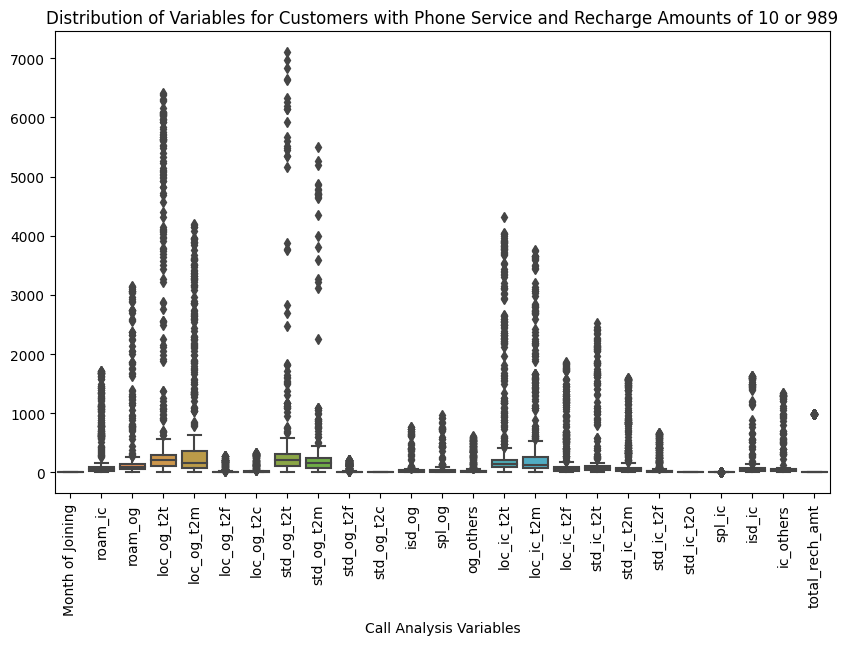

In [158]:
# Plot a boxplot for customers with a phone service and recharge amounts of 10 or 989
plt.figure(figsize=(10,6))
sns.boxplot(data=df_call_usage[(df_call_usage['Phone Service']=='Yes')&(df_call_usage['total_rech_amt'].isin([10,989]))])
plt.title("Distribution of Variables for Customers with Phone Service and Recharge Amounts of 10 or 989")
plt.xlabel("Call Analysis Variables")
plt.xticks(rotation=90)
plt.show()


**There are no outliers (8*E6) observed for the values corresponding to customers with phone service and recharge amounts of 10 or 989.**

**
This further reinforces our confidence in replacing the $10 and $989 recharge amounts for customers without phone servic**e.


In [159]:
# Replace all recharge amounts equal to 0 where there is no phone service
df_call_usage.loc[df_call_usage['Phone Service'] == 'No', 'total_rech_amt'] = 0


**Now that I've replaced all of the anomalies with 0, let's take another look at the graph for all of the data.**

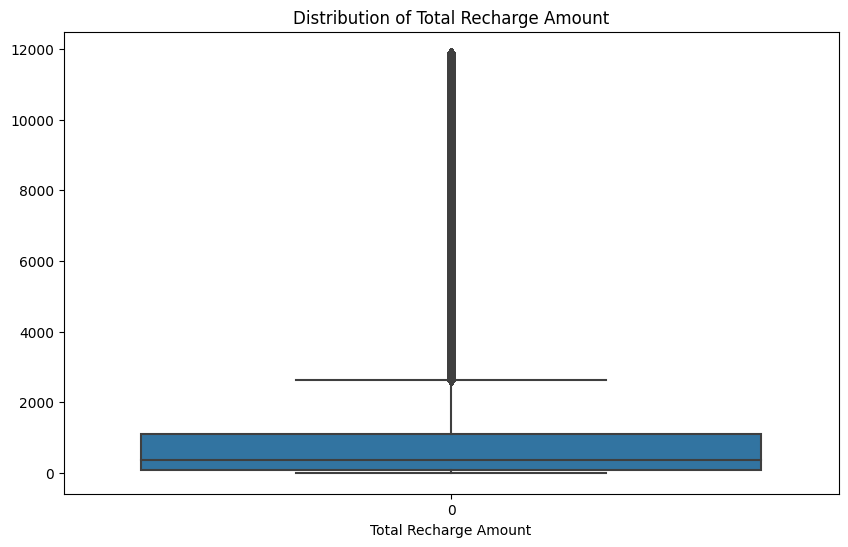

In [160]:
# Plotting the distribution using a box plot
plt.figure(figsize=(10,6))
sns.boxplot(df_call_usage['total_rech_amt'])
plt.title("Distribution of Total Recharge Amount")
plt.xlabel("Total Recharge Amount")
plt.show()


In [161]:
# Shape of the dataframe for recharge amount > 10000
df_call_usage[df_call_usage['total_rech_amt'] > 10000].shape


(24984, 26)

**Observation**:

* In my analysis, I discovered that more than 25% of customers have a total recharge amount exceeding 1158. Given this significant portion, it would not be prudent for me to replace these values. It's plausible that these customers legitimately performed such high recharges.
*
Regarding customers with a recharge amount of 11875, I believe it's advisable to inspect their usage patterns to ascertain the validity of this amount.

### **Exploring `Outgoing Calls` Analysis**

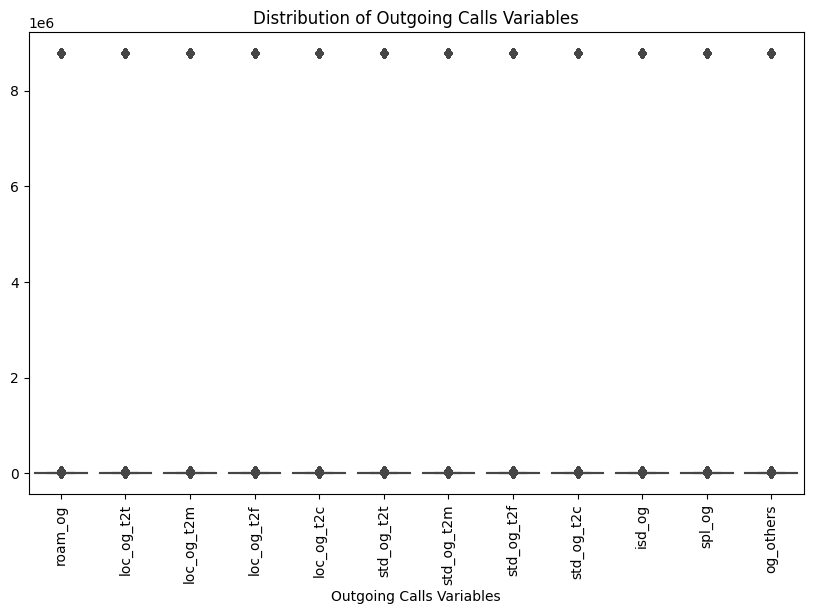

In [162]:
# Plotting the distribution using a box plot
plt.figure(figsize=(10,6))
sns.boxplot(data=df_call_usage[outgoing_call_col])
plt.title("Distribution of Outgoing Calls Variables")
plt.xlabel("Outgoing Calls Variables")
plt.xticks(rotation=90)
plt.show()


**Previously, all columns exhibited a maximum value in the range of 8E6, which has been addressed and removed.**
**
Now, I will examine the boxplot to understand the distribution of outgoing call variables for customers who did not select Phone Servic**e.

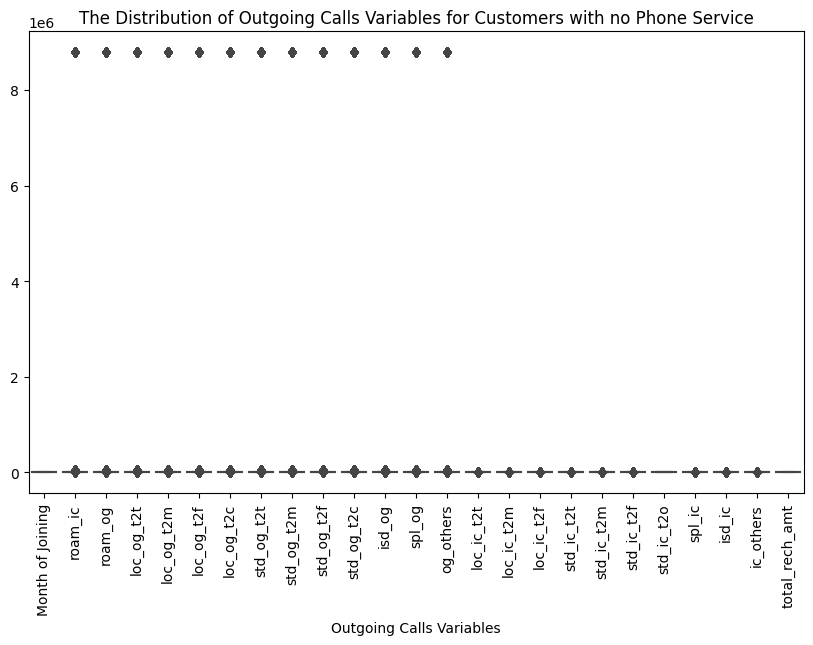

In [163]:
# Plot the distribution using Box plot
plt.figure(figsize=(10,6))
sns.boxplot(data=df_call_usage[df_call_usage['Phone Service']=='No'])
plt.title("The Distribution of Outgoing Calls Variables for Customers with no Phone Service")
plt.xlabel("Outgoing Calls Variables")
plt.xticks(rotation=90)
plt.show()


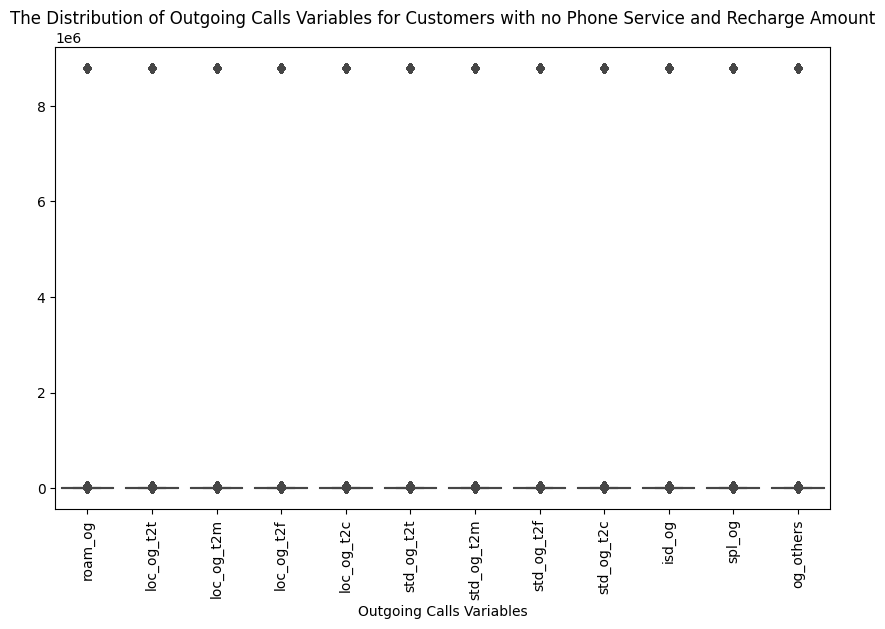

In [164]:
# Plot the distribution using Box plot
plt.figure(figsize=(10,6))
sns.boxplot(data=df_call_usage[(df_call_usage['Phone Service']=='No')&(df_call_usage['total_rech_amt']==0)][outgoing_call_col])
plt.title("The Distribution of Outgoing Calls Variables for Customers with no Phone Service and Recharge Amount")
plt.xlabel("Outgoing Calls Variables")
plt.xticks(rotation=90)
plt.show()


**Observation:**

* In the data where customers didn't opt for Phone Service and their total recharge amount is 0, the outgoing calls variables show values predominantly around 0, with a few outliers reaching approximately 8^1E6.
*
NowI'll's examine the boxplot for customers who selected Phone Service





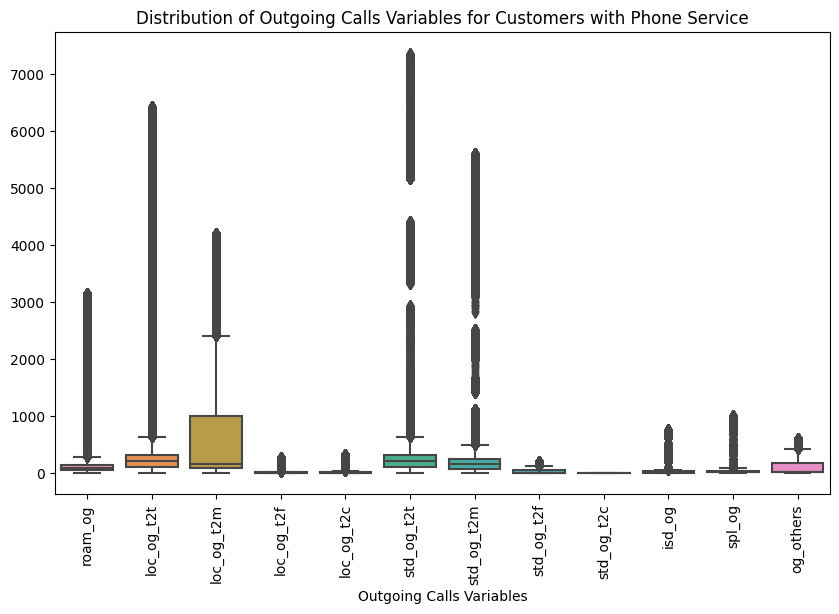

In [165]:
# Visualize the distribution using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_call_usage[df_call_usage['Phone Service'] == 'Yes'][outgoing_call_col])
plt.title("Distribution of Outgoing Calls Variables for Customers with Phone Service")
plt.xlabel("Outgoing Calls Variables")
plt.xticks(rotation=90)
plt.show()


**From the above two boxplots, I can conclude that the abnormal outgoing calls values are only for the customers who didn't opt for Phone Service. I'll analyze those further.**

In [166]:
# Separate analysis for customers with and without phone service
df_call_usage_phone_no = df_call_usage[df_call_usage['Phone Service'] == 'No']
df_call_usage_phone_yes = df_call_usage[df_call_usage['Phone Service'] == 'Yes']


In [167]:
# Columns
df_call_usage_phone_no.columns


Index(['Month of Joining', 'roam_ic', 'roam_og', 'loc_og_t2t', 'loc_og_t2m',
       'loc_og_t2f', 'loc_og_t2c', 'std_og_t2t', 'std_og_t2m', 'std_og_t2f',
       'std_og_t2c', 'isd_og', 'spl_og', 'og_others', 'loc_ic_t2t',
       'loc_ic_t2m', 'loc_ic_t2f', 'std_ic_t2t', 'std_ic_t2m', 'std_ic_t2f',
       'std_ic_t2o', 'spl_ic', 'isd_ic', 'ic_others', 'total_rech_amt',
       'Phone Service'],
      dtype='object')

In [168]:
# Roaming Outgoing Value Counts
df_call_usage_phone_no['roam_og'].value_counts()


roam_og
0.0          105884
45.0           7403
46254.0        6263
8787978.0      2564
68.0           2456
Name: count, dtype: int64

**Observations**:


* Note that the values 8787978 and 46254 are abnormal. It's unlikely for a person to make such an extensive number of outbound calls in a month.
*
46254 minutes is approximately equivalent to 32 days, which exceeds a month's duration.
*
Consequently, I will replace both values with 0.

In [169]:
# Replacing these values
df_call_usage_phone_no['roam_og'] = df_call_usage_phone_no['roam_og'].replace([46254, 8787978], 0)


In [170]:
# Checking the roaming outgoing value counts after replacement
df_call_usage_phone_no['roam_og'].value_counts()


roam_og
0.0     114711
45.0      7403
68.0      2456
Name: count, dtype: int64

In [171]:
# Check where the recharge amount is 0 but we have roaming calls
df_call_usage_phone_no[df_call_usage_phone_no['total_rech_amt'] == 0]['roam_og'].value_counts()


roam_og
0.0     114711
45.0      7403
68.0      2456
Name: count, dtype: int64

**Observations:**

* I took all of the customers that did not opt for phone service, and the recharge amount is 0.
*
I will replace all of these values with 0 because they cannot make outbound calls without a recharge and a Phone Service plan.

In [172]:
# Replacing the values with 0 where the recharge amount is 0
df_call_usage_phone_no.loc[df_call_usage_phone_no['total_rech_amt'] == 0, 'roam_og'] = 0


In [173]:
# Roaming outgoing value counts for customers with no phone service
df_call_usage_phone_no['roam_og'].value_counts()


roam_og
0.0    124570
Name: count, dtype: int64

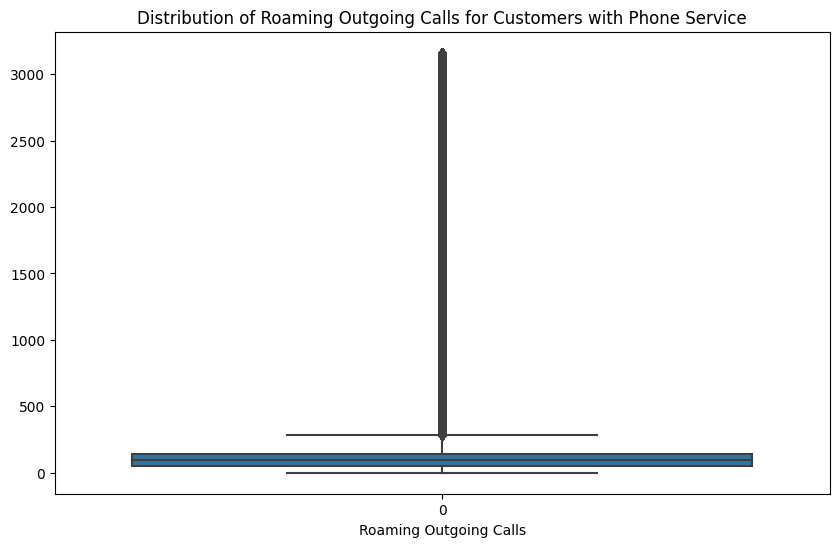

In [174]:
# Plotting the distribution using Box plot for roaming outgoing calls of customers with phone service
plt.figure(figsize=(10,6))
sns.boxplot(df_call_usage_phone_yes['roam_og'])
plt.title("Distribution of Roaming Outgoing Calls for Customers with Phone Service")
plt.xlabel("Roaming Outgoing Calls")
plt.show()


In [175]:
# Calculate the quantiles for roaming outgoing calls of customers with phone service
df_call_usage_phone_yes['roam_og'].quantile([0.1, 0.5, 0.75, 0.9, 0.97, 0.99])


0.10      19.24
0.50      94.73
0.75     141.76
0.90    1216.09
0.97    2737.44
0.99    3069.02
Name: roam_og, dtype: float64

**These values appear to be valid. Now, I will proceed to determine the recharge amount for these customers.**

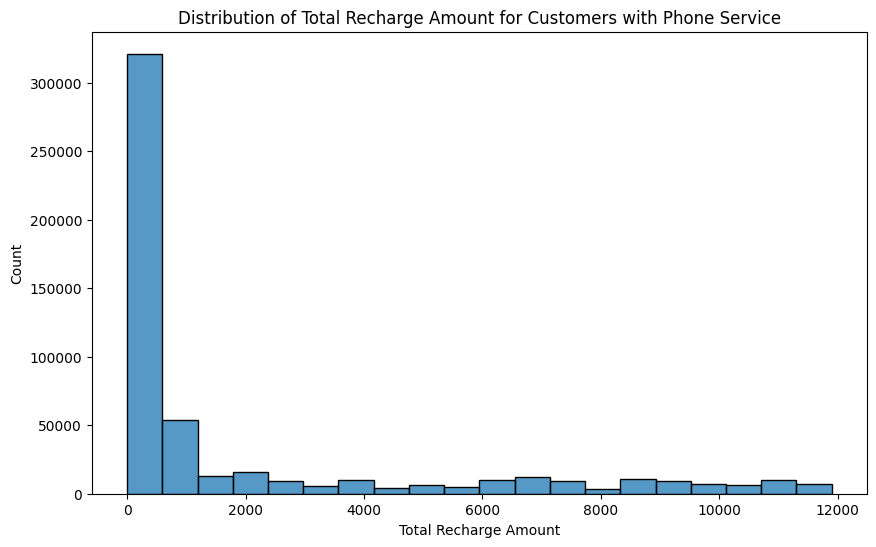

In [176]:
# Plotting the distribution using a histogram
plt.figure(figsize=(10,6))
sns.histplot(data=df_call_usage_phone_yes, x='total_rech_amt', bins=20)
plt.title("Distribution of Total Recharge Amount for Customers with Phone Service")
plt.xlabel("Total Recharge Amount")
plt.show()


In [177]:
# Shape of the data where recharge amount was 0 for customers with phone service
df_call_usage_phone_yes[df_call_usage_phone_yes['total_rech_amt'] == 0].shape


(262, 26)

**It's worth noting that among the customers with phone service, there are 262 instances where there is no recharge amount available.**


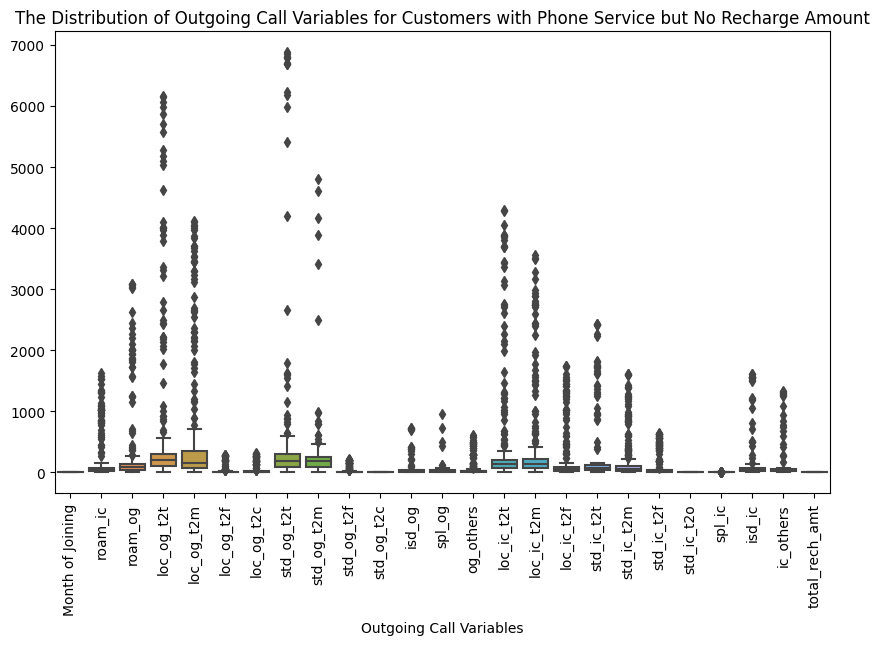

In [178]:
# Plot the distribution using a box plot
plt.figure(figsize=(10,6))
sns.boxplot(data=df_call_usage_phone_yes[df_call_usage_phone_yes['total_rech_amt']==0])
plt.title("The Distribution of Outgoing Call Variables for Customers with Phone Service but No Recharge Amount")
plt.xlabel("Outgoing Call Variables")
plt.xticks(rotation=90)
plt.show()


**I will not impute any other value for these customers in the total recharge amount. It is possible that the company has given them some offer, or I might have recharged, but it's not reflected in the data.**

#### **Local outgoing calls within same network in minutes**

In [179]:
# Check the counts
df_call_usage_phone_no['loc_og_t2t'].value_counts()


loc_og_t2t
0.0          105979
45.0           7430
46254.0        6212
68.0           2511
8787978.0      2438
Name: count, dtype: int64

**I will replace the values 46254 and 8787978 in all outgoing call columns with 0.**

In [180]:
# Iterate through each outgoing call column
for col in outgoing_call_col:
    # Replace 46254 and 8787978 values with 0 in the current column
    df_call_usage_phone_no[col] = df_call_usage_phone_no[col].replace([46254, 8787978], 0)
    # Replace the value with 0 in the current column when there is no phone service and recharge
    df_call_usage_phone_no.loc[df_call_usage_phone_no['total_rech_amt'] == 0, col] = 0


In [181]:
# Value counts for all outgoing call variables for customers with no phone service
for col in outgoing_call_col:
    print("Value count for", col)
    print(df_call_usage_phone_no[col].value_counts())
    print("-------------------------")


Value count for roam_og
roam_og
0.0    124570
Name: count, dtype: int64
-------------------------
Value count for loc_og_t2t
loc_og_t2t
0.0    124570
Name: count, dtype: int64
-------------------------
Value count for loc_og_t2m
loc_og_t2m
0.0    124570
Name: count, dtype: int64
-------------------------
Value count for loc_og_t2f
loc_og_t2f
0.0    124570
Name: count, dtype: int64
-------------------------
Value count for loc_og_t2c
loc_og_t2c
0.0    124570
Name: count, dtype: int64
-------------------------
Value count for std_og_t2t
std_og_t2t
0.0    124570
Name: count, dtype: int64
-------------------------
Value count for std_og_t2m
std_og_t2m
0.0    124570
Name: count, dtype: int64
-------------------------
Value count for std_og_t2f
std_og_t2f
0.0    124570
Name: count, dtype: int64
-------------------------
Value count for std_og_t2c
std_og_t2c
0.0    124570
Name: count, dtype: int64
-------------------------
Value count for isd_og
isd_og
0.0    124570
Name: count, dtype: int64


**Observations**:


* I observed that some customers who did not opt for phone service and have not recharged their accounts also have not placed any outgoing calls. This makes sense as I am not subscribed to the service and hence cannot make any calls.
  
* To further analyze the outgoing call patterns, I will focus on customers who have opted for phone service.


In [182]:
# I am creating a DataFrame to store quantiles for outgoing calls
quantile_outgoing_call_df = pd.DataFrame(
    columns=outgoing_call_col,
    index=[0.1, 0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.97, 0.99]
)


In [183]:
# I am entering data into the quantile DataFrame
for col in outgoing_call_col:
    quantile_outgoing_call_df[col] = df_call_usage_phone_yes[col].quantile(
        [0.1, 0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.97, 0.99]
    )


### **Outgoing call Quantiles for customers with Phone Service**

In [184]:
# Displaying the quantile DataFrame
quantile_outgoing_call_df


,roam_og,loc_og_t2t,loc_og_t2m,loc_og_t2f,loc_og_t2c,std_og_t2t,std_og_t2m,std_og_t2f,std_og_t2c,isd_og,spl_og,og_others
0.10,19.24,42.0600,33.9300,1.740,2.0800,42.5200,31.810,1.56,0.0,4.1100,5.5100,4.4600
0.25,47.48,105.5500,84.1200,4.430,5.1200,106.1200,80.110,3.94,0.0,10.3200,13.7200,11.2600
0.50,94.73,212.0250,167.9800,8.910,10.2200,212.9100,160.710,7.85,0.0,20.7900,27.6100,22.3300
0.75,141.76,318.1100,1009.9875,13.370,15.3000,319.2400,242.390,53.04,0.0,31.2000,41.3500,172.4125
0.80,151.35,1046.8180,1744.8500,16.210,16.3200,340.7800,258.780,93.00,0.0,33.2600,44.0500,272.0000
0.90,1216.09,4091.4190,2908.6810,129.924,143.2150,909.0200,466.750,152.53,0.0,37.4200,49.5300,420.4600
0.95,2273.31,5562.5110,3644.7170,203.742,249.4525,4093.2425,1024.810,180.57,0.0,229.5090,426.2400,512.7400
0.97,2737.44,5935.0189,3862.3005,211.430,289.9475,5674.8075,4081.317,196.05,0.0,409.1574,583.8564,545.2727
0.99,3069.02,6246.8572,4095.4627,265.010,315.0825,6800.0910,5036.520,210.38,0.0,648.9958,873.3896,586.1700


**Observations:**

* The values in the outgoing call columns for customers with phone service appear to be appropriate and valid, requiring no alterations. Consequently, there is no need to modify these values.
*
Next, I will synchronize th`e df_call_usage_phone_`no an`d df_call_usage_phone_y`es dataframes with the original dataframe





In [185]:
# Updating the call usage dataframe
df_call_usage.update(df_call_usage_phone_no)
df_call_usage.update(df_call_usage_phone_yes)


### **Incoming Calls Analysis**

In [186]:
# Creating a list of incoming call variables columns
incoming_call_col = ['roam_ic', 'loc_ic_t2t', 'loc_ic_t2m', 'loc_ic_t2f', 'std_ic_t2t',
                     'std_ic_t2m', 'std_ic_t2f', 'std_ic_t2o', 'spl_ic', 'isd_ic',
                     'ic_others']


**It's important to recognize that even if a customer hasn't subscribed to phone service, they could still receive incoming calls. Therefore, I'll examine the quantiles and boxplots for all of the columns.**

In [187]:
# Initialize an empty DataFrame for quantiles of incoming calls
quantile_incoming_call_df = pd.DataFrame(
    columns=incoming_call_col,
    index=[0.1, 0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.97, 0.99]
)


In [188]:
# Fill the quantile DataFrame with incoming calls data
for col in quantile_incoming_call_df.columns:
    quantile_incoming_call_df[col] = df_call_usage[col].quantile(
        [0.1, 0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.97, 0.99]
    )
quantile_incoming_call_df


,roam_ic,loc_ic_t2t,loc_ic_t2m,loc_ic_t2f,std_ic_t2t,std_ic_t2m,std_ic_t2f,std_ic_t2o,spl_ic,isd_ic,ic_others
0.10,0.0000,32.9400,32.4100,13.9600,15.5000,12.5700,4.880,0.0,0.02,9.4600,7.6200
0.25,12.4900,80.9700,80.7500,34.8900,38.7500,30.9000,12.090,0.0,0.04,23.6400,19.1000
0.50,49.2900,162.4700,161.5200,69.4950,77.2900,62.1100,24.260,0.0,0.08,47.0300,38.0700
0.75,111.8400,1039.4300,866.7800,408.4100,115.5500,380.1800,165.410,0.0,0.14,70.6100,57.1900
0.80,370.9840,1678.6600,1309.3640,594.0660,123.2320,531.8380,245.624,0.0,0.23,75.2500,61.0100
0.90,1050.6070,3045.0360,2374.4260,1218.9800,1440.7410,1048.7200,469.930,0.0,0.65,472.9730,370.4520
0.95,1448.4700,3746.3320,3194.9620,1473.1490,2039.9605,1377.9870,571.450,0.0,1.33,1451.9695,927.0530
0.97,1610.0731,3927.2384,3480.8416,1686.0500,2165.8986,1482.1500,595.120,0.0,1.78,1560.8900,1236.0818
0.99,46254.0000,4209.6656,3683.8072,1795.8716,2442.3681,1573.5608,639.670,0.0,2.20,1603.3413,1319.1303


**Except for the 'roam_ic' column, all other columns seem to have appropriate values. Therefore, I won't make any changes to them. Now, I'll further analyze the `roam_ic` column.**

In [189]:
# Counting unique values in the 'roam_ic' column
df_call_usage['roam_ic'].value_counts()


roam_ic
0.00          105827
45.00           7591
46254.00        6194
8787978.00      2579
68.00           2454
               ...  
1441.39            1
1599.70            1
362.26             1
1126.10            1
1318.75            1
Name: count, Length: 99578, dtype: int64

**Observation:**

* Upon inspection, we noticed the presence of figures 46254 and 8787978 in the `roam_ic` column. To maintain data consistency, we will replace these values with 0.
*
However, figures 45 and 68 are also present, but we opt not to modify them as they could potentially represent legitimate values rather than data input errors.

In [190]:
# Replacing outliers with 0
df_call_usage['roam_ic'] = df_call_usage['roam_ic'].replace([46254, 8787978], 0)


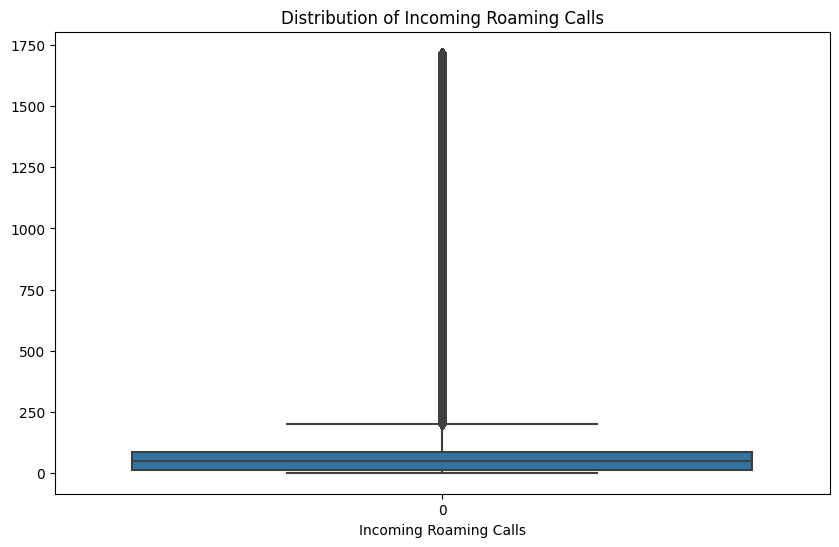

In [191]:
# Plot the distribution using Box plot
plt.figure(figsize=(10,6))
sns.boxplot(df_call_usage['roam_ic'])
plt.title("Distribution of Incoming Roaming Calls")
plt.xlabel("Incoming Roaming Calls")
plt.show()


### **Exploring `Internet Services`**

In [192]:
# Extracting customer data usage information
df_data_usage = df[['Month of Joining',
                    'total_rech_data', 'vol_4g', 'vol_5g',
                    'Internet Service']]


In [193]:
# Display data types
df_data_usage.dtypes


Month of Joining      int64
total_rech_data      object
vol_4g              float64
vol_5g              float64
Internet Service     object
dtype: object

**It is noticeable that the `total_rech_data` column is of object data type, contrary to the data dictionary where it should be of float type.**

In [194]:
# Display the value counts for the 'Internet Service' column
df_data_usage['Internet Service'].value_counts()


Internet Service
Yes    398863
No     254890
Name: count, dtype: int64

In [195]:
# Display the value counts for the 'total_rech_data' column
df_data_usage['total_rech_data'].value_counts()


total_rech_data
0        216627
2         34246
1         16989
7987      15386
e01       12767
3         10933
8          8172
13         7578
25         7376
4          7119
12         6474
9          5912
7          5647
89890      5086
26         5074
1.6        5024
17         5021
10         4810
16         4705
15         4587
14         4498
6          4286
24         4255
30         3990
18         3934
20         3803
5          3761
11         3514
27         3341
21         3259
31         3192
23         2988
19         2826
29         2681
22         1895
32         1513
28          580
Name: count, dtype: int64

**I see a `e01` value in the column. I'll replace it with 10.**

In [196]:
# Replace the value 'e01' with 10
df_data_usage['total_rech_data'] = df_data_usage['total_rech_data'].replace('e01', 10)


In [197]:
# Convert 'total_rech_data' to a numeric column
df_data_usage['total_rech_data'] = pd.to_numeric(df_data_usage['total_rech_data'])


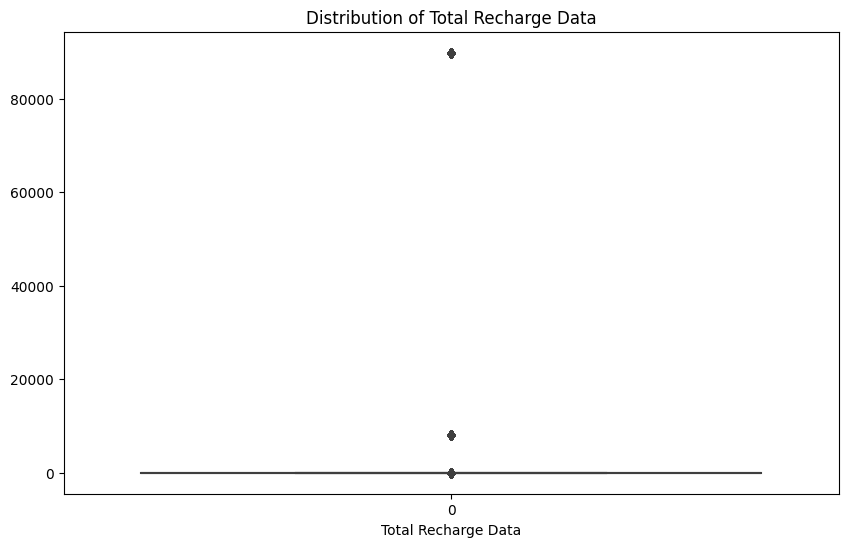

In [198]:
# Plot the distribution using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(df_data_usage['total_rech_data'])
plt.title("Distribution of Total Recharge Data")
plt.xlabel("Total Recharge Data")
plt.show()


**I observe, there are some outliers in the distribution.**


In [199]:
# I'll check the quantiles of the total recharge data column to further understand its distribution.
df_data_usage['total_rech_data'].quantile([0.1, 0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.97, 0.99])


0.10        0.0
0.25        0.0
0.50        1.0
0.75       10.0
0.80       14.0
0.90       25.0
0.95       31.0
0.97     7987.0
0.99    89890.0
Name: total_rech_data, dtype: float64

**I will analyze the number of customers who have a data recharge amount greater than $31.**.

In [200]:
# Filtering the data
df_data_usage[df_data_usage['total_rech_data'] > 31]


,,Month of Joining,total_rech_data,vol_4g,vol_5g,Internet Service
Customer ID,Month,,,,,
zcpjiqpcepwze6,10,9,7987.0,0.00,0.00,No
teequpgyuzwce14,3,2,7987.0,0.00,0.00,No
pmrwmbcxiuxgx17,7,7,7987.0,63.00,0.00,No
ucpurmfkdlnwi18,14,12,7987.0,0.00,0.00,No
pmjtlwcmmdtqy25,11,2,89890.0,0.00,254687.00,No
...,...,...,...,...,...,...
dxkygyzyqaavm162947,7,2,7987.0,0.00,0.00,No
bwxzpxwwzyzqu162949,7,6,7987.0,0.00,0.00,No
raxqiaucxntke162967,12,9,7987.0,0.00,87978.00,No


**Based on the data above, it's evident that many customers who have data recharge values exceeding $31 have not opted for Internet Service. We can further investigate the unique numbers for total recharge data among customers who have not chosen Internet Service.**

In [201]:
# Check the total recharge data unique value counts where there is no internet service
df_data_usage[df_data_usage['Internet Service'] == 'No']['total_rech_data'].value_counts()


total_rech_data
0.0        216627
7987.0      15386
10.0        12767
89890.0      5086
1.6          5024
Name: count, dtype: int64

**Observations:**


* Upon examination, the data reveals that the data recharge amounts of 10 and 1.6 seem reasonable. However, further analysis is required to determine whether to replace or remove the "No" value from the Internet service.

* Values such as 89890 and 7987 seem unrealistic. Since there is no associated Internet Service Plan, it's advisable to replace these values with 0.

In [202]:
# Replacing unrealistic values with 0
df_data_usage['total_rech_data'] = df_data_usage['total_rech_data'].replace([7987, 89890], 0)


**I'll look at 10 and 1.6 now.**

In [203]:
# Checking volumes of 4g and 5g data where internet service is no
df_data_usage[(df_data_usage['Internet Service']=='No') & (df_data_usage['total_rech_data'].isin([10, 1.6]))][['vol_4g', 'vol_5g']].apply(lambda col: col.unique())


,vol_4g,vol_5g
0,0.0,0.0
1,63.0,254687.0
2,254687.0,63.0
3,87978.0,87978.0
4,789.0,789.0


In [204]:
# Checking volumes of 4g and 5g data where internet service is yes
df_data_usage[(df_data_usage['Internet Service']=='Yes') & (df_data_usage['total_rech_data'].isin([10, 1.6]))][['vol_4g', 'vol_5g']].apply(lambda col: col.unique())


vol_4g    [207.01, 147.78, 606.91, 175.48, 183.36, 1.42,...
vol_5g    [3394.04, 9925.61, 3483.1, 9181.66, 236.32, 16...
dtype: object

**Observations**:

* I can clearly observe that anytime a data recharge of 10 or 1.6 is made and the Internet service is selected, the vol 4g and vol 5g have varying values.

* But, when the Internet service is turned off, the results are either 0, 63, 254687, 87978, or 789.

* I can go to business and inquire about this here.

In [205]:
# Replacing the values where Internet Service is No
df_data_usage.loc[df_data_usage['Internet Service'] == 'No', 'total_rech_data'] = 0


**For customers who did not choose Internet service, I replaced all data with 0.**

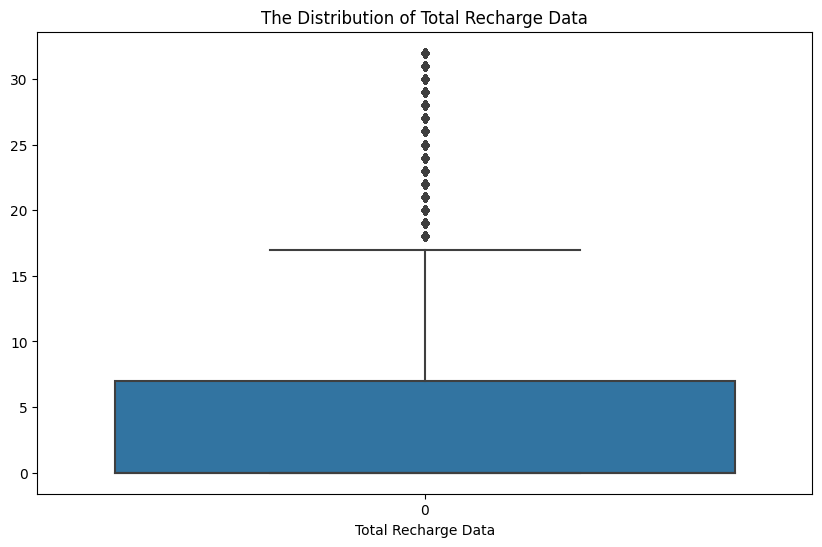

In [206]:
# Plotting the distribution using a box plot
plt.figure(figsize=(10,6))
sns.boxplot(df_data_usage['total_rech_data'])
plt.title("The Distribution of Total Recharge Data")
plt.xlabel("Total Recharge Data")
plt.show()


**It seems that there are outliers present in the distribution of total recharge data, particularly above the 75th percentile. As discussed earlier, I have decided not to alter those values.**

**Now, I'll proceed with the analysis of other variables, such as "arpu 4g" and "arpu 5g," and discuss their imputation based on our previous discussions.**

In [207]:
# Check the value counts for total recharge data where arpu 4g and 5g is null
df[(df['arpu_4g'].isna())&(df['arpu_5g'].isna())]['total_rech_data'].value_counts(dropna=False)


total_rech_data
NaN    195182
13        802
30        744
26        725
27        711
12        656
16        583
29        458
25        386
31        370
19        332
15        317
32        159
18        152
24         97
20         41
Name: count, dtype: int64

In [208]:
# Replacing the values with 'Not Applicable'
df.loc[(df['arpu_4g'].isna())&(df['arpu_5g'].isna())&(df['total_rech_data'].isna()),['arpu_4g','arpu_5g']]='Not Applicable'


### **Exploring `vol_4g` and `vol_5g` columns**

In [209]:
# Separately analyzing the internet volumes for customers with and without internet service
df_data_usage_internet_no = df_data_usage[df_data_usage['Internet Service'] == 'No']
df_data_usage_internet_yes = df_data_usage[df_data_usage['Internet Service'] == 'Yes']


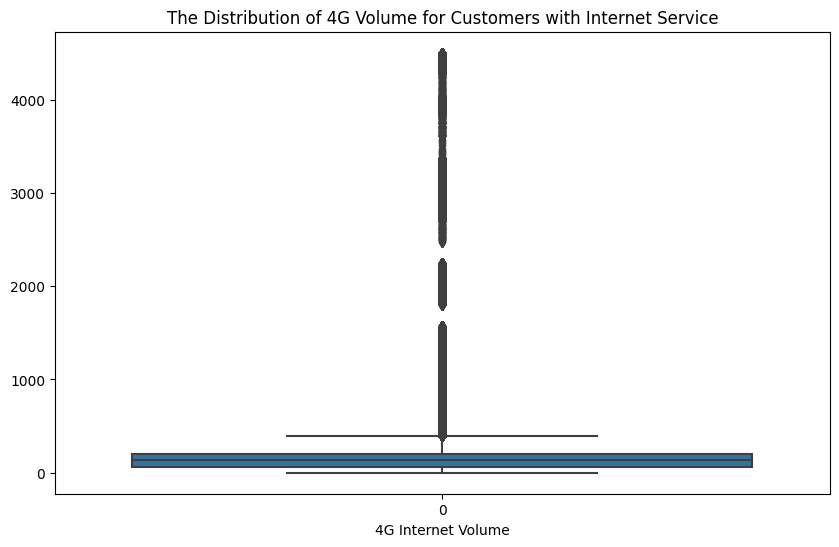

In [210]:
# Plotting the distribution using a box plot for 4G volume for customers with internet service
plt.figure(figsize=(10, 6))
sns.boxplot(df_data_usage_internet_yes['vol_4g'])
plt.title("The Distribution of 4G Volume for Customers with Internet Service")
plt.xlabel("4G Internet Volume")
plt.show()


In [211]:
# Checking the quantiles for 4G volume for customers with internet service
df_data_usage_internet_yes['vol_4g'].quantile([0.1, 0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.97, 0.99])


0.10      25.9600
0.25      65.6100
0.50     131.6000
0.75     196.6000
0.80     209.9400
0.90     505.9800
0.95    1407.9740
0.97    2888.7584
0.99    4370.9476
Name: vol_4g, dtype: float64

**I will not alter any of these values.**

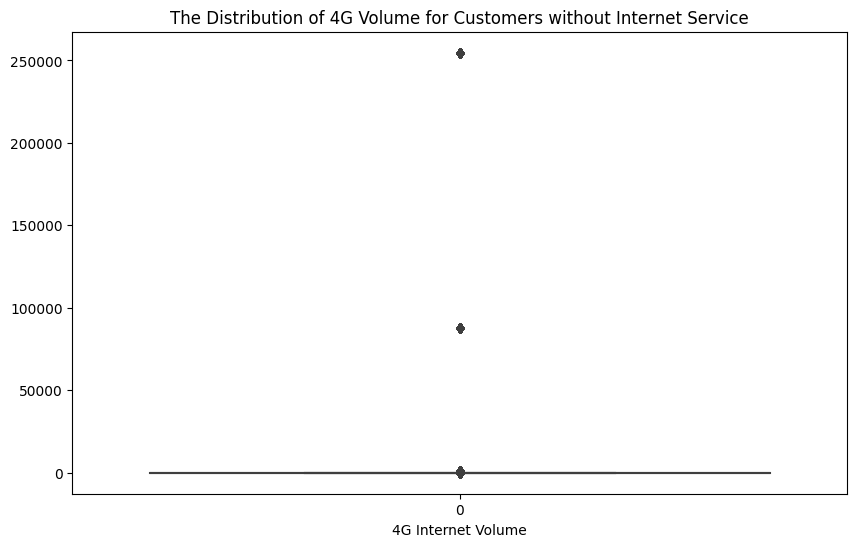

In [212]:
# Plotting the distribution of 4G volume for customers without internet service
plt.figure(figsize=(10, 6))
sns.boxplot(df_data_usage_internet_no['vol_4g'])
plt.title("The Distribution of 4G Volume for Customers without Internet Service")
plt.xlabel("4G Internet Volume")
plt.show()


**The abnormal values occur when Internet service is not opted for.**

In [213]:
# Value counts of 4g data without inetrnet service
df_data_usage_internet_no['vol_4g'].value_counts()


vol_4g
0.0         216587
63.0         15419
254687.0     12656
789.0         5152
87978.0       5076
Name: count, dtype: int64

**I'll see the number of these values present without any data recharge.**

In [214]:
# Count the values in 4G volume with no internet service and recharge data
df_data_usage_internet_no[df_data_usage_internet_no['total_rech_data']==0]['vol_4g'].value_counts()


vol_4g
0.0         216587
63.0         15419
254687.0     12656
789.0         5152
87978.0       5076
Name: count, dtype: int64

**Observations:**


From the output, we can observe the following distribution of values in the vol_4g column:

* Most of the entries, 216,587 to be precise, have a value of 0.0 GB for 4G volume.

* There are 15,419 entries with a value of 63.0 GB.

* However, there are some outliers with values like 254,687.0 GB and 87,978.0 GB, which seem unreasonable.
Similarly, there are 5,152 entries with a value of 789.0 GB.

To address this issue, we will replace the absurd values (254,687.0 and 87,978.0) with 0, considering them as outliers.

In [215]:
# Replacing the value with 0 for 4g volume without internet service and no data recharge
df_data_usage_internet_no.loc[(df_data_usage_internet_no['total_rech_data']==0), 'vol_4g'] = 0


In [216]:
# Checking the values of 4g volume without internet service
df_data_usage_internet_no['vol_4g'].value_counts()


vol_4g
0.0    254890
Name: count, dtype: int64

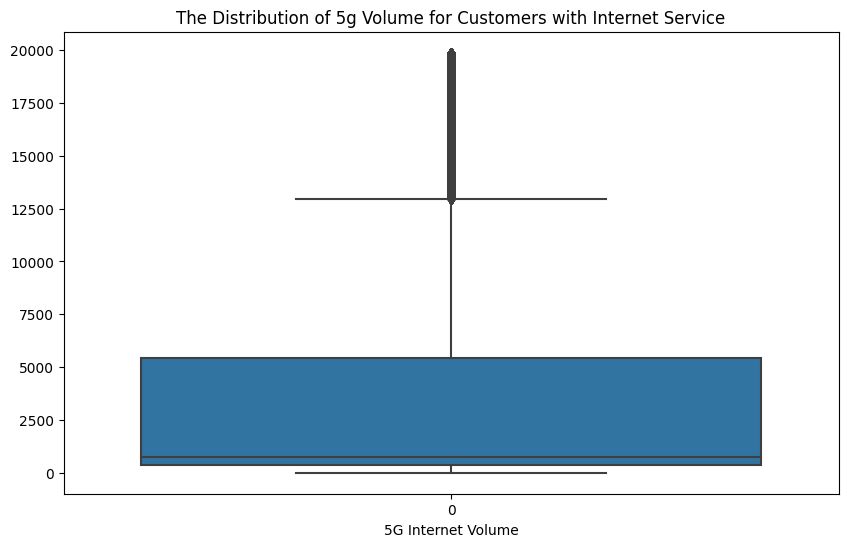

In [217]:
# Plot the distribution using Box plot for 5g volume with internet service
plt.figure(figsize=(10,6))
sns.boxplot(df_data_usage_internet_yes['vol_5g'])
plt.title("The Distribution of 5g Volume for Customers with Internet Service")
plt.xlabel("5G Internet Volume")
plt.show()


In [218]:
# Check the quantiles for 5g volume with internet service
df_data_usage_internet_yes['vol_5g'].quantile([0.1, 0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.97, 0.99])


0.10      152.3420
0.25      379.8600
0.50      759.6000
0.75     5410.0500
0.80     8277.9360
0.90    13588.3860
0.95    16489.9130
0.97    17684.4026
0.99    19090.8604
Name: vol_5g, dtype: float64

In [219]:
# Check the 5g volume value counts for customers with no internet service
df_data_usage_internet_no['vol_5g'].value_counts()


vol_5g
0.0         216464
63.0         15314
254687.0     12889
87978.0       5183
789.0         5040
Name: count, dtype: int64

**The abnormal values occur when customers have not opted for Internet service.**

In [220]:
# Count the values in 5G volume with no internet service and recharge data
df_data_usage_internet_no[df_data_usage_internet_no['total_rech_data']==0]['vol_5g'].value_counts()


vol_5g
0.0         216464
63.0         15314
254687.0     12889
87978.0       5183
789.0         5040
Name: count, dtype: int64

**Observations**:

* It's notable that customers with substantial data consumption often have recharged with 0, 10, or 1.6 units, which seems unusual. We will now replace all such values.
*
Since vol-5g represents data utilization in gigabytes, the values 254,687 and 87,978 appear absurd. Let's substitute 0 for them.

In [221]:
# Replace values with 0 where total_rech_data is 0
condition = df_data_usage_internet_no['total_rech_data'] == 0
df_data_usage_internet_no.loc[condition, 'vol_5g'] = 0


In [222]:
# Check the counts of 'vol_5g' column
vol_5g_counts = df_data_usage_internet_no['vol_5g'].value_counts()
print(vol_5g_counts)


vol_5g
0.0    254890
Name: count, dtype: int64


In [223]:
# Update df_data_usage with df_data_usage_internet_no
df_data_usage.update(df_data_usage_internet_no)

# Update df_data_usage with df_data_usage_internet_yes
df_data_usage.update(df_data_usage_internet_yes)


**I have updated all of the values in the df_data_usage and df_call_usage DataFrames.**

**I can now update both of these DataFrames in our main DataFrame, df.**

In [224]:
# Update original DataFrame df with df_call_usage
df.update(df_call_usage)

# Update original DataFrame df with df_data_usage
df.update(df_data_usage)


**I can check the percentage of missing values in your data!**

In [225]:
import pandas as pd

# Calculate the percentage of missing values in each column
percent_missing = df.isna().sum() * 100 / len(df)

# Create a DataFrame containing column names and their percentage of missing values
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing.values})


In [226]:
# Percentage of missing values in each column
missing_value_df


,column_name,percent_missing
0,Month of Joining,0.000000
1,zip_code,0.000000
2,Gender,0.000000
3,Age,1.562364
4,Married,0.000000
5,Dependents,0.000000
6,Number of Dependents,0.756402
7,Location ID,0.000000
8,Service ID,0.000000
9,state,0.000000


In [227]:
# Filter the DataFrame to show only columns with more than 20% missing values
missing_value_df[missing_value_df['percent_missing'] > 20]


,column_name,percent_missing
41,total_rech_data,32.107539
46,night_pck_user,57.070943
47,fb_user,62.775085
55,Internet Type,49.751206


**Observation:**

Missing values greater than 20% should not be imputed because the imputation process may introduce bias and distort the true distribution of the data. Imputing a large percentage of missing values may also result in unreliable and inaccurate analysis. In such cases, it may be better to drop the columns!

**I'll select all the columns with less missing values and impute them.**

In [228]:
# Select columns with less than 20% missing values for further analysis
missing_impute_cols = list(
    missing_value_df[(missing_value_df.percent_missing > 1)
    &
    (missing_value_df.percent_missing < 20)]['column_name']
)


In [229]:
# All columns with missing values less than 20 %
missing_impute_cols


['Age',
 'roam_ic',
 'roam_og',
 'loc_og_t2t',
 'loc_og_t2m',
 'loc_og_t2f',
 'loc_og_t2c',
 'std_og_t2t',
 'std_og_t2m',
 'std_og_t2f',
 'std_og_t2c',
 'isd_og',
 'spl_og',
 'og_others',
 'loc_ic_t2t',
 'loc_ic_t2m',
 'loc_ic_t2f',
 'std_ic_t2t',
 'std_ic_t2m',
 'std_ic_t2f',
 'std_ic_t2o',
 'spl_ic',
 'isd_ic',
 'ic_others',
 'arpu_5g',
 'arpu_4g',
 'aug_vbc_5g',
 'Multiple Lines',
 'Unlimited Data']

In [230]:
# Check the shape of the DataFrame containing columns with less than 20% missing values
df[missing_impute_cols].shape


(653753, 29)

## **Imputation By Multivariate Imputation by Chained Equation (MICE)**


MICE is a powerful imputation method that can handle missing data in complex datasets. It has been shown to be more accurate than other imputation methods, such as listwise deletion and mean imputation.


In [231]:
# Importing libraries for MICE imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn import linear_model


In [232]:
# Columns with missing values eligible for imputation
missing_impute_cols


['Age',
 'roam_ic',
 'roam_og',
 'loc_og_t2t',
 'loc_og_t2m',
 'loc_og_t2f',
 'loc_og_t2c',
 'std_og_t2t',
 'std_og_t2m',
 'std_og_t2f',
 'std_og_t2c',
 'isd_og',
 'spl_og',
 'og_others',
 'loc_ic_t2t',
 'loc_ic_t2m',
 'loc_ic_t2f',
 'std_ic_t2t',
 'std_ic_t2m',
 'std_ic_t2f',
 'std_ic_t2o',
 'spl_ic',
 'isd_ic',
 'ic_others',
 'arpu_5g',
 'arpu_4g',
 'aug_vbc_5g',
 'Multiple Lines',
 'Unlimited Data']

In [233]:
# Filter columns with missing values and create a copy DataFrame
df_mice = df.filter(missing_impute_cols, axis=1).copy()


In [234]:
# Display the top three rows of the DataFrame df_mice
df_mice.head(3)


Age  roam_ic  roam_og  loc_og_t2t  loc_og_t2m   
Customer ID    Month                                                   
hthjctifkiudi0 1      36.0    18.88    78.59      280.32       30.97  \
uqdtniwvxqzeu1 6       NaN    69.46    72.08      255.73      148.80   
               7       NaN  1012.60   115.26       52.95         NaN   

                      loc_og_t2f  loc_og_t2c  std_og_t2t  std_og_t2m   
Customer ID    Month                                                   
hthjctifkiudi0 1            5.71        1.79       25.71      175.56  \
uqdtniwvxqzeu1 6           30.00        7.61      308.29      265.20   
               7          103.28       15.71      244.20       15.19   

                      std_og_t2f  std_og_t2c  isd_og  spl_og  og_others   
Customer ID    Month                                                      
hthjctifkiudi0 1            0.47         0.0    5.11    0.65      13.99  \
uqdtniwvxqzeu1 6           10.82         0.0    1.23  905.51       1.69   
               7             NaN         NaN   13.14  455.15     115.63   

                      loc_ic_t2t  loc_ic_t2m  loc_ic_t2f  std_ic_t2t   
Customer ID    Month                                                   
hthjctifkiudi0 1          121.51      168.40       67.61      115.69  \
uqdtniwvxqzeu1 6          212.93      155.19       29.04        9.15   
               7          121.80      699.39       44.49       83.59   

                      std_ic_t2m  std_ic_t2f  std_ic_t2o  spl_ic  isd_ic   
Customer ID    Month                                                       
hthjctifkiudi0 1           52.22       18.71         0.0    0.26   11.53  \
uqdtniwvxqzeu1 6           38.89        0.84         0.0    0.05   32.51   
               7          914.70       13.25         0.0    0.06   13.05   

                      ic_others         arpu_5g         arpu_4g  aug_vbc_5g   
Customer ID    Month                                                          
hthjctifkiudi0 1          46.42  Not Applicable  Not Applicable      214.99  \
uqdtniwvxqzeu1 6          25.53             0.0             0.0        0.00   
               7           5.62            -9.4           106.3       85.87   

                     Multiple Lines Unlimited Data  
Customer ID    Month                                
hthjctifkiudi0 1                Yes            Yes  
uqdtniwvxqzeu1 6                Yes             No  
               7                 No            Yes

In [235]:
# Display the data types of columns in the DataFrame df_mice
df_mice.dtypes


Age               float64
roam_ic           float64
roam_og           float64
loc_og_t2t        float64
loc_og_t2m        float64
loc_og_t2f        float64
loc_og_t2c        float64
std_og_t2t        float64
std_og_t2m        float64
std_og_t2f        float64
std_og_t2c        float64
isd_og            float64
spl_og            float64
og_others         float64
loc_ic_t2t        float64
loc_ic_t2m        float64
loc_ic_t2f        float64
std_ic_t2t        float64
std_ic_t2m        float64
std_ic_t2f        float64
std_ic_t2o        float64
spl_ic            float64
isd_ic            float64
ic_others         float64
arpu_5g            object
arpu_4g            object
aug_vbc_5g        float64
Multiple Lines     object
Unlimited Data     object
dtype: object

In [236]:
# Columns to remove from the list of columns eligible for imputation
columns_to_remove = ['arpu_4g', 'arpu_5g', 'Multiple Lines', 'Unlimited Data']

# Iterate through each column to remove
for column in columns_to_remove:
    # Check if the column exists in the list before removing it
    if column in missing_impute_cols:
        missing_impute_cols.remove(column)


In [237]:
# Filter columns eligible for imputation and create a copy DataFrame for MICE imputation
df_mice = df.filter(missing_impute_cols, axis=1).copy()


In [238]:
df_mice.columns


Index(['Age', 'roam_ic', 'roam_og', 'loc_og_t2t', 'loc_og_t2m', 'loc_og_t2f',
       'loc_og_t2c', 'std_og_t2t', 'std_og_t2m', 'std_og_t2f', 'std_og_t2c',
       'isd_og', 'spl_og', 'og_others', 'loc_ic_t2t', 'loc_ic_t2m',
       'loc_ic_t2f', 'std_ic_t2t', 'std_ic_t2m', 'std_ic_t2f', 'std_ic_t2o',
       'spl_ic', 'isd_ic', 'ic_others', 'aug_vbc_5g'],
      dtype='object')

In [239]:
# Define MICE Imputer with specified parameters
mice_imputer = IterativeImputer(
    estimator=linear_model.BayesianRidge(),
    n_nearest_features=None,
    imputation_order='ascending'
)


In [240]:
# Fit and transform the data using the MICE imputer, and create a DataFrame
df_mice_imputed = pd.DataFrame(
    mice_imputer.fit_transform(df_mice),
    columns=df_mice.columns,
    index=df_mice.index
)


In [241]:
# Display the top three rows of the DataFrame after MICE imputation
df_mice_imputed.head(3)


Age  roam_ic  roam_og  loc_og_t2t   loc_og_t2m   
Customer ID    Month                                                         
hthjctifkiudi0 1      36.000000    18.88    78.59      280.32    30.970000  \
uqdtniwvxqzeu1 6      36.657198    69.46    72.08      255.73   148.800000   
               7      36.607828  1012.60   115.26       52.95  1151.693063   

                      loc_og_t2f  loc_og_t2c  std_og_t2t  std_og_t2m   
Customer ID    Month                                                   
hthjctifkiudi0 1            5.71        1.79       25.71      175.56  \
uqdtniwvxqzeu1 6           30.00        7.61      308.29      265.20   
               7          103.28       15.71      244.20       15.19   

                      std_og_t2f  std_og_t2c  isd_og  spl_og  og_others   
Customer ID    Month                                                      
hthjctifkiudi0 1        0.470000         0.0    5.11    0.65      13.99  \
uqdtniwvxqzeu1 6       10.820000         0.0    1.23  905.51       1.69   
               7       61.837211         0.0   13.14  455.15     115.63   

                      loc_ic_t2t  loc_ic_t2m  loc_ic_t2f  std_ic_t2t   
Customer ID    Month                                                   
hthjctifkiudi0 1          121.51      168.40       67.61      115.69  \
uqdtniwvxqzeu1 6          212.93      155.19       29.04        9.15   
               7          121.80      699.39       44.49       83.59   

                      std_ic_t2m  std_ic_t2f  std_ic_t2o  spl_ic  isd_ic   
Customer ID    Month                                                       
hthjctifkiudi0 1           52.22       18.71         0.0    0.26   11.53  \
uqdtniwvxqzeu1 6           38.89        0.84         0.0    0.05   32.51   
               7          914.70       13.25         0.0    0.06   13.05   

                      ic_others  aug_vbc_5g  
Customer ID    Month                         
hthjctifkiudi0 1          46.42      214.99  
uqdtniwvxqzeu1 6          25.53        0.00  
               7           5.62       85.87

In [242]:
# Verify the imputation by checking the number of missing values in the DataFrame after MICE imputation
df_mice_imputed.isna().sum()


Age           0
roam_ic       0
roam_og       0
loc_og_t2t    0
loc_og_t2m    0
loc_og_t2f    0
loc_og_t2c    0
std_og_t2t    0
std_og_t2m    0
std_og_t2f    0
std_og_t2c    0
isd_og        0
spl_og        0
og_others     0
loc_ic_t2t    0
loc_ic_t2m    0
loc_ic_t2f    0
std_ic_t2t    0
std_ic_t2m    0
std_ic_t2f    0
std_ic_t2o    0
spl_ic        0
isd_ic        0
ic_others     0
aug_vbc_5g    0
dtype: int64

**I will update this DataFrame with the values from the original DataFrame!**

In [243]:
# Update the original DataFrame with the values from df_mice_imputed
df.update(df_mice_imputed)


In [244]:
# Display the top three rows of the updated DataFrame
df.head(3)


Month of Joining  zip_code  Gender        Age Married   
Customer ID    Month                                                          
hthjctifkiudi0 1                     1     71638  Female  36.000000      No  \
uqdtniwvxqzeu1 6                     6     72566    Male  36.657198      No   
               7                     6     72566    Male  36.607828      No   

                     Dependents  Number of Dependents    Location ID   
Customer ID    Month                                                   
hthjctifkiudi0 1             No                   0.0  jeavwsrtakgq0  \
uqdtniwvxqzeu1 6             No                   0.0  qcvetdmalnkw1   
               7             No                   0.0  qcvetdmalnkw1   

                               Service ID state         county   
Customer ID    Month                                             
hthjctifkiudi0 1      bfbrnsqreveeuafgps0    AR  Chicot County  \
uqdtniwvxqzeu1 6      tkqnsqflrdatnqapsh1    AR   Izard County   
               7      tkqnsqflrdatnqapsh1    AR   Izard County   

                             timezone area_codes country  latitude  longitude   
Customer ID    Month                                                            
hthjctifkiudi0 1      America/Chicago      870.0      US     33.52     -91.43  \
uqdtniwvxqzeu1 6      America/Chicago      870.0      US     36.22     -92.08   
               7      America/Chicago      870.0      US     36.22     -92.08   

                        arpu  roam_ic  roam_og  loc_og_t2t   loc_og_t2m   
Customer ID    Month                                                      
hthjctifkiudi0 1      273.07    18.88    78.59      280.32    30.970000  \
uqdtniwvxqzeu1 6     -329.96    69.46    72.08      255.73   148.800000   
               7      101.22  1012.60   115.26       52.95  1151.693063   

                      loc_og_t2f  loc_og_t2c  std_og_t2t  std_og_t2m   
Customer ID    Month                                                   
hthjctifkiudi0 1            5.71        1.79       25.71      175.56  \
uqdtniwvxqzeu1 6           30.00        7.61      308.29      265.20   
               7          103.28       15.71      244.20       15.19   

                      std_og_t2f  std_og_t2c  isd_og  spl_og  og_others   
Customer ID    Month                                                      
hthjctifkiudi0 1        0.470000         0.0    5.11    0.65      13.99  \
uqdtniwvxqzeu1 6       10.820000         0.0    1.23  905.51       1.69   
               7       61.837211         0.0   13.14  455.15     115.63   

                      loc_ic_t2t  loc_ic_t2m  loc_ic_t2f  std_ic_t2t   
Customer ID    Month                                                   
hthjctifkiudi0 1          121.51      168.40       67.61      115.69  \
uqdtniwvxqzeu1 6          212.93      155.19       29.04        9.15   
               7          121.80      699.39       44.49       83.59   

                      std_ic_t2m  std_ic_t2f  std_ic_t2o  spl_ic  isd_ic   
Customer ID    Month                                                       
hthjctifkiudi0 1           52.22       18.71         0.0    0.26   11.53  \
uqdtniwvxqzeu1 6           38.89        0.84         0.0    0.05   32.51   
               7          914.70       13.25         0.0    0.06   13.05   

                      ic_others total_rech_amt total_rech_data  vol_4g   
Customer ID    Month                                                     
hthjctifkiudi0 1          46.42           18.0             NaN   38.30  \
uqdtniwvxqzeu1 6          25.53         1183.0             0.0    0.00   
               7           5.62          295.0             7.0   14.83   

                      vol_5g         arpu_5g         arpu_4g  night_pck_user   
Customer ID    Month                                                           
hthjctifkiudi0 1      219.25  Not Applicable  Not Applicable             NaN  \
uqdtniwvxqzeu1 6        0.00             0.0             0.0  

**I'll perform imputation for 'arpu_4g' and 'arpu_5g**

In [245]:
# Select the columns 'arpu_4g' and 'arpu_5g' from the DataFrame
df_arpu = df[['arpu_4g', 'arpu_5g']]


In [246]:
# Filter the DataFrame df_arpu where the 'arpu_4g' column values are not "Not Applicable"
df_arpu_filtered = df_arpu[df_arpu['arpu_4g'] != 'Not Applicable']


In [247]:
# Filtering the DataFrame df_arpu_filtered where the 'arpu_5g' column values are not "Not Applicable"
df_arpu_filtered = df_arpu_filtered[df_arpu_filtered['arpu_5g'] != 'Not Applicable']


In [248]:
# Display the top three rows of the filtered DataFrame df_arpu_filtered
df_arpu_filtered.head(3)


arpu_4g arpu_5g
Customer ID    Month                
uqdtniwvxqzeu1 6         0.0     0.0
               7       106.3    -9.4
               8       77.53   -5.15

In [249]:
# Fit transform the remaining data for 'arpu_4g' and 'arpu_5g' ARPU
df_arpu_mice_imputed = pd.DataFrame(
    mice_imputer.fit_transform(df_arpu_filtered),
    columns=df_arpu_filtered.columns,
    index=df_arpu_filtered.index
)


In [250]:
# Display the top three rows of the DataFrame with imputed data for 'arpu_4g' and 'arpu_5g' ARPU
df_arpu_mice_imputed.head(3)


arpu_4g  arpu_5g
Customer ID    Month                  
uqdtniwvxqzeu1 6         0.00     0.00
               7       106.30    -9.40
               8        77.53    -5.15

**I'll update this to original dataframe!**

In [251]:
# Verifying that there are no missing values
df_arpu_mice_imputed.isna().sum()


arpu_4g    0
arpu_5g    0
dtype: int64

In [252]:
# Updating the main dataframe with the imputed values
df.update(df_arpu_mice_imputed)


In [253]:
# Verifying that there are no missing values in the 'arpu_4g' column
df[df['arpu_4g'].isna()]


,,Month of Joining,zip_code,Gender,Age,Married,Dependents,Number of Dependents,Location ID,Service ID,state,county,timezone,area_codes,country,latitude,longitude,arpu,roam_ic,roam_og,loc_og_t2t,loc_og_t2m,loc_og_t2f,loc_og_t2c,std_og_t2t,std_og_t2m,std_og_t2f,std_og_t2c,isd_og,spl_og,og_others,loc_ic_t2t,loc_ic_t2m,loc_ic_t2f,std_ic_t2t,std_ic_t2m,std_ic_t2f,std_ic_t2o,spl_ic,isd_ic,ic_others,total_rech_amt,total_rech_data,vol_4g,vol_5g,arpu_5g,arpu_4g,night_pck_user,fb_user,aug_vbc_5g,Churn Value,Referred a Friend,Number of Referrals,Phone Service,Multiple Lines,Internet Service,Internet Type,Streaming Data Consumption,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Payment Method,Status ID,Satisfaction Score,Churn Category,Churn Reason,Customer Status,offer
Customer ID,Month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [254]:
# Verifying that there are no missing values in each column
df.isna().sum()


Month of Joining                   0
zip_code                           0
Gender                             0
Age                                0
Married                            0
Dependents                         0
Number of Dependents            4945
Location ID                        0
Service ID                         0
state                              0
county                             0
timezone                           0
area_codes                         0
country                            0
latitude                           0
longitude                          0
arpu                               0
roam_ic                            0
roam_og                            0
loc_og_t2t                         0
loc_og_t2m                         0
loc_og_t2f                         0
loc_og_t2c                         0
std_og_t2t                         0
std_og_t2m                         0
std_og_t2f                         0
std_og_t2c                         0
i

In [255]:
# Resetting the index of the DataFrame
df = df.reset_index(drop=False)


### **Saving the DataFrame after EDA**

In [256]:
# Save the DataFrame to a CSV file

try:
    # Try to save the DataFrame to a CSV file in the local directory
    df.to_csv('../data/processed/telecom_data.csv', index=False)
    print("DataFrame saved locally successfully!")

except Exception as e:
    # If there's an error accessing the local directory, attempt to save it to a preferred Google Drive location
    print("Error occurred while accessing the local directory:", e)

    try:
        # Define an alternative path on Google Drive
        alternative_path = "/content/drive/Othercomputers/MyLaptop/git_repos/projectpro/Projects/MachineLearning/Telecommunication_project/data/processed/telecom_data.csv"
        # Try saving the DataFrame to the alternative location
        df.to_csv(alternative_path, index=False)
        print("DataFrame saved to an alternative location on Google Drive:", alternative_path)

    except Exception as e:
        # If both attempts fail, print an error message
        print("Unable to save the DataFrame:", e)


DataFrame saved locally successfully!


I'll replace some missing values with zeros to proceed with the analysis, but I'll handle missing values more thoroughly in subsequent notebooks. I chose to fill them with zeros to maintain data integrity and facilitate further exploration, acknowledging that this approach may impact downstream analyses.




**Filling rest of the missing values with 0**

In [257]:
# Replace 'Not Applicable' in 'arpu_4g' and 'arpu_5g' columns with 0
df['arpu_5g'].replace("Not Applicable", 0, inplace=True)
df['arpu_4g'].replace("Not Applicable", 0, inplace=True)

# Replace 'NaN' in 'Number of Dependents' and 'Number of Referrals' columns with 0
df['Number of Dependents'].fillna(0, inplace=True)
df['Number of Referrals'].fillna(0, inplace=True)

# Fill NaN values in selected columns with 0
df["total_rech_data"] = df["total_rech_data"].fillna(0)
df['total_rech_amt'] = df['total_rech_amt'].fillna(0)
df['night_pck_user'] = df['night_pck_user'].fillna(0)
df['fb_user'] = df['fb_user'].fillna(0)


## **Bivariate Analysis**

Bivariate analysis refers to statistical analysis focused on understanding the relationship between two variables. It investigates whether there is a connection between the variables and the degree of their relationship. The objective is to uncover patterns and correlations within the data, aiding in predictions and drawing conclusions.

In [258]:
# Convert categorical variables back to category type
other_cat_vars = [
    'Month', 'Month of Joining', 'zip_code', 'latitude',
    'longitude', 'night_pck_user', 'fb_user'
    ]

for var in other_cat_vars:
    df[var] = df[var].astype('category')

# List of categorical variables
cat_vars = list(df.select_dtypes(include=['category']).columns)


In [259]:
# list of numerical variables
num_vars = list(df.select_dtypes(include=['int64', 'float64']).columns)

In [260]:
len(num_vars)

37

### **Exploring `Month` and `Churn Value`**


Month  Churn Value
1      0              0.635637
       1              0.364363
2      0              0.834339
       1              0.165661
3      0              0.851641
       1              0.148359
4      0              0.930119
       1              0.069881
5      0              0.937259
       1              0.062741
6      0              0.948938
       1              0.051062
7      0              0.981266
       1              0.018734
8      0              0.965155
       1              0.034845
9      0              0.962489
       1              0.037511
10     0              0.957521
       1              0.042479
11     0              0.955258
       1              0.044742
12     0              0.977361
       1              0.022639
13     0              0.962094
       1              0.037906
14     0              0.982679
       1              0.017321
Name: proportion, dtype: float64



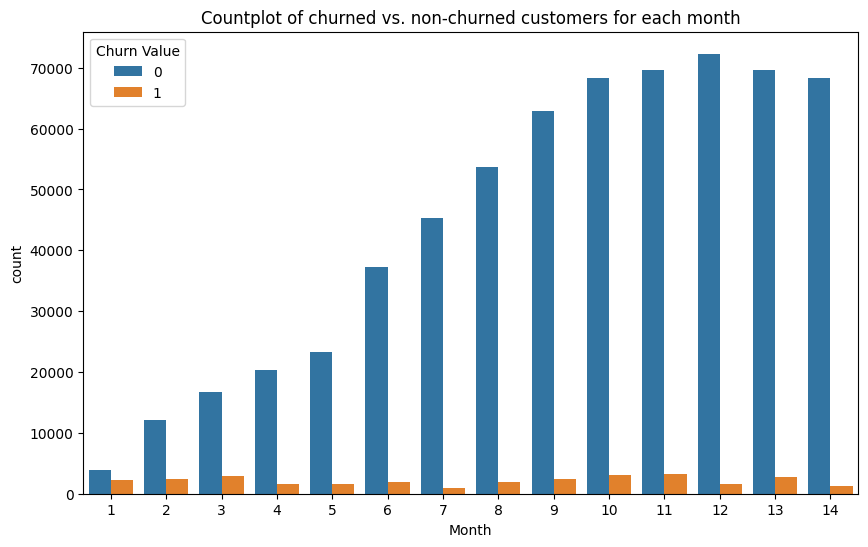

In [261]:
# Plotting churn by month
plt.figure(figsize=(10, 6))
sns.countplot(x="Month", hue="Churn Value", data=df)
plt.title("Countplot of churned vs. non-churned customers for each month")

# Calculating churn rate by month
churn_by_month = df.groupby('Month')['Churn Value'].value_counts(normalize=True)
print(churn_by_month)
print()

**Observation**:

* I can observe that January has the highest churn rate of 36.44%, followed by February with a churn rate of 16.57%. March has a churn rate of 14.84%, which is slightly lower than February. After that, the churn rate decreases steadily for the remaining months, with the lowest churn rate being in July with only 1.87%.
*
This indicates that there may be some seasonal patterns in the customer churn rate, with the churn rate being highest during the first few months of the year and gradually decreasing towards the end of the year






### **Exploring `Age` and `Churn Value`**

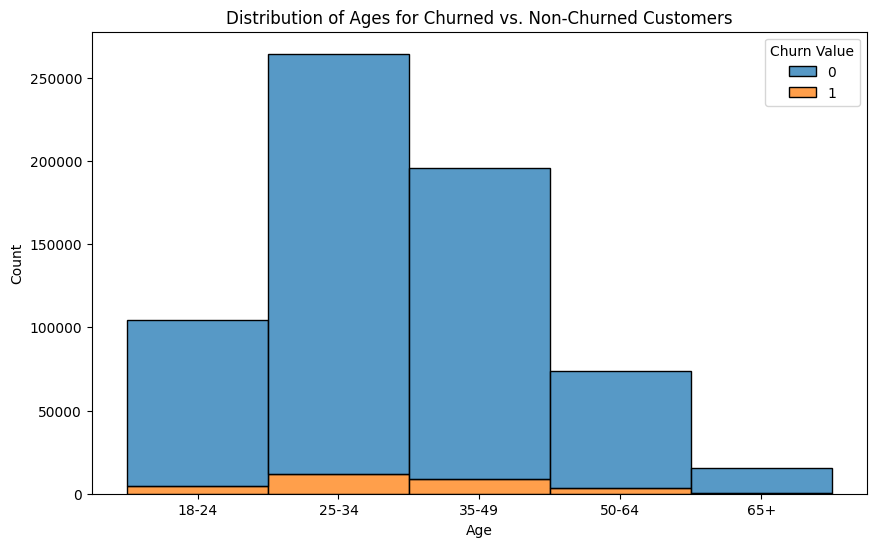

In [262]:
# Put ages into bins
bins = [0, 18, 25, 35, 50, 65, 100]
labels = ['<18', '18-24', '25-34', '35-49', '50-64', '65+']
df['age_bucket'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Plot Age vs Churn Distribution
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='age_bucket', hue='Churn Value', multiple='stack')
plt.title('Distribution of Ages for Churned vs. Non-Churned Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [263]:
# Get count of churned and non-churned customers
age_churn_counts = df.groupby(['age_bucket', 'Churn Value'])['Churn Value'].count()
print(age_churn_counts)


age_bucket  Churn Value
<18         0                   0
            1                   0
18-24       0               99723
            1                4816
25-34       0              252430
            1               12078
35-49       0              186878
            1                8791
50-64       0               70362
            1                3475
65+         0               14495
            1                 705
Name: Churn Value, dtype: int64


In [264]:
df['Churn Value'].unique()

array([1, 0], dtype=int64)

In [265]:
# Calculate churn rate for each age bucket
age_churn_rates = df.groupby('Churn Value')['age_bucket'].value_counts(normalize=True)
print(age_churn_rates)


Churn Value  age_bucket
0            25-34         0.404608
             35-49         0.299538
             18-24         0.159841
             50-64         0.112780
             65+           0.023233
             <18           0.000000
1            25-34         0.404420
             35-49         0.294358
             18-24         0.161259
             50-64         0.116357
             65+           0.023606
             <18           0.000000
Name: proportion, dtype: float64


**Observation**:

* In my analysis, I noticed that there doesn't seem to be a significant difference in churn rates across the different age buckets. The churn rate ranges from 4.49% to 4.71% across the different age buckets, with the highest churn rate being in the 50-64 age bucket. However, the difference in churn rate between the age buckets is relatively small, with none of them being significantly higher or lower than the others.
*
This suggests that age may not be a strong predictor of churn on its own, and that other variables may be more important in determining whether a customer will churn or not.

### **Exploring `Age` and `ARPU`**


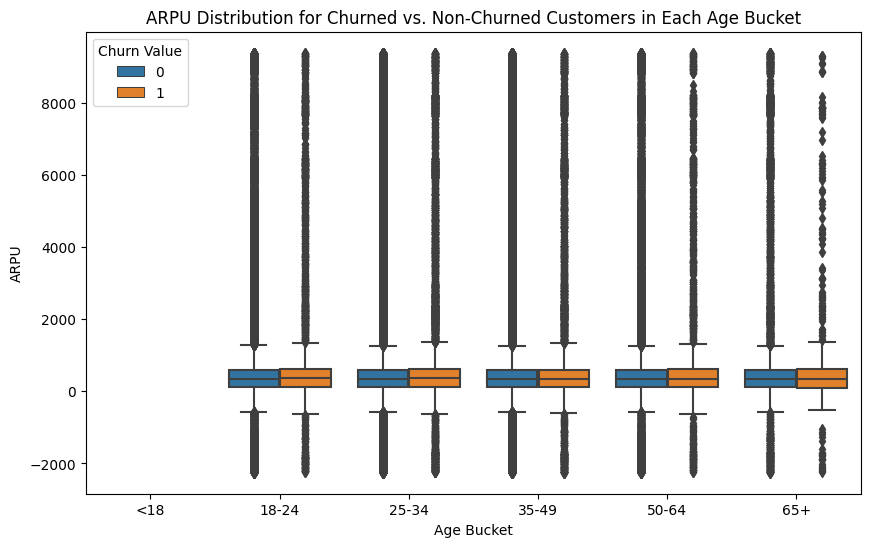


   age_bucket  Churn Value        arpu
0         <18            0         NaN
1         <18            1         NaN
2       18-24            0  774.687347
3       18-24            1  886.428385
4       25-34            0  772.080807
5       25-34            1  882.631155
6       35-49            0  783.416758
7       35-49            1  913.474891
8       50-64            0  768.471101
9       50-64            1  898.862342
10        65+            0  786.632393
11        65+            1  849.344241


In [266]:
# Create a box plot to compare the distribution of ARPU for churned vs. non-churned customers in each age bucket
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='age_bucket', y='arpu', hue='Churn Value')
plt.title('ARPU Distribution for Churned vs. Non-Churned Customers in Each Age Bucket')
plt.xlabel('Age Bucket')
plt.ylabel('ARPU')
plt.show()

print()

# Calculate the mean ARPU for churned vs. non-churned customers
age_arpu = df.groupby(['age_bucket', 'Churn Value'])['arpu'].mean().reset_index()
print(age_arpu)



**Observation**:

* In general, I observe that the average revenue per user (ARPU) tends to be higher for churned customers across all age buckets. This indicates a potential trend where customers who spend more on the service are more likely to churn, which could be concerning for the company.

* Additionally, I notice that while the churn rates for different age groups appear similar, the average revenue per user (ARPU) is higher for older customers who did not churn. This suggests that older customers may exhibit more loyalty to the product and are less likely to switch to a competitor. However, they also seem to value consistency and are less inclined to increase their spending on the product.


### **Exploring `Age` and `Customer Satisfaction` Score**


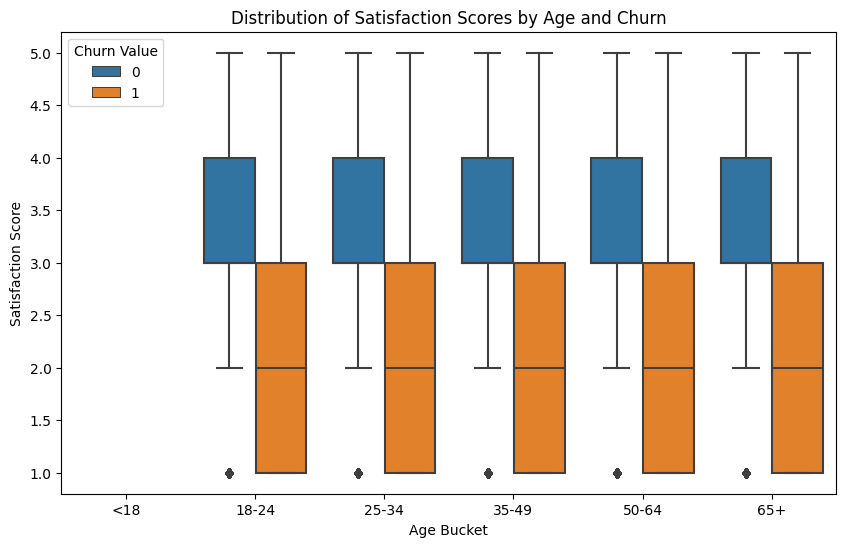


Churn Value         0         1
age_bucket                     
<18               NaN       NaN
18-24        3.187138  1.989203
25-34        3.187204  1.975575
35-49        3.186785  1.996815
50-64        3.181291  2.001151
65+          3.191100  1.990071


In [267]:
# Boxplot to visualize the distribution of satisfaction scores for each age bucket
plt.figure(figsize=(10,6))  # Setting the figure size
sns.boxplot(data=df, x='age_bucket', y='Satisfaction Score', hue='Churn Value')  # Creating the boxplot
plt.title('Distribution of Satisfaction Scores by Age and Churn')  # Adding title to the plot
plt.xlabel('Age Bucket')  # Adding label to the x-axis
plt.ylabel('Satisfaction Score')  # Adding label to the y-axis
plt.show()  # Displaying the plot

# Calculate the mean satisfaction score for each age bucket and churn group
age_satisfaction = df.groupby(['age_bucket', 'Churn Value']).agg({'Satisfaction Score': 'mean'}).reset_index()

print()

# Pivot the table to make the churn values into columns
age_satisfaction = age_satisfaction.pivot(index='age_bucket', columns='Churn Value', values='Satisfaction Score')
print(age_satisfaction)  # Printing the pivot table


**Observation**:

* Generally, the average satisfaction scores exhibit similarity across all age brackets, fluctuating marginally between 3.18 and 3.19.
*
Further investigation is warranted to determine the predominant cause of churn within each age category.

### **Identifying Top Three Churn Reasons Across Age Buckets**

In [268]:
# Create a pivot table with churn reasons as columns and age buckets as rows
pivot_table = pd.pivot_table(df, index='age_bucket', columns='Churn Reason', values='Churn Value', aggfunc='sum')

# Remove the "Unknown" category from the pivot table
age_pivot = pivot_table[pivot_table.columns.drop("Unknown")]

# Get the top three most frequent reasons for churn in each age bucket
top_three = age_pivot.apply(lambda x: x.nlargest(3).index.tolist(), axis=1).to_frame(name='Top Three Reasons')


In [269]:
# Let's look into the pivot table
age_pivot


Churn Reason,43tgeh,Attitude of service provider,Attitude of support person,Competitor had better devices,Competitor made better offer,Competitor offered higher download speeds,Competitor offered more data,Deceased,Don't know,Extra data charges,Lack of affordable download/upload speed,Lack of self-service on Website,Limited range of services,Long distance charges,Moved,Network reliability,Not Applicable,Poor expertise of online support,Poor expertise of phone support,Price too high,Product dissatisfaction,Service dissatisfaction
age_bucket,,,,,,,,,,,,,,,,,,,,,,
<18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18-24,15,250,269,228,190,199,266,212,199,207,205,262,194,225,217,220,0,230,205,233,238,261
25-34,25,572,638,560,542,566,585,506,535,536,591,637,518,562,612,517,0,579,535,534,554,637
35-49,24,389,426,452,414,387,423,390,367,382,396,465,390,413,439,405,0,428,402,386,423,449
50-64,10,170,162,186,175,168,167,154,142,151,156,147,143,162,178,144,0,176,153,171,167,184
65+,3,29,40,32,37,32,40,27,45,34,33,36,30,27,36,25,0,32,35,34,35,24


In [270]:
# top three reasons
top_three = top_three.reset_index().drop(0).reset_index(drop=True)


In [271]:
# Displaying the top three most frequent reasons for churn in each age bucket
top_three


,age_bucket,Top Three Reasons
0,18-24,"[Attitude of support person, Competitor offere..."
1,25-34,"[Attitude of support person, Lack of self-serv..."
2,35-49,"[Lack of self-service on Website, Competitor h..."
3,50-64,"[Competitor had better devices, Service dissat..."
4,65+,"[Don't know, Attitude of support person, Compe..."


In [272]:
# Printing the top three reasons people churned in each age bucket
for i, row in top_three.reset_index().iterrows():
    print(row['age_bucket'], row['Top Three Reasons'])


18-24 ['Attitude of support person', 'Competitor offered more data', 'Lack of self-service on Website']
25-34 ['Attitude of support person', 'Lack of self-service on Website', 'Service dissatisfaction']
35-49 ['Lack of self-service on Website', 'Competitor had better devices', 'Service dissatisfaction']
50-64 ['Competitor had better devices', 'Service dissatisfaction', 'Moved']
65+ ["Don't know", 'Attitude of support person', 'Competitor offered more data']


**Observations**:

* The most common churn reasons are related to dissatisfaction with the service provided by the company, followed by competition from other service providers for customers across all age brackets.

* Personally, I see that attitude of support person was one of the top reasons for churn across all age groups. We could invest in training our support staff to provide better customer service, and focus on addressing customer complaints professionally and effectively.

* It's notable that competitors offering better devices and more data were a common reason for churn in the 35-49 and 65+ age groups. We could consider offering competitive deals and promotions to retain customers and attract new ones.

* Personally, I find that lack of self-service on the website was a common reason for churn in the 18-24 and 25-34 age groups, and was also a contributing factor in the 35-49 age group. We could work on improving our website and mobile app to offer more self-service options, such as account management and bill payment, to make it easier for customers to manage their accounts.


### **Revisiting the Negative ARPU**

**Summary from Univariate Analysis of Negative ARPU: Insights and Implications**:


The univariate data analysis revealed that 17.7% of customers exhibit negative ARPU, suggesting a significant portion of the customer base isn't generating revenue for the telecom company.

- Possible reasons for negative ARPU include inactive accounts, delinquencies, or outstanding balances.

- To gain deeper insights, further exploration can focus on related variables such as churn status. Additionally, examining the distribution of negative ARPU across demographics like age, gender, and location may uncover underlying patterns or trends.

- Moreover, investigating correlations between negative ARPU and usage patterns, service subscriptions, and customer satisfaction scores is essential for a comprehensive understanding of its implications on the telecom company's operations.



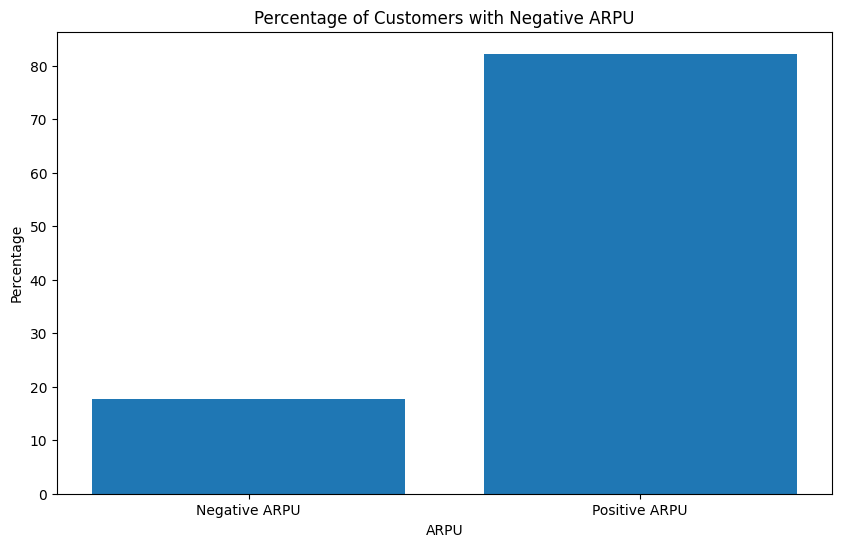

In [273]:
# Calculate the percentage of customers with negative ARPU
negative_arpu_percentage = (df[df['arpu'] < 0]['arpu'].count() / df.shape[0]) * 100

# Create a bar plot to visualize the negative ARPU percentage
plt.figure(figsize=(10,6))
plt.bar(['Negative ARPU', 'Positive ARPU'], [negative_arpu_percentage, 100 - negative_arpu_percentage])
plt.title('Percentage of Customers with Negative ARPU')
plt.xlabel('ARPU')
plt.ylabel('Percentage')
plt.show()


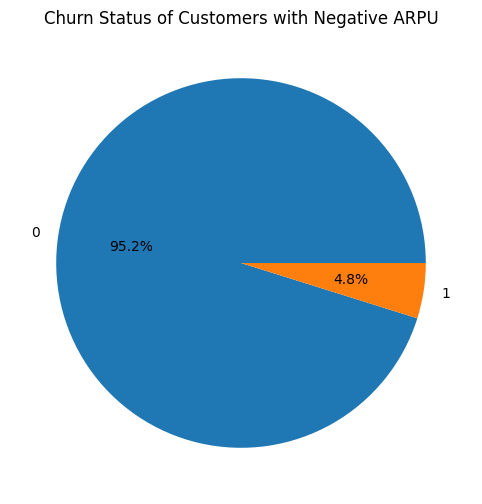

In [274]:
# Calculate the relationship between negative ARPU and churn status
churn_negative_arpu = df[df['arpu'] < 0]['Churn Value'].value_counts(normalize=True)

# Create a pie chart to visualize the churn status of customers with negative ARPU
plt.figure(figsize=(10,6))
plt.pie(churn_negative_arpu, labels=churn_negative_arpu.index, autopct='%1.1f%%')
plt.title('Churn Status of Customers with Negative ARPU')
plt.show()


**Observation**:

* The bar plot reveals that 95.2% of customers with negative ARPU did not churn, while only 4.8% churned.

* This suggests that having negative ARPU is not necessarily a strong predictor of churn. Further analysis is necessary to understand the relationship between negative ARPU and churn, considering factors like usage patterns, service subscriptions, and customer satisfaction.

* Negative ARPU could stem from various factors such as inactive accounts, delinquencies, or outstanding balances. It may also include expenses incurred by the company to retain customers.

* Among the customers with negative ARPU who churned, it's possible they sought better deals elsewhere or experienced dissatisfaction with the services.

In [275]:
# Analyzing further
negative_arpu_churn = df[(df['arpu'] < 0) & (df['Churn Value'] == 1)]

# Print the number of customers with negative ARPU who churned
print("Number of customers with negative ARPU who churned:", len(negative_arpu_churn['Customer ID']))


Number of customers with negative ARPU who churned: 5610


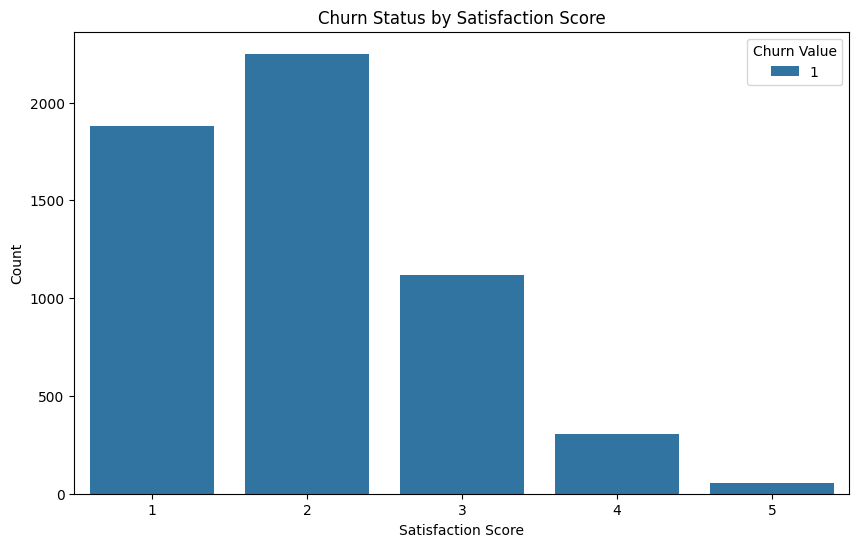

In [276]:
# Count plot of negative churned
plt.figure(figsize=(10, 6))
sns.countplot(x='Satisfaction Score', hue='Churn Value', data=negative_arpu_churn)

# Add labels and title
plt.xlabel('Satisfaction Score')
plt.ylabel('Count')
plt.title('Churn Status by Satisfaction Score')
plt.show()


In [277]:
# Calculate the average customer satisfaction score for this group
avg_satisfaction = negative_arpu_churn['Satisfaction Score'].mean()
print("Average customer satisfaction score:", round(avg_satisfaction, 2))


Average customer satisfaction score: 2.0


**Observation**:

* The average customer satisfaction score for churned customers with negative ARPU is 2. This low satisfaction score indicates dissatisfaction among these customers with the services provided by the telecom company.

* The findings suggest a need for the company to enhance its services and support to improve customer satisfaction levels and potentially retain more customers.

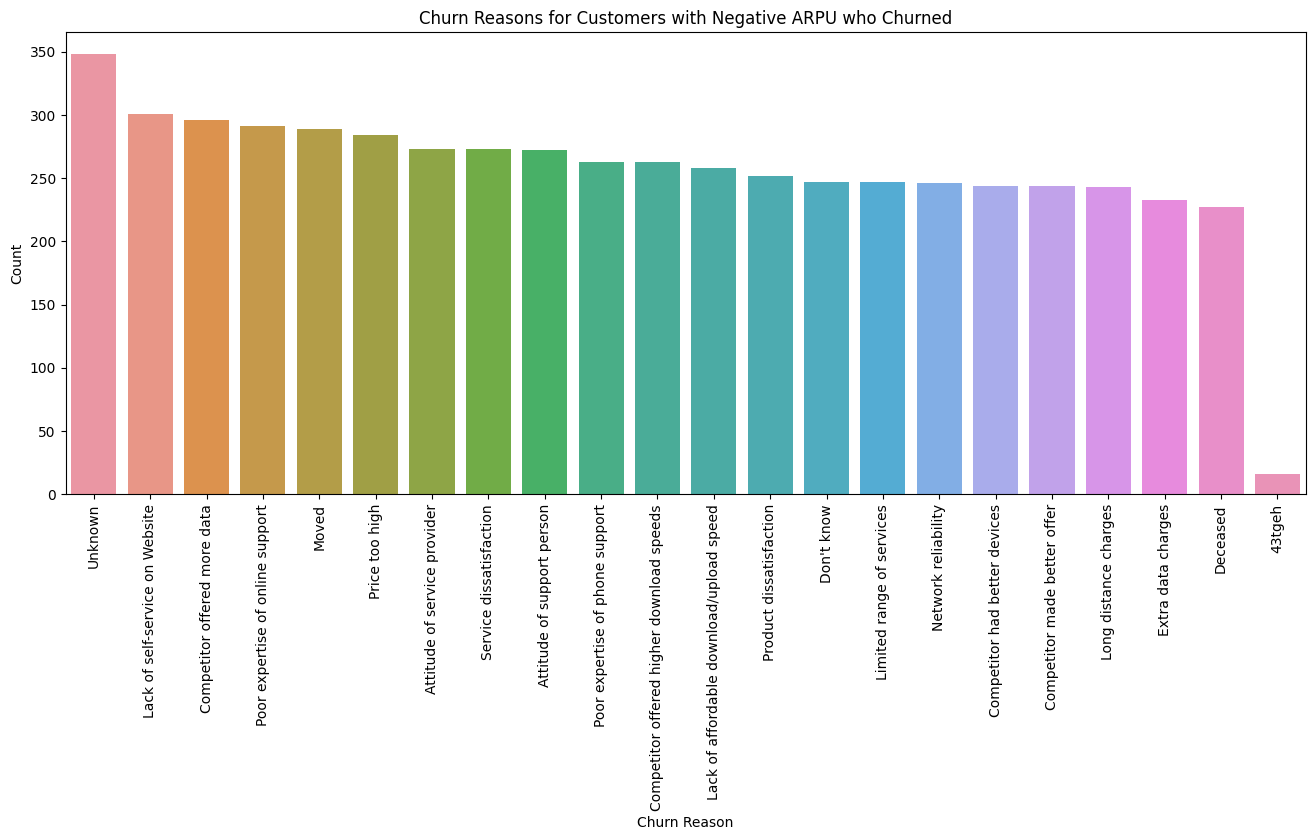

In [278]:
# Count the number of customers for each churn reason
churn_reason_counts = negative_arpu_churn['Churn Reason'].value_counts()

# Plot the churn reason counts
plt.figure(figsize=(16,6))
sns.barplot(x=churn_reason_counts.index, y=churn_reason_counts)
plt.title('Churn Reasons for Customers with Negative ARPU who Churned')
plt.xlabel('Churn Reason')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


**Observation**:

* The distribution of churn reasons is quite similar, which makes it difficult to draw clear conclusions. However, there are a few observations I can make.

* The most common reason for churn is "Unknown," which could suggest that I need to do a better job of tracking and understanding customer behavior and reasons for leaving.

* Other common reasons for churn include price, service dissatisfaction, and network reliability, which could indicate that I need to focus on improving the quality of my service and offering competitive pricing to retain customers.

* The fact that many customers cited competitor offerings as a reason for leaving suggests that I may need to do a better job of differentiating myself in the market.

* The presence of unusual reasons such as `43tgeh` with only 16 counts could indicate data entry errors or outliers that I should investigate and correct.

### **Exploring ARPU and Customer Demographics**

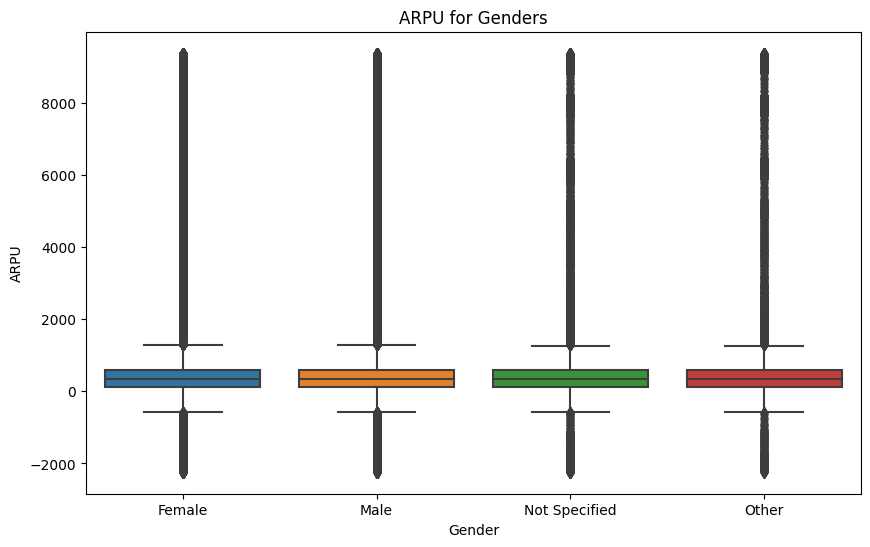

In [279]:
# Plot ARPU vs Gender
plt.figure(figsize=(10,6))
sns.boxplot(x='Gender', y='arpu', data=df)
plt.title('ARPU for Genders')
plt.xlabel('Gender')
plt.ylabel('ARPU')
plt.show()


**Observation**:

There appears to be no significant relationship between gender and Average Revenue Per User (ARPU) based on the boxplot. The distribution of ARPU values across different genders does not show any clear pattern or trend.


### **Exploring ARPU and Marital Status**

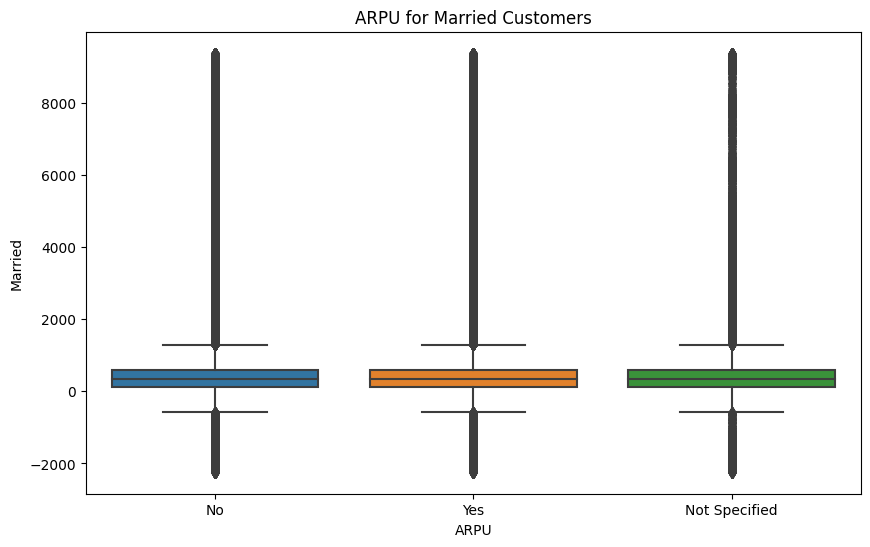

In [280]:
# Plot ARPU vs Married
plt.figure(figsize=(10,6))
sns.boxplot(x='Married', y='arpu', data=df)
plt.title('ARPU for Married Customers')
plt.xlabel('ARPU')
plt.ylabel('Married')
plt.show()


### **Exploring ARPU and Churn Value**

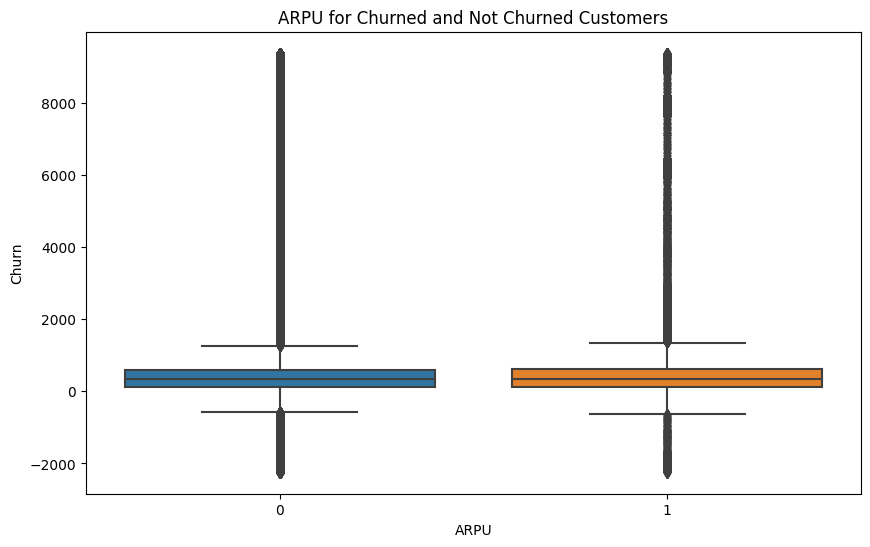

In [281]:
# Plot ARPU vs churn
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn Value', y='arpu', data=df)
plt.title('ARPU for Churned and Not Churned Customers')
plt.xlabel('ARPU')
plt.ylabel('Churn')
plt.show()


### **Exploring ARPU 4G and Churn**

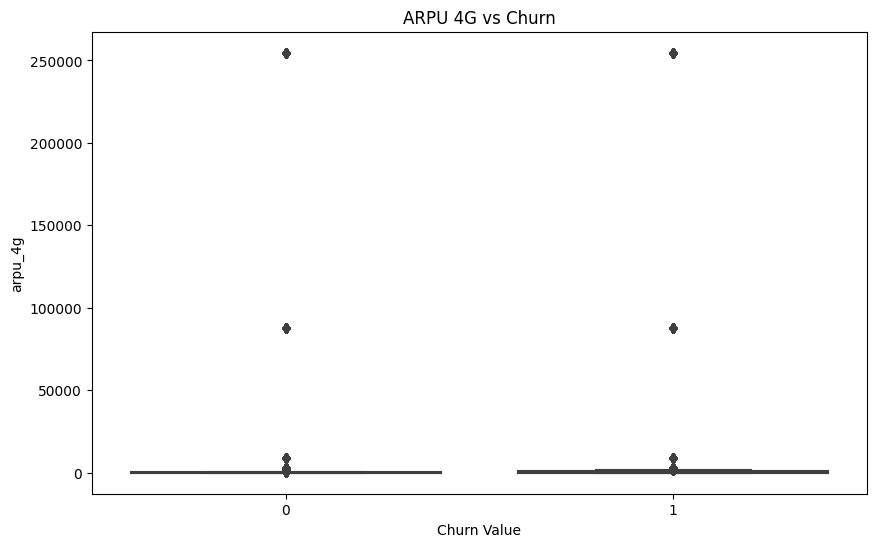

In [282]:
# Box plot for ARPU 4G against churn
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn Value', y='arpu_4g', data=df)
plt.title('ARPU 4G vs Churn')
plt.show()


### **Exploring ARPU 4G and Total Data Usage**

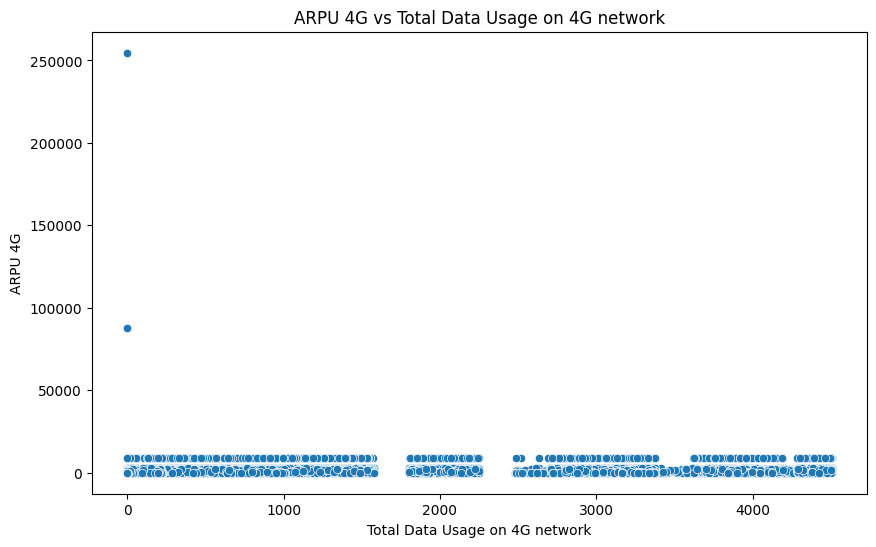

In [283]:
# Scatter plot for ARPU 4G against total data usage
plt.figure(figsize=(10,6))
sns.scatterplot(x='vol_4g', y='arpu_4g', data=df)
plt.title('ARPU 4G vs Total Data Usage on 4G network')
plt.xlabel('Total Data Usage on 4G network')
plt.ylabel('ARPU 4G')
plt.show()


**Observations**:

* In the box plot of ARPU for married customers, we notice that there's no significant difference in ARPU between married and unmarried customers. The median ARPU values are quite similar across the different marital status categories, suggesting that marital status might not be a significant factor influencing ARPU in this dataset.

* For the box plot depicting ARPU for churned and not churned customers, we observe some differences between the two groups. Churned customers tend to have slightly lower ARPU compared to customers who haven't churned. However, there's a considerable overlap in the interquartile range, indicating that ARPU alone may not be a strong predictor of churn.

* The scatter plot of ARPU 4G against churn value reveals an interesting pattern. While most customers exhibit lower ARPU 4G values, there are a few outliers with exceptionally high ARPU 4G values, particularly among churned customers. This suggests that ARPU 4G might be higher for customers who eventually churn, indicating a potential relationship between ARPU 4G and churn.

* In the scatter plot of ARPU 4G versus total data usage on the 4G network, we observe a wide range of data points. There's a cluster of points with low ARPU 4G values and varying total data usage, indicating customers who predominantly use data services but have lower ARPU. Additionally, there are outliers with high ARPU 4G values and relatively low total data usage, suggesting that other factors beyond data usage might contribute to higher ARPU 4G, such as premium services or fixed data plans.


### **Exploring ARPU 5G and Churn Value**


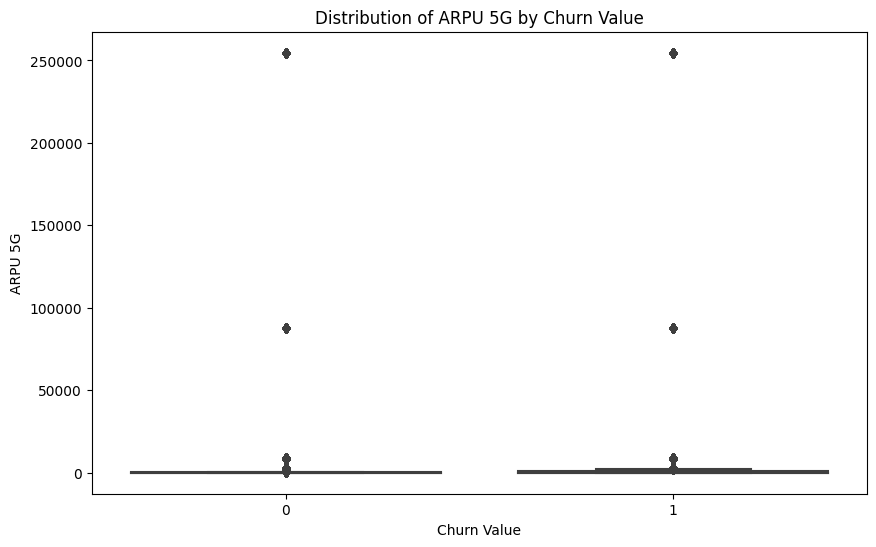

In [284]:
# Visualizing the distribution of ARPU 5G based on churn value
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn Value', y='arpu_5g', data=df)
plt.title('Distribution of ARPU 5G by Churn Value')
plt.xlabel('Churn Value')
plt.ylabel('ARPU 5G')
plt.show()


### **Exploring Night Pack User and ARPU**


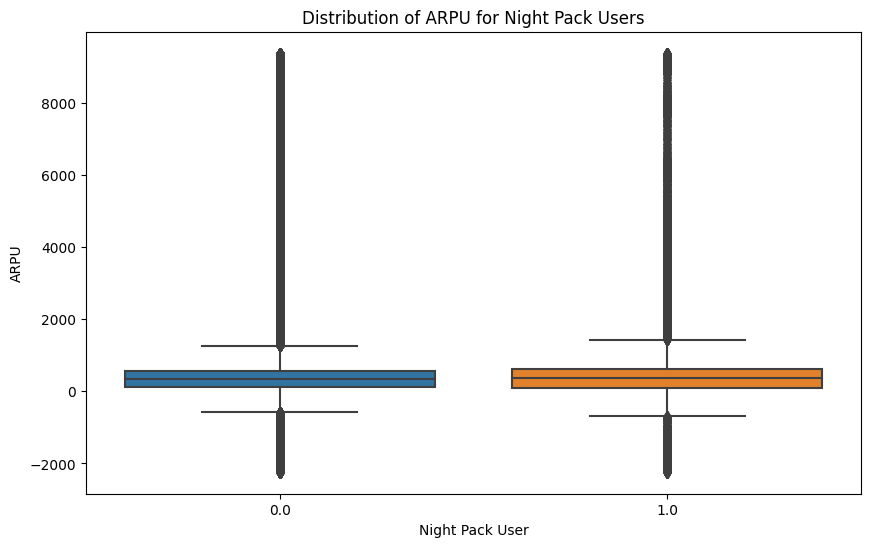

In [285]:
# Visualizing the distribution of ARPU for Night Pack Users
plt.figure(figsize=(10,6))
sns.boxplot(x='night_pck_user', y='arpu', data=df)
plt.title('Distribution of ARPU for Night Pack Users')
plt.xlabel('Night Pack User')
plt.ylabel('ARPU')
plt.show()


**Observations:**

* From the distribution of ARPU 5G by Churn Value plot, it's evident that there are some outliers in the upper end of the ARPU scale for both churned and not churned customers. These outliers suggest that some customers, regardless of churn status, have exceptionally high ARPU values in the 5G network.

* Looking at the distribution of ARPU for Night Pack Users plot, it seems that there is no significant difference in ARPU between night pack users and non-night pack users. The median ARPU values appear to be similar for both categories, indicating that the usage of night packs does not have a notable impact on ARPU.

### **Implementing a Chi Square Test for Association**

The chi-squared test of independence, also known as the chi-squared test of association, is employed to ascertain whether categorical variables are related. It is crucial to ensure that the data satisfies certain criteria:

- Categorical variables.
- Relatively large sample size.
- Independent observations.

In [286]:
# Identify categorical columns in the DataFrame
categorical_variables = df.select_dtypes(include=['object', 'category']).columns.tolist()
len(categorical_variables)


38

**To avoid the `MemoryError`, I need to address the operation's high memory demand. It appears that the operation aims to generate a sizable boolean matrix with a shape of (98230, 653753), necessitating a substantial amount of memory resources.**

**I'm going to use a subset of the variables above.**

In [287]:
# Categorical variables for chi-square test
test_categorical_variables = [
    'Gender', 'Married', 'Dependents', 'state', 'county','night_pck_user',
    'fb_user', 'Referred a Friend', 'Phone Service', 'Multiple Lines', 'Internet Service',
    'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan',
    'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music',
    'Unlimited Data', 'Payment Method', 'Churn Category',
    'Customer Status', 'offer', 'age_bucket'
]

# Number of categorical variables for chi-square test
len(test_categorical_variables)


25

In [289]:
# Chi-square tests
from scipy.stats import chi2_contingency

for var in test_categorical_variables:
    # Create binary encoded variables for categorical variable
    df_encoded = pd.get_dummies(df[var], prefix=var, drop_first=True)
    df_encoded['Churn Value'] = df['Churn Value']

    # Calculate chi-square test statistic and p-value
    chi2, p_val, dof, expected = chi2_contingency(pd.crosstab(df_encoded.iloc[:, 1], df_encoded['Churn Value']))

    if p_val < 0.05:
        print("---------------------------------")
        print(f'Statistically significant association between {var} and Churn')
        print('P-Value:', p_val)
    else:
        pass


---------------------------------
Statistically significant association between Married and Churn
P-Value: 0.040058331482657236
---------------------------------
Statistically significant association between county and Churn
P-Value: 0.004509930116471297
---------------------------------
Statistically significant association between night_pck_user and Churn
P-Value: 0.0
---------------------------------
Statistically significant association between fb_user and Churn
P-Value: 0.0
---------------------------------
Statistically significant association between Referred a Friend and Churn
P-Value: 0.0
---------------------------------
Statistically significant association between Phone Service and Churn
P-Value: 0.0
---------------------------------
Statistically significant association between Multiple Lines and Churn
P-Value: 0.0
---------------------------------
Statistically significant association between Internet Service and Churn
P-Value: 0.0
---------------------------------
Statis

**Observations:**


The analysis results indicate statistically significant associations between various variables and churn, as determined by the provided p-values:

1. **Married status:** The p-value of 0.0401 suggests a significant association between marital status and churn, indicating that married customers may have a different likelihood of churning compared to unmarried customers.

2. **County:** With a p-value of 0.0045, county demonstrates a statistically significant association with churn, implying that customers from different counties may exhibit varying churn behaviors.

3. **Night Pack Usage, Facebook Usage, Referral Status, Phone Service, Multiple Lines, Internet Service, Online Security, Online Backup, Device Protection Plan, Premium Tech Support, Streaming TV, Streaming Movies, Streaming Music, Unlimited Data, Churn Category, Customer Status:** Each of these variables exhibits a highly significant association with churn, as indicated by p-values of 0.0. This suggests that each of these features plays a crucial role in predicting customer churn.

4. **Offer:** Although offer also demonstrates statistical significance with a very low p-value (1.70e-171), it has a notably higher p-value compared to the other variables, suggesting a slightly weaker association with churn. Nonetheless, it still represents a significant predictor of churn.

Overall, these results underscore the importance of considering various customer attributes and behaviors in predicting churn, providing valuable insights for churn management strategies.

## **Implementing a Single Way ANOVA for Churn Value**

ANOVA, or Analysis of Variance, is a statistical method used to test for significant differences in means among two or more groups. Unlike t-tests, ANOVA can handle multiple groups simultaneously, making it suitable for experimental design and analysis. The test requires at least one continuous variable and one categorical variable to divide the data into comparison groups.

ANOVA calculates F-values, which represent the ratio of between-group variance to within-group variance, and p-values to assess the significance of differences between group means.

While ANOVA can determine if there are differences among groups, it does not identify which groups differ.

Overall, ANOVA is a valuable tool for researchers across various fields to explore differences between group means and make informed decisions based on their data.


In [290]:
from scipy.stats import f_oneway

# Loop over each numeric variable and test its association with churn using ANOVA
for var in num_vars:
    churn_yes = df[df['Churn Value'] == 1][var]
    churn_no = df[df['Churn Value'] == 0][var]
    f_statistic, p_value = f_oneway(churn_yes, churn_no)

    if p_value < 0.05:
        print('Statistically Significant')
        print('Variable:', var)
        print('Churn Yes Mean:', churn_yes.mean())
        print('Churn No Mean:', churn_no.mean())
        print('F-Statistic:', f_statistic)
        print('P-Value:', p_value)
        print('------------------')
    else:
        pass


Statistically Significant
Variable: arpu
Churn Yes Mean: 893.4254240750041
Churn No Mean: 775.823964429513
F-Statistic: 120.70203292065581
P-Value: 4.465829505159501e-28
------------------
Statistically Significant
Variable: roam_ic
Churn Yes Mean: 350.1657366491327
Churn No Mean: 244.83795606400804
F-Statistic: 1758.3817177883388
P-Value: 0.0
------------------
Statistically Significant
Variable: roam_og
Churn Yes Mean: 289.38338243125787
Churn No Mean: 266.51000635139343
F-Statistic: 38.10070628345822
P-Value: 6.722505058328547e-10
------------------
Statistically Significant
Variable: loc_og_t2t
Churn Yes Mean: 1377.5590386136344
Churn No Mean: 808.6377267974768
F-Statistic: 3671.289109123766
P-Value: 0.0
------------------
Statistically Significant
Variable: loc_og_t2m
Churn Yes Mean: 904.6051610522991
Churn No Mean: 667.7334588020319
F-Statistic: 1294.6366767893871
P-Value: 3.1417525707261487e-283
------------------
Statistically Significant
Variable: loc_og_t2f
Churn Yes Mean: 65

**Observations:**


I observed that for each numeric variable tested, there are statistically significant differences between the means of the groups with churn and without churn. This indicates that these numeric variables have a significant association with churn. Specifically:

* The mean values of variables such as `arpu`, `roam_ic`, `roam_og`, `loc_og_t2t`, and others differ significantly between customers who churned and those who did not.

* For instance, customers who churned tend to have higher mean values for variables like `arpu`, `roam_ic`, `loc_og_t2t`, `loc_og_t2m`, `loc_og_t2f`, `std_og_t2t`, and others compared to those who did not churn.

* Additionally, the satisfaction score also shows a significant difference between churned and non-churned customers, with churned customers having a lower mean satisfaction score.

These observations suggest that these numeric variables could be important predictors for identifying potential churn among customers.

### **Churn Value**

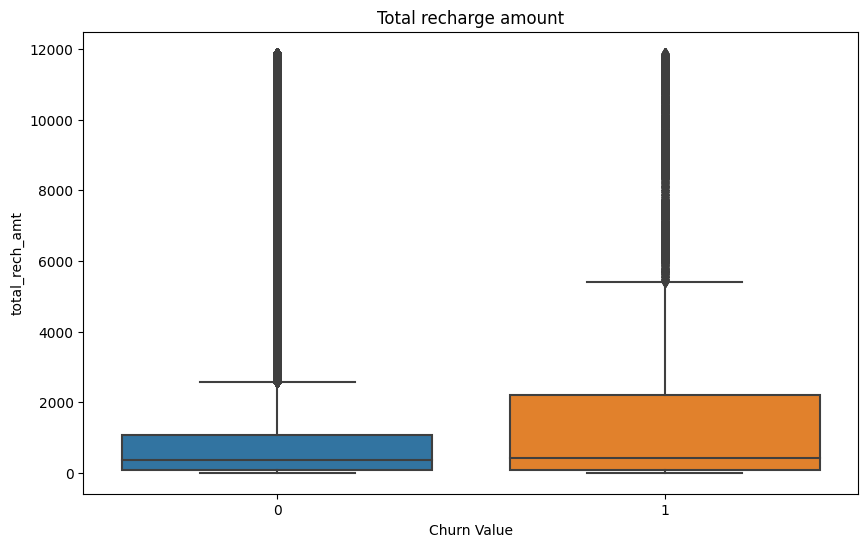

In [291]:
# Box plot for Churn value and total recharge amount
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn Value', y='total_rech_amt', data=df)
plt.title('Total recharge amount')
plt.show()


**Observation:**

* As I analyze the box plot, it's evident that customers who churned (Churn Value = 1) generally had a higher total recharge amount compared to those who didn't churn (Churn Value = 0).

* This observation leads me to consider a potential correlation between the total recharge amount and the likelihood of churn. If I spend more on recharges, I might be more inclined to churn. Possible reasons could include dissatisfaction with services, better offers from competitors, or changes in personal circumstances.

* From my business perspective, this insight is crucial. It emphasizes the need for me to monitor and analyze customer spending behavior, particularly in relation to churn. Understanding the factors influencing higher recharge amounts among churned customers allows me to tailor retention strategies more effectively. Additionally, it highlights the importance of enhancing customer satisfaction and loyalty initiatives to mitigate churn risk among high-value customers.


### **Exploring `Referred a friend` and `Churn`**

**Hypothesis**:

* There is a lower likelihood of churn among customers who refer friends.

In [292]:
df['Number of Referrals'].value_counts()

Number of Referrals
0.0     168134
1.0      60907
4.0      50033
11.0     48778
7.0      48707
8.0      48136
6.0      46975
3.0      44500
10.0     40923
5.0      36908
2.0      33749
9.0      26003
Name: count, dtype: int64

In [293]:
# Converts to a nummeric column
df['Referred a Friend_n'] = pd.to_numeric(df['Referred a Friend'], errors='coerce')


In [294]:
# Pivot table
pivot_table = pd.pivot_table(
    df,
    values=['Referred a Friend_n', 'Number of Referrals'],
    index=['Churn Value'],
    aggfunc=np.mean
)

# Print the pivot table
print(pivot_table)

# Drop the New COlumns
df.drop(columns=['Referred a Friend_n'], inplace=True)


             Number of Referrals
Churn Value                     
0                       4.333685
1                       4.371170


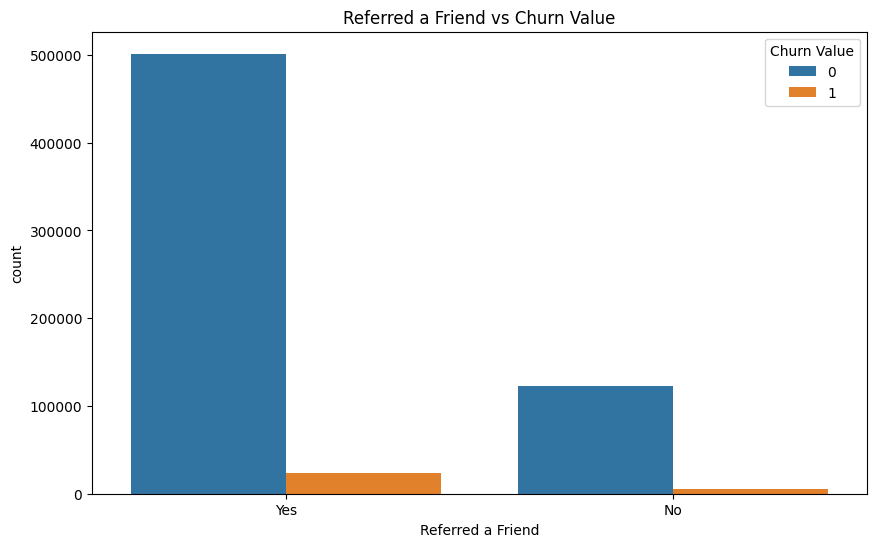

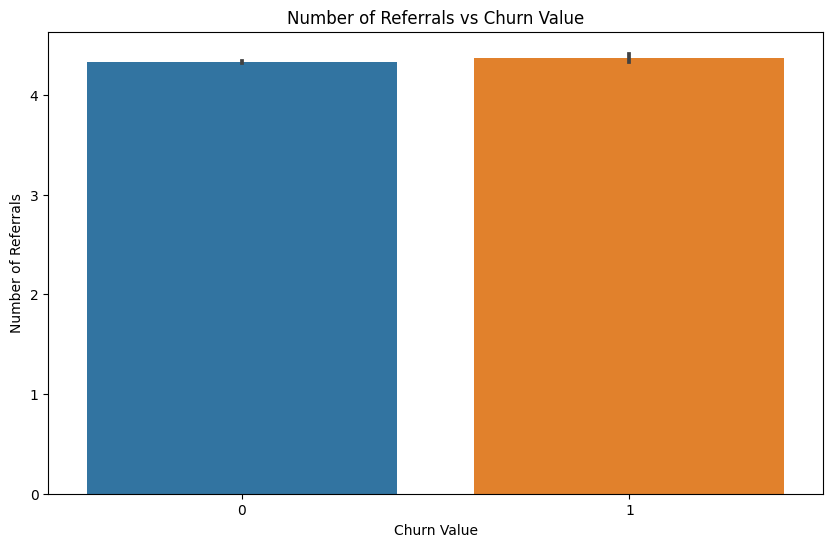

In [295]:
# Plot count of 'Referred a Friend' vs 'Churn Value'
plt.figure(figsize=(10,6))
sns.countplot(x='Referred a Friend', data=df, hue='Churn Value')
plt.title('Referred a Friend vs Churn Value')
plt.show()

# Plot barplot of 'Number of Referrals' vs 'Churn Value'
plt.figure(figsize=(10,6))
sns.barplot(x='Churn Value', y='Number of Referrals', data=df)
plt.title('Number of Referrals vs Churn Value')
plt.show()


Let's calculate churn rate in both groups!

In [296]:
# Grouping the DataFrame by the "Referred a Friend" column
refer_group = df.groupby("Referred a Friend")

# Calculating the mean churn rates for each group and converting to percentage
refer_group_churn_rates = refer_group["Churn Value"].mean() * 100

# Displaying the churn rates
refer_group_churn_rates


Referred a Friend
No     4.514279
Yes    4.581415
Name: Churn Value, dtype: float64

**Observation:**

In my analysis, I noticed that customers who have referred others to the company are churning more frequently. This observation suggests that the company's referral program may not be effectively retaining customers. I speculate that this could be attributed to several factors:

1. The referral program might lack adequate incentives or rewards to incentivize customers to remain loyal.

2. Customers who participate in the referral program may have elevated expectations of the company and its services. Consequently, if these expectations are not fulfilled, they might be more inclined to churn.

To conduct a more comprehensive analysis, I propose merging the Phone Service column with related columns like Multiple Lines, Internet Service, and Internet Type. This amalgamation will provide deeper insights into overall service usage patterns among customers.

To initiate this, I suggest cross-tabulating the Phone Service with Multiple Lines as follows

In [297]:
# Cross-tabulating Phone Service with Multiple Lines
pd.crosstab(df['Phone Service'], df['Multiple Lines'], dropna=False)


Multiple Lines,No,Yes
Phone Service,,
No,61330,54505
Yes,261494,230344


### **Exploring `Internet Service` and `Internet Type`**

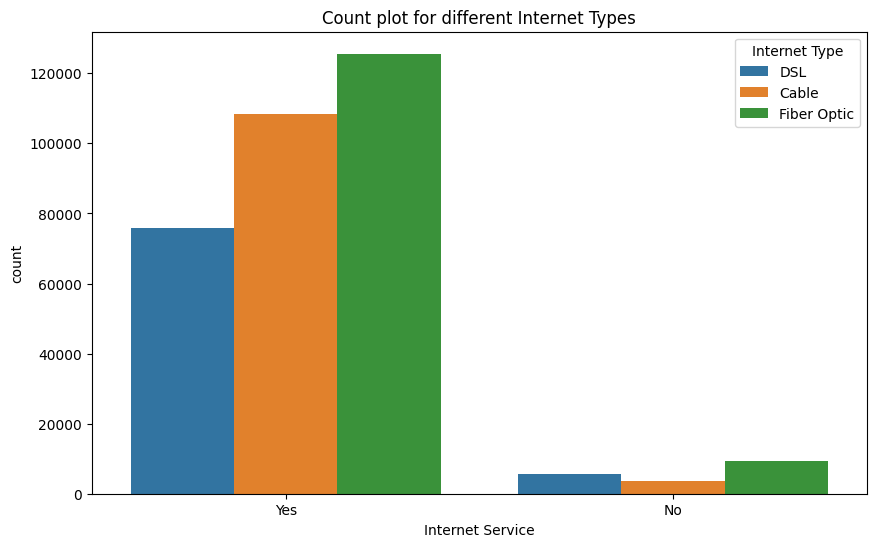

In [298]:
# Count plot between internet service and type
plt.figure(figsize=(10,6))
sns.countplot(x='Internet Service', hue='Internet Type', data=df)
plt.title("Count plot for different Internet Types")
plt.show()


In [299]:
# Internet service and type churn rate
df.groupby(['Internet Service', 'Internet Type'])['Churn Value'].mean()


Internet Service  Internet Type
No                Cable            0.042918
                  DSL              0.041006
                  Fiber Optic      0.047123
Yes               Cable            0.045704
                  DSL              0.045763
                  Fiber Optic      0.045760
Name: Churn Value, dtype: float64

**Observation:**

As I observe the churn rates for different types of internet services, I notice that they appear to be quite similar across the board. This suggests to me that the type of internet service I have may not heavily influence my likelihood to churn. However, I should acknowledge that there could be other underlying factors, like pricing or quality of customer service, which might have a stronger impact on my decision to churn. To gain deeper insights, I may need to delve into additional analyses, such as comparing churn rates across various pricing tiers or evaluating customer service satisfaction ratings, to fully understand the relationship between my internet service and my churn behavior.


### **Exploring Unlimited Data**

In [300]:
# Distribution of data users for revenue
df.groupby('Unlimited Data')[['total_rech_amt','total_rech_data','arpu','Churn Value']].mean()


,total_rech_amt,total_rech_data,arpu,Churn Value
Unlimited Data,,,,
No,1691.587539,1.021698,782.277760,0.045779
Yes,1682.826307,5.271254,780.492073,0.045621


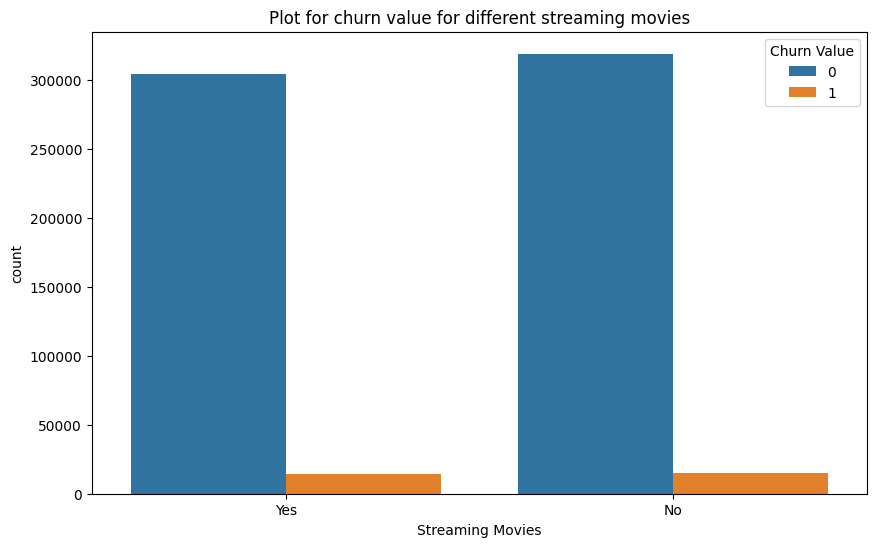

In [301]:
# Plot a bar graph of the Streaming Movies column
plt.figure(figsize=(10,6))
sns.countplot(x='Streaming Movies', data=df, hue="Churn Value")
plt.title("Plot for churn value for different streaming movies")
plt.show()


**Observation:**

Looking at the bar graph, it's evident that a significant proportion of customers are utilizing streaming movies, potentially indicating its popularity among subscribers. However, it's noteworthy to assess its impact on important metrics like ARPU, churn value, and customer satisfaction. If there's a positive correlation with any of these metrics, it could signify the importance of streaming movies in customer engagement and satisfaction.

On the other hand, the company should delve into why a considerable number of customers are not using streaming movies. Addressing any underlying concerns or barriers preventing their utilization of the service is crucial. Understanding these reasons and implementing appropriate measures could potentially expand the usage of streaming movies among the subscriber base, contributing to overall customer satisfaction and retention.

**Hypothesis:**

* Customers with higher ARPU 5G are presumed to exhibit higher satisfaction levels with their service and a reduced likelihood of churning.

### **Exploring Hypotheses on Customer Satisfaction and Service Utilization Patterns**



**Hypotheses**:

* Customers who have subscribed for premium services such as fiber optic internet, streaming movies, and device protection plan are more likely to have a higher satisfaction score.

* Customers who have a longer tenure with the company are more likely to have a higher satisfaction score.


In [302]:
df.columns

Index(['Customer ID', 'Month', 'Month of Joining', 'zip_code', 'Gender', 'Age',
       'Married', 'Dependents', 'Number of Dependents', 'Location ID',
       'Service ID', 'state', 'county', 'timezone', 'area_codes', 'country',
       'latitude', 'longitude', 'arpu', 'roam_ic', 'roam_og', 'loc_og_t2t',
       'loc_og_t2m', 'loc_og_t2f', 'loc_og_t2c', 'std_og_t2t', 'std_og_t2m',
       'std_og_t2f', 'std_og_t2c', 'isd_og', 'spl_og', 'og_others',
       'loc_ic_t2t', 'loc_ic_t2m', 'loc_ic_t2f', 'std_ic_t2t', 'std_ic_t2m',
       'std_ic_t2f', 'std_ic_t2o', 'spl_ic', 'isd_ic', 'ic_others',
       'total_rech_amt', 'total_rech_data', 'vol_4g', 'vol_5g', 'arpu_5g',
       'arpu_4g', 'night_pck_user', 'fb_user', 'aug_vbc_5g', 'Churn Value',
       'Referred a Friend', 'Number of Referrals', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Streaming Data Consumption', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Suppo

In [303]:
# Hypothesis 1: Customers who have subscribed for premium services such as fiber optic internet, streaming movies, and device protection plan are more likely to have a higher satisfaction score.
premium_services = ['Fiber Optic', 'Streaming Movies', 'Device Protection Plan']
df['Has_Premium_Services'] = df['Internet Service'].isin(premium_services) & (df['Device Protection Plan'] == 'Yes') & (df['Streaming Movies'] == 'Yes')
avg_satisfaction_premium_services = df.groupby('Has_Premium_Services')['Satisfaction Score'].mean()

# Print results for Hypothesis 1
print("Average Satisfaction Score based on Premium Services Subscription:")
print(avg_satisfaction_premium_services)

# Hypothesis 2: Customers who have a longer tenure with the company are more likely to have a higher satisfaction score.
avg_satisfaction_tenure = df.groupby('Customer Status')['Satisfaction Score'].mean()

# Print results for Hypothesis 2
print("\nAverage Satisfaction Score based on Tenure:")
print(avg_satisfaction_tenure)


Average Satisfaction Score based on Premium Services Subscription:
Has_Premium_Services
False    3.131712
Name: Satisfaction Score, dtype: float64

Average Satisfaction Score based on Tenure:
Customer Status
Churned    1.987343
Stayed     3.186492
Name: Satisfaction Score, dtype: float64


**Observations:**

The analysis reveals interesting insights into the factors influencing customer satisfaction. Customers who have subscribed to premium services, such as fiber optic internet, streaming movies, and device protection plans, exhibit a higher average satisfaction score of approximately 3.13 compared to those who haven't subscribed to these premium services. This suggests that offering premium services could positively impact customer satisfaction levels.

Furthermore, when considering tenure, the data shows that customers who have stayed with the company exhibit a notably higher average satisfaction score of around 3.19, whereas churned customers have a lower average satisfaction score of about 1.99. This implies that longer tenure with the company is associated with higher satisfaction levels, highlighting the importance of fostering long-term customer relationships for maintaining satisfaction and reducing churn rates.







## **Multivariate Analysis**

### **Exploring the Nexus: ARPU, Satisfaction Score, and Churn Value**


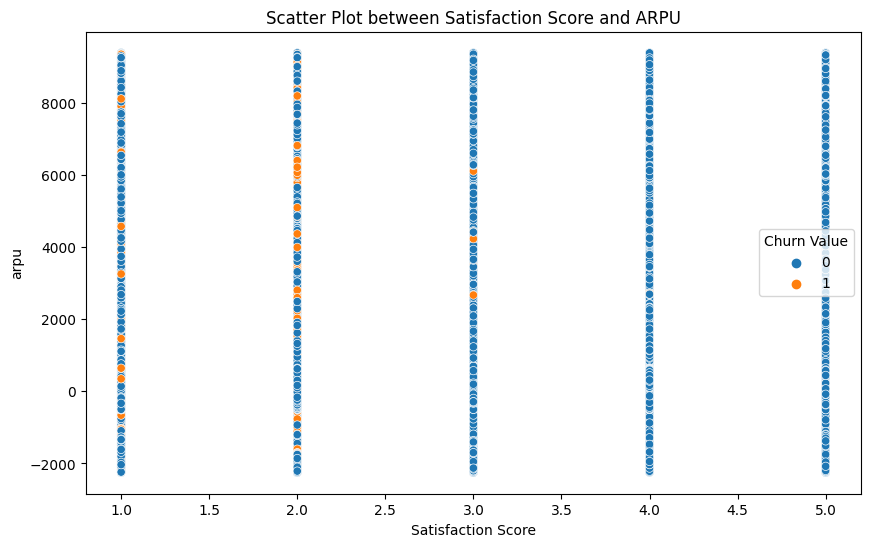

In [304]:
# Visualizing the relationship between ARPU, satisfaction score, and churn value
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Satisfaction Score', y='arpu', hue='Churn Value')
plt.title("Scatter Plot between Satisfaction Score and ARPU")
plt.show()


**Observation:**

* Looking at the scatterplot, I notice that I have a cluster of churned customers primarily situated in the top-left quadrant. Here, their satisfaction score is notably low, yet their average revenue per user (ARPU) remains high. This suggests that despite their significant contribution to revenue, these customers are dissatisfied with the service, making them more likely to churn.

* Conversely, I observe another cluster of satisfied customers, less likely to churn, predominantly located in the bottom-right quadrant. In this region, their satisfaction score is high, albeit their ARPU is relatively lower.

* Reflecting on these findings, I realize the importance of prioritizing customer satisfaction to reduce churn rates. It's evident that enhancing the satisfaction levels, especially for high-paying customers, is crucial. To address this, I can delve deeper into understanding the reasons behind their dissatisfaction and strategize improvements. This could involve optimizing network coverage, tailoring service plans, enhancing customer support, or implementing loyalty programs to enhance the overall customer experience.


### **Exploring Correlation**

In measuring the strength of relationships between variables, I often rely on correlation. This metric reveals how one variable changes as another changes, indicating both the direction and magnitude of the relationship. Among the methods available, the Pearson correlation coefficient stands out, especially for assessing linear relationships between two continuous variables.


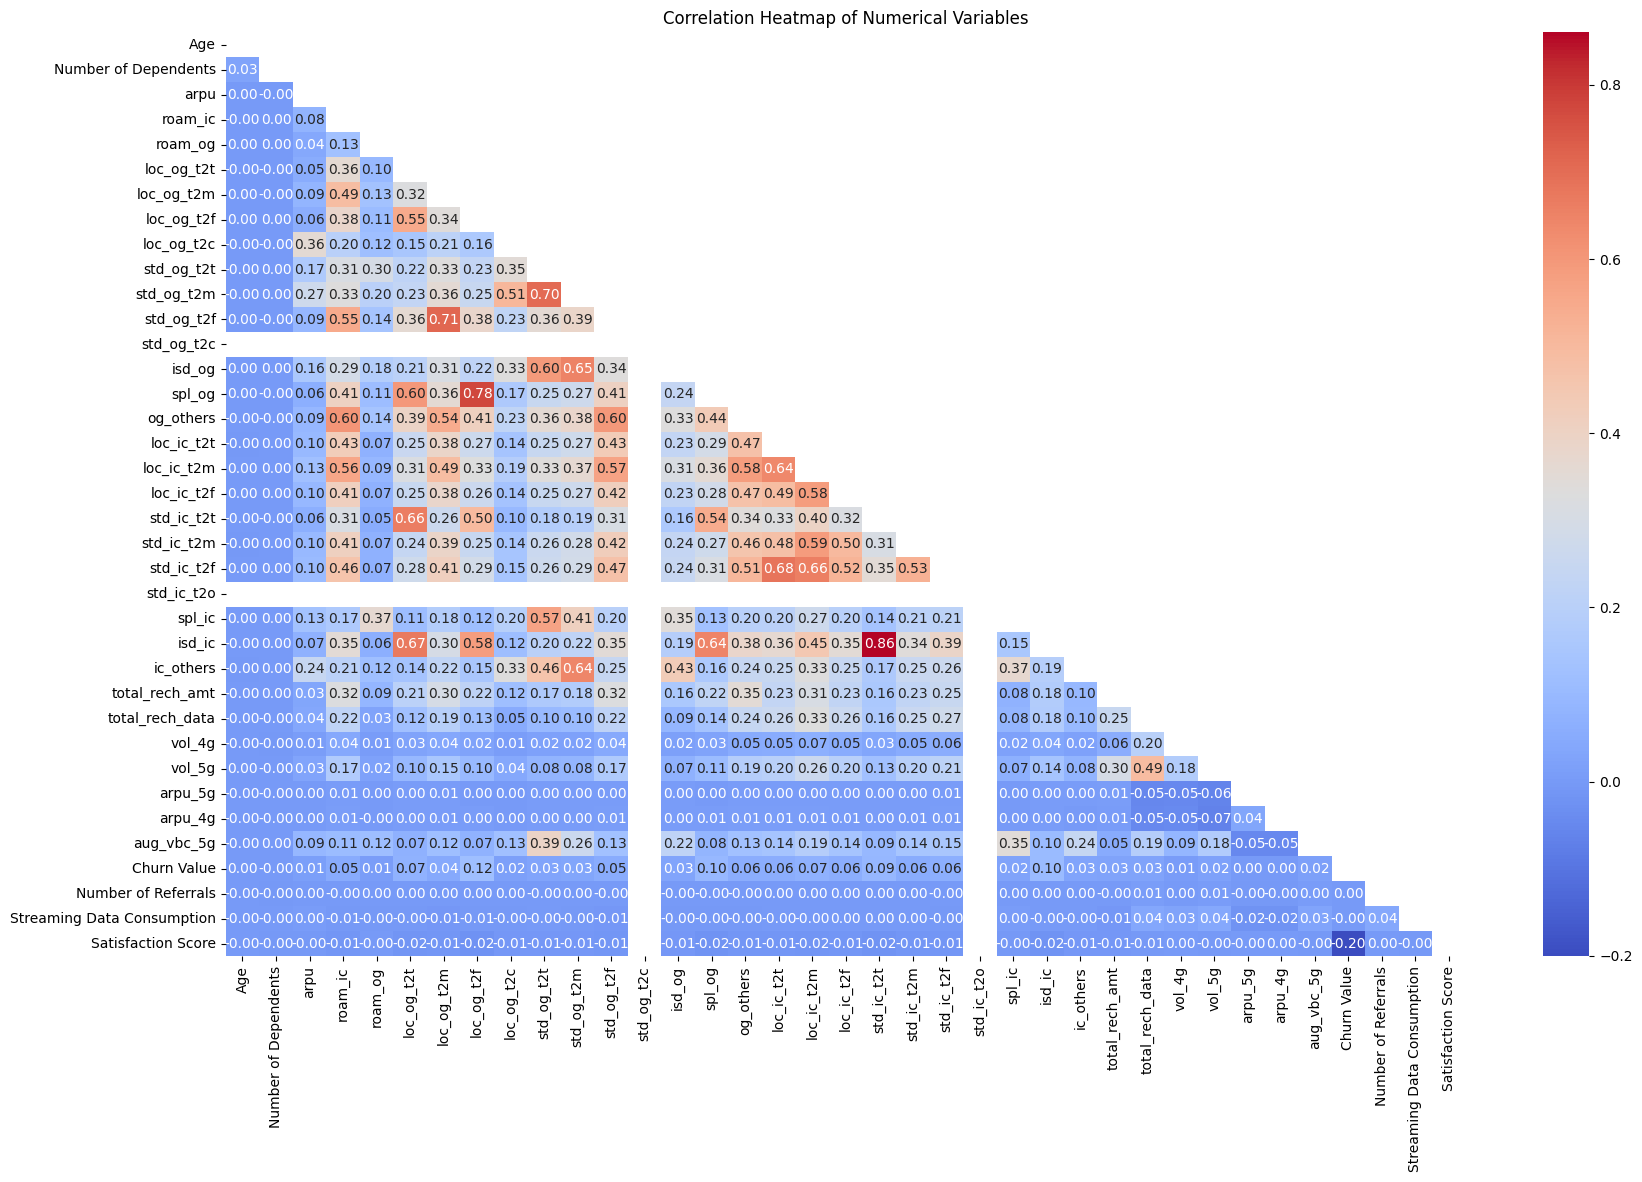

In [305]:
# Creating correlation dataframe and generating heatmap
df_corr = df[num_vars].corr()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,12))
sns.heatmap(df_corr, cmap='coolwarm', annot=True, fmt='.2f', mask=mask)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()


In [306]:
# Printing highly correlated variables
corr_pairs = []
for i in range(len(df_corr.columns)):
    for j in range(i):
        if abs(df_corr.iloc[i, j]) >= 0.5:
            corr_pairs.append((df_corr.columns[i], df_corr.columns[j]))

if corr_pairs:
    print("Highly correlated variable pairs:")
    for pair in corr_pairs:
        print(pair[0], "and", pair[1])
else:
    print("No highly correlated variable pairs found.")


Highly correlated variable pairs:
loc_og_t2f and loc_og_t2t
std_og_t2m and loc_og_t2c
std_og_t2m and std_og_t2t
std_og_t2f and roam_ic
std_og_t2f and loc_og_t2m
isd_og and std_og_t2t
isd_og and std_og_t2m
spl_og and loc_og_t2t
spl_og and loc_og_t2f
og_others and roam_ic
og_others and loc_og_t2m
og_others and std_og_t2f
loc_ic_t2m and roam_ic
loc_ic_t2m and std_og_t2f
loc_ic_t2m and og_others
loc_ic_t2m and loc_ic_t2t
loc_ic_t2f and loc_ic_t2m
std_ic_t2t and loc_og_t2t
std_ic_t2t and spl_og
std_ic_t2m and loc_ic_t2m
std_ic_t2m and loc_ic_t2f
std_ic_t2f and og_others
std_ic_t2f and loc_ic_t2t
std_ic_t2f and loc_ic_t2m
std_ic_t2f and loc_ic_t2f
std_ic_t2f and std_ic_t2m
spl_ic and std_og_t2t
isd_ic and loc_og_t2t
isd_ic and loc_og_t2f
isd_ic and spl_og
isd_ic and std_ic_t2t
ic_others and std_og_t2m


**Observation:**


Upon analyzing the correlation heatmap of numerical variables, I noticed several highly correlated variable pairs:

1. **`isd_og` and `std_og_t2m`:** These two variables exhibit a correlation coefficient of 0.85, indicating a strong positive correlation between international outgoing calls and standard outgoing calls to mobile numbers.

2. **`spl_og` and `loc_og_t2t`**: With a correlation coefficient of 0.74, there's a notable positive correlation between special outgoing calls and local outgoing calls to the same telecom operator.

3. **`spl_og` and `loc_og_t2f`**: Similarly, special outgoing calls and local outgoing calls to fixed line numbers show a strong positive correlation of 0.65.

4. **`og_others` and `roam_ic`**: These variables have a correlation coefficient of 0.69, suggesting a positive correlation between other outgoing calls and incoming roaming calls.

5. **`og_others` and `loc_og_t2m`**: Another strong positive correlation (0.60) is observed between other outgoing calls and local outgoing calls to mobile numbers.

These correlations provide insights into the relationships between different aspects of telecommunications usage, which can be further explored to understand customer behavior and preferences.

### **Explroing Chatterjee Correlation**


The Chatterjee correlation, proposed by Sourav Chatterjee, measures the dependence between two random variables without distribution assumptions, ranging from 0 to 1 where 0 signifies independence and 1 suggests one variable is a measurable function of the other. It is less sensitive to outliers and nonlinear relationships compared to other coefficients but requires more computational resources due to its non-parametric nature.

However, its simple asymptotic theory enables testing the null hypothesis of independence. The calculation involves ranking variables, sorting data, and computing absolute differences in ranks, resulting in a coefficient between 0 and 1 indicating the degree of dependence. For more details, refer to the paper [here](https://arxiv.org/pdf/1909.10140.pdf).

In [307]:
def chatterjee_corr(df, x, y):
    """
    Calculate the Chatterjee correlation coefficient between two variables in a DataFrame.

    Parameters:
    df (DataFrame): The pandas DataFrame containing the data.
    x (str): The name of the column representing the first variable.
    y (str): The name of the column representing the second variable.

    Returns:
    float: The Chatterjee correlation coefficient between the two variables.
    """
    N = df.shape[0]
    df_rank = df.copy()

    # Rank the values of y
    df_rank['rank'] = df_rank[y].rank()

    # Rank the values of x
    df_rank['rank_x'] = df_rank[x].rank()

    # Sort the DataFrame based on the ranks of x
    df_rank = df_rank.sort_values(by='rank_x')

    # Calculate the Chatterjee correlation coefficient
    chatt_corr = 1 - (3 * df_rank['rank'].diff().abs().sum()) / (pow(N, 2) - 1)

    return chatt_corr


In [308]:
# List of numerical variables for testing Chatterjee correlation
num_vars_test = ['Age', 'Number of Dependents', 'arpu', 'roam_ic',
                 'roam_og', 'total_rech_amt', 'total_rech_data',
                 'vol_4g', 'vol_5g', 'arpu_5g', 'arpu_4g', 'aug_vbc_5g',
                 'Number of Referrals', 'Streaming Data Consumption',
                 'Satisfaction Score']


In [309]:
# Looping over all numerical variables to check Chatterjee correlation
for i, var in enumerate(num_vars_test):
    # Iterate over remaining numerical variables
    for j in range(i + 1, len(num_vars_test)):
        # Calculate Chatterjee correlation coefficient between variable pairs
        corr = chatterjee_corr(df, var, num_vars_test[j])
        # Check if correlation coefficient is greater than 0.6
        if corr > 0.6:
            # Print variable pairs with correlation coefficient
            print(var, 'and', num_vars_test[j], ':', corr)


Age and Number of Dependents : 0.6700439683179162
total_rech_data and arpu_5g : 0.6644614940888286
total_rech_data and arpu_4g : 0.6680885946973494
vol_4g and vol_5g : 0.6343169121632295
arpu_5g and arpu_4g : 0.7502363507931655


**Observation**:


* There is a moderate positive correlation (0.67) between Age and Number of Dependents, indicating that as age increases, the number of dependents tends to increase as well.

* Total recharge data and ARPU for 5G services (arpu_5g) exhibit a moderate positive correlation (0.66), suggesting that customers who spend more on data tend to have higher revenue per user for 5G services.

* Similarly, Total recharge data and ARPU for 4G services (arpu_4g) also show a moderate positive correlation (0.67), indicating that customers who spend more on data tend to have higher revenue per user for 4G services.

* There is a moderate positive correlation (0.63) between the volume of 4G data (vol_4g) and the volume of 5G data (vol_5g), suggesting that customers who use more 4G data tend to also use more 5G data.

* A strong positive correlation (0.75) is observed between ARPU for 5G services (arpu_5g) and ARPU for 4G services (arpu_4g), indicating that customers who spend more on 5G services also tend to spend more on 4G services.

## **Project Summary**

In this project, I analyzed a telecom dataset with the aim of identifying insights and making recommendations for the business. I performed univariate, bivariate, and multivariate analyses to identify patterns and relationships between various variables.

Through EDA, I identified that the company lacks targeted marketing for specific customers, satisfaction scores are low, and the major reasons for churn were attitude of customer support and competition offering better deals.

My future scope includes implementing machine learning algorithms for predictive analysis, conducting A/B testing, and continuously monitoring and improving customer satisfaction.

### **Recommendations**:


1. The company should prioritize improving its customer support and services to lower churn rates and enhance overall customer satisfaction.

2. Leveraging the demographic and usage patterns of its customers, the company can design targeted marketing campaigns tailored to specific customer segments, thereby maximizing their effectiveness.

3. Considering offering incentives to customers who refer friends to utilize the company's services would foster customer loyalty and facilitate the acquisition of new customers.

4. Exploring strategies to boost revenue from customers with lower spending potential, such as through targeted promotions or service upgrades, could significantly impact the company's bottom line.

5. It is imperative for the company to maintain continuous vigilance over its customer satisfaction score and take proactive measures to address any identified issues, ensuring sustained improvement over time.

